# This Notebook shows how the disaggregation of energy consumption on the level of applications works for the sectors CTS and industry 

## 1. Imports

In [5]:
# at first, the user has to import the respective packages and modules from the disaggregator
import pandas as pd
import numpy as np
from disaggregator import config, data, spatial, temporal, plot, heat
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use(['science','no-latex'])
import matplotlib
import matplotlib.ticker as mtick

In [6]:
path = './data_out/Diss/18_07_2022/'

## 2. Plot Results


In [2]:
def plot_line(df, w_cm=12, title=None, f=1.8, ylabel='Verbrauch [TWh]', xlabel='', ylim=None, xlim=None, labels=['Test'], loc=None,
              ncol=None, coords=None, fs=9, fig_name=None, lw=1, rot=0):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    ax.plot(df, 'o-', markersize=1.5, linewidth=lw)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax.legend(labels, loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)

    date_form = DateFormatter("%d-%m")
    ax.xaxis.set_major_formatter(date_form)

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()
    
def plot_multi_line (df, w_cm=12, ylabel='Verbrauch [TWh]', xlabel='', ylim=None, xlim=None, labels=None, loc=None, ncol=None, coords=None, fs=None, fig_name=None):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig, ax = plt.subplots(figsize=(w_in,(w_in/1.618)))
    
    df[0].plot(ax=ax, marker='o',markersize=1.5,linewidth=1.5)
    l = ax.get_lines()
    df[1].plot(ax=ax, linestyle='--', linewidth=1.5, color=list(i.get_color() for i in l))
    #plt.plot(, 'o-', markersize=2, linestyle='dashed')
    
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    plt.grid(True)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tick_params(axis='both', which='both', top=False, right=False)
    plt.legend(labels, loc=loc, bbox_to_anchor=(coords), ncol=ncol)

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

def plot_bar(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', legend=True, stacked=True, ylim=None, xlim=None, loc=None, ncol=None, coords=None, fs=9, fs_xticks=9,
             fig_name=None, lw=1, rot=0, percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='center', fontsize = fs_xticks)
    if legend:
        ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    else:
        ax.get_legend().remove()
    ax.set_title(title)
    if percentage:
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

### 01/02 Sektoren

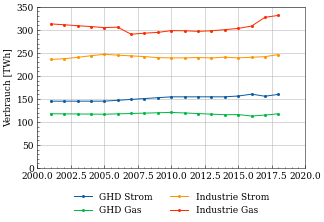

In [81]:
# 1 Bundesebene Zeitverlauf ohne Fuel Switch, Strom, Gas, GHD, Industrie 2001-2018
df_plot = pd.read_csv('./data_out/Diss/01_results_Bundesebene_2001_2018.csv', header=[0,1], index_col=[0])

plot_line(df_plot/1000000, ylim=(0,350), xlim=(2000, 2020), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'], fs=9, loc=9, coords=(0.5, -0.1), ncol=2)

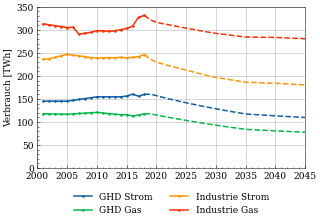

In [85]:
df_plot_2 = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])
plot_multi_line([df_plot/1000000, df_plot_2.append(df_plot.loc[2018]).sort_index()/1000000], w_cm=12, ylim=(0,350), xlim=(2000, 2045), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, fig_name = '01_Sektoren_Zeitverlauf')

TypeError: object of type 'generator' has no len()

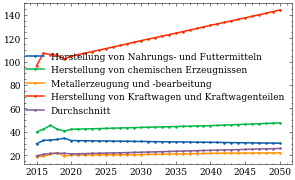

In [65]:
df_plot_2 = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])
plot_multi_line([df_plot/1000000, df_plot_2.append(df_plot.loc[2018]).sort_index()/1000000], w_cm=12, ylim=(0,350), xlim=(2000, 2045), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2)

In [35]:
df_plot = pd.read_csv('./data_out/Diss/01_results_Bundesebene_2001_2018.csv', header=[0,1], index_col=[0])
df_plot/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2001           145.189739  117.947306  235.820151  312.963814
2002           145.201212  117.674464  237.349993  311.055531
2003           145.212684  117.401622  240.218309  308.936853
2004           145.224157  117.128780  243.885667  307.207274
2005           145.235630  116.855939  246.883180  304.845400
2006           147.116446  117.652547  245.055005  305.764505
2007           148.997262  118.449155  243.486849  290.470076
2008           150.878079  119.245763  241.996830  292.762659
2009           152.758895  120.042371  239.752751  294.455583
2010           154.639712  120.838979  239.120972  298.276484
2011           154.643467  119.578246  239.163605  298.055310
2012           154.647226  118.317514  239.914821  296.756569
2013           154.650985  117.056782  239.137461  297.930380
2014           154.654744  115.796049  240.578459  300.405920
2015           156.354308  116.112566  239.240468  303.066102
2016           160.417099  113.007109  240.502617  308.255497
2017           155.949694  115.013113  241.783854  327.267095
2018           159.980641  117.832099  246.402799  331.321089

In [32]:
df_plot_2 = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])

In [34]:
df_plot_2/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2019           160.442442  117.655348  236.314278  321.861026
2020           157.062508  115.129901  229.961809  316.228617
2021           153.790544  112.668625  226.144149  313.652140
2022           150.622935  110.269745  222.542468  311.182966
2023           147.556194  107.931536  219.298459  308.682723
2024           144.586962  105.652328  215.730306  306.194357
2025           141.711996  103.430509  212.770025  303.762985
2026           138.928174  101.264508  209.412030  301.317208
2027           136.232488   99.152804  206.088037  298.912423
2028           133.622035   97.093924  202.636089  296.717341
2029           131.094026   95.086431  199.731131  294.378566
2030           128.645762   93.128943  196.753772  292.330210
2031           126.273770   91.220231  194.728261  290.751290
2032           123.976309   89.358880  192.603859  289.149131
2033           121.750969   87.543620  190.572896  287.588084
2034           119.595425   85.773223  188.340227  285.994091
2035           117.507436   84.046493  186.358274  284.537185
2036           116.645030   83.374803  185.954654  284.278586
2037           115.802068   82.713791  185.466548  283.996772
2038           114.978197   82.063273  184.922752  283.847567
2039           114.173071   81.423072  184.486003  283.806426
2040           113.386355   80.793012  184.278162  283.686826
2041           112.617721   80.172922  183.470873  282.946252
2042           111.866849   79.562635  182.647700  282.272555
2043           111.133427   78.961988  181.851437  281.716650
2044           110.417153   78.370820  181.079726  281.373582
2045           109.717729   77.788975  180.275382  280.551725
2046           109.034866   77.216301  179.537700  279.683740
2047           108.368283   76.652647  178.775344  278.878006
2048           107.717705   76.097869  178.005935  277.701941
2049           107.082864   75.551821  177.254233  277.228019
2050           106.463499   75.014366  176.546950  276.976019

### 03 Geoplot


In [100]:
df_geoplot = pd.read_csv('./data_out/Diss/03_results_regio_2018.csv', header=[0,1], index_col=[0])
df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

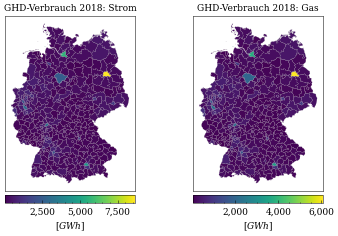

In [94]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="03_CTS_Consumption"


fig, ax = plot.choropleth_map(df_geoplot['GHD']/1000, relative=False, unit='GWh', axtitle='GHD-Verbrauch 2018:', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

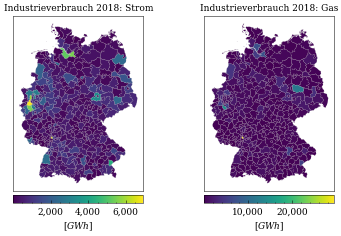

In [95]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="03_Industry_Consumption"


fig, ax = plot.choropleth_map(df_geoplot['Industrie']/1000, relative=False, unit='GWh', axtitle='Industrieverbrauch 2018:', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

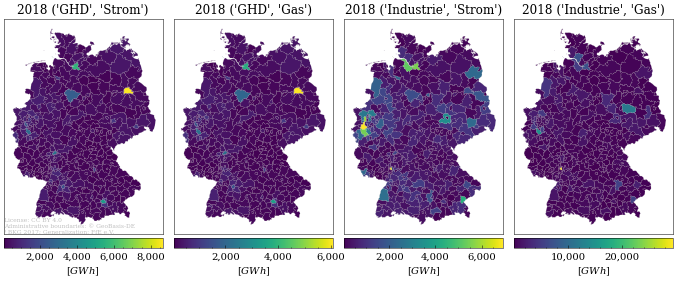

In [24]:
ec_combined = pd.concat([df_geoplot['GHD']/1000, df_geoplot['Industrie']/1000], keys=['GHD', 'Industrie'], axis=1, join='inner')
w_cm=24
w_in=w_cm/2.5
fig_name="03_Combined.svg"


fig, ax = plot.choropleth_map(df_geoplot/1000, relative=False, unit='GWh', axtitle='2018', 
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=10, linewidth=0.1, ncols=4, nrows=1)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

### 04 zeitlich aufgelöst

In [40]:
df_strom_cts = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_strom_cts_2018.csv", header=[0], index_col=[0])
df_gas_cts = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_gas_cts_2018.csv", header=[0], index_col=[0])

df_strom_ind = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_strom_industry_2018.csv", header=[0], index_col=[0])
df_gas_ind = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_gas_industry_2018.csv", header=[0], index_col=[0])
df_gas_ind_with_KO = pd.read_csv("./data_out/Diss/04_results_lastgänge_regions_gas_industry_2018_with_KO.csv", header=[0], index_col=[0])


In [41]:
df_strom_cts.index = pd.to_datetime(df_strom_cts.index)
df_strom_cts.columns = df_strom_cts.columns.astype(int)

df_gas_cts.index = pd.to_datetime(df_gas_cts.index)
df_gas_cts.columns = df_gas_cts.columns.astype(int)

df_strom_ind.index = pd.to_datetime(df_strom_ind.index)
df_strom_ind.columns = df_strom_ind.columns.astype(int)

df_gas_ind.index = pd.to_datetime(df_gas_ind.index)
df_gas_ind.columns = df_gas_ind.columns.astype(int)

df_gas_ind_with_KO.index = pd.to_datetime(df_gas_ind_with_KO.index)
df_gas_ind_with_KO.columns = df_gas_ind_with_KO.columns.astype(int)

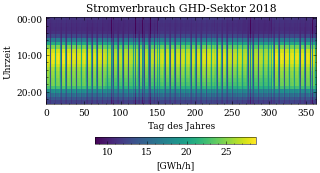

In [983]:
new_df=pd.DataFrame()
new_df['Stromverbrauch GHD-Sektor 2018'] = df_strom_cts.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Strom_CTS_Year_2018.svg')

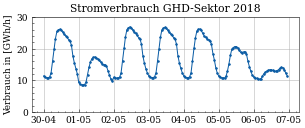

In [22]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Stromverbrauch GHD-Sektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,30), rot=0, fig_name='04_Lastgang_Strom_CTS_Woche_18')


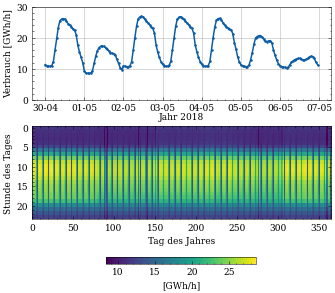

In [18]:
new_df=pd.DataFrame()
new_df['Stromverbrauch GHD 2018 in [GWh/h]'] = df_strom_cts.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,30)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Strom_cts_combined.svg")

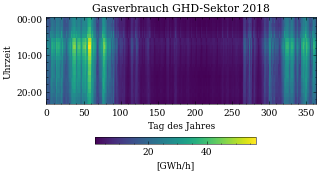

In [984]:
new_df=pd.DataFrame()
new_df['Gasverbrauch GHD-Sektor 2018'] = df_gas_cts.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Gas_CTS_Year_2018.svg')

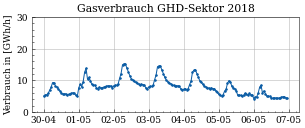

In [31]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Gasverbrauch GHD-Sektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,30), rot=0, fig_name='04_Lastgang_Gas_CTS_Woche_18')


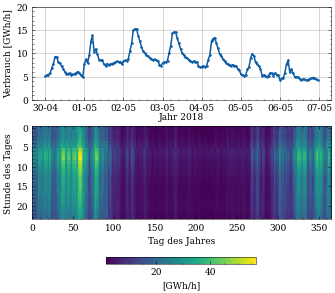

In [12]:
new_df=pd.DataFrame()
new_df['Gasverbrauch GHD 2018 in [GWh/h]'] = df_gas_cts.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,20)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)


#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Gas_cts_combined.svg")

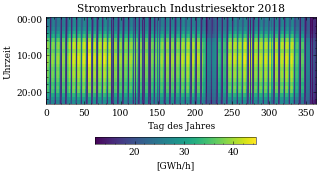

In [985]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industriesektor 2018'] = df_strom_ind.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Strom_Industry_Year_2018.svg')

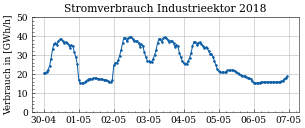

In [37]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Stromverbrauch Industrieektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,50), rot=0, fig_name='04_Lastgang_Strom_Industry_Woche_18')


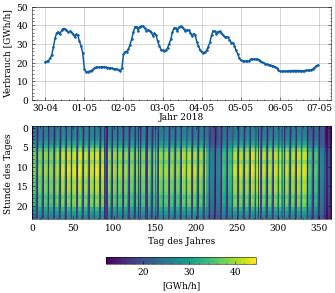

In [13]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industrie 2018 in [GWh/h]'] = df_strom_ind.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,50)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Strom_Industrie_combined.svg")

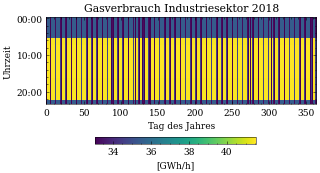

In [986]:
new_df=pd.DataFrame()
new_df['Gasverbrauch Industriesektor 2018'] = df_gas_ind.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Gas_Industry_Year_2018.svg')

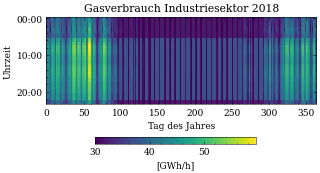

In [42]:
new_df=pd.DataFrame()
new_df['Gasverbrauch Industriesektor 2018'] = df_gas_ind_with_KO.sum(axis=1).resample('H').sum()/1000

w_cm=14 
w_in=w_cm/2.5
plot.heatmap_timeseries(new_df, fontsize=9, figsize=(w_in,(w_in/(1.618*1.7))), clabel='[GWh/h]')
plt.savefig('./data_out/Plots/04_Lastgang_Gas_Industry_Year_2018_with_KO.svg')

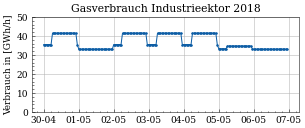

In [39]:
mask = (new_df.index.isocalendar().week.isin([18]))
w_cm=12 
w_in=w_cm/2.5
plot_line(new_df.loc[mask], w_cm=w_cm, title='Gasverbrauch Industrieektor 2018',fs=9, f=1.7,labels=[],
          ylabel='Verbrauch in [GWh/h]', ylim=(0,50), rot=0, fig_name='04_Lastgang_Gas_Industry_Woche_18')


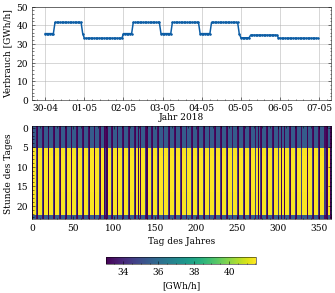

In [14]:
new_df=pd.DataFrame()
new_df['Stromverbrauch Industrie 2018 in [GWh/h]'] = df_gas_ind.sum(axis=1).resample('H').sum()/1000
mask = (new_df.index.isocalendar().week.isin([18]))

fs=9
w_cm=13
w_in=w_cm/2.5

#fig, (ax1, ax11, ax2, ax22) = plt.subplots(2,2, figsize=(w_in, (w_in)/1.6))
plt.style.use(['science','no-latex'])

fig = plt.figure(figsize=(w_in, (w_in)/1.6))
ax1 = fig.add_axes([0.1, 0.6, 0.8, 0.4])
# ax2 = fig.add_axes([0.1, 0.09, 0.75, 0.4])
ax2 = fig.add_axes([0.1, 0.09, 0.8, 0.4])
# ax3 = fig.add_axes([0.87, 0.09, 0.03, 0.4])
ax3 = fig.add_axes([0.3, -0.1, 0.4, 0.03])

# ax_cbar = fig.add_axes([0.83, 0.1, 0.03, 0.40])

ax1.plot(new_df.loc[mask], marker='o',markersize=1.5,linewidth=1.5)
ax1.set_aspect('auto')
ax1.tick_params(axis='x', rotation=0)
ax1.tick_params(axis='both', which='both', top=False)
ax1.grid(True)
ax1.set_ylim(0,50)

ax1.set_ylabel('Verbrauch [GWh/h]', fontsize=fs)

date_form = DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)


plot.heatmap_timeseries_ax(new_df, ax2, ax3, clabel='[GWh/h]')
ax2.set_aspect('auto')
ax2.set_title('Jahr 2018', fontsize=fs)
ax2.set_ylabel('Stunde des Tages', fontsize=fs)
ax2.set_xlabel('Tag des Jahres', fontsize=fs)

#fig.tight_layout()
fig.subplots_adjust(right=0.8)

plt.savefig("./data_out/Plots/04_Lastgang_Gas_Industrie_combined.svg")

### 05 top je LK

In [105]:
df_geoplot = pd.read_csv('./data_out/Diss/03_results_regio_2018.csv', header=[0,1], index_col=[0])
df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

In [124]:
index_slice = pd.IndexSlice
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')

df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
big_power_idx= df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict).index

In [157]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
new_df = df_geoplot_strom.rename(index=region_dict).loc[big_power_idx]#.sort_values(by="Größter Stromverbrauch [MWh]", ascending=False).head(10).plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47
new_df['Stromverbrauch Landkreis [MWh]'] = df_geoplot.loc[:, index_slice[:,'Strom']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
new_df.replace(config.dict_wz(), inplace=True)
new_df.to_excel("./data_out/Diss/05_Top10_WZ_Elec.xlsx")

In [129]:
index_slice = pd.IndexSlice
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')

df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
big_gas_idx = df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict).index

In [135]:
df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)


Ludwigshafen am Rhein, Kreisfreie Stadt    2.975738e+07
Köln, Kreisfreie Stadt                     1.704944e+07
Wittenberg                                 1.212039e+07
Hamburg                                    1.121352e+07
Steinburg                                  7.404471e+06
Berlin                                     7.369780e+06
Kelheim                                    5.825761e+06
Rheinisch-Bergischer Kreis                 5.765383e+06
Altötting                                  5.686231e+06
Recklinghausen                             5.417154e+06
dtype: float64

In [146]:
config.dict_wz()

{1: 'Landwirtschaft',
 2: 'Forstwirtschaft',
 3: 'Fischerei',
 5: 'Kohlenbergbau',
 6: 'Öl & Gas',
 7: 'Erzbergbau',
 8: 'Steine & Erden',
 9: 'Dienstleistg. Bergbau',
 10: 'Nahrungsindustrie',
 11: 'Getränkeherstellung',
 12: 'Tabakverarbeitung',
 13: 'Textilien',
 14: 'Bekleidung',
 15: 'Lederwaren & Schuhe',
 16: 'Holzverarbeitung',
 17: 'Papierindustrie',
 18: 'Medien',
 19: 'Kokerei & Mineralöl',
 20: 'Chemie',
 21: 'Pharma',
 22: 'Gummi & Kunststoffe',
 23: 'Glas & Keramik',
 24: 'Metallerzeugung',
 25: 'Metallerzeugnisse',
 26: 'Elektronik & IT',
 27: 'Elektrische Ausrüst.',
 28: 'Maschinenbau',
 29: 'Fahrzeugbau',
 30: 'Sonstiger Fahrzeugbau',
 31: 'Möbeln',
 32: 'Herstellung Sonstiges',
 33: 'Reparatur Maschinen+Anl.',
 35: 'Energieversorgung',
 36: 'Wasserversorgung',
 37: 'Abwasserentsorgung',
 38: 'Abfallbeseitigung',
 39: 'Entsorgung',
 41: 'Hochbau',
 42: 'Tiefbau',
 43: 'Vorb. Baustellenarbeiten',
 45: 'Kfz-Handel',
 46: 'Großhandel',
 47: 'Einzelhandel',
 49: 'Landverke

In [170]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
new_df= df_geoplot_gas.rename(index=region_dict).loc[big_gas_idx]#.sort_values(by="Größter Gasverbrauch [MWh]", ascending=False).head(10)#.plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47
new_df['Gasverbrauch Landkreis [MWh]'] = df_geoplot.loc[:, index_slice[:,'Gas']].sum(axis=1).sort_values(ascending=False).head(10).rename(index=region_dict)
new_df.replace(config.dict_wz(), inplace=True)
new_df.to_excel("./data_out/Diss/05_Top10_WZ_Gas.xlsx")
new_df

#plt.bar_label(splot.containers[0])


#plt.figure(figsize=(8, 6))
#bplot=new_df.plot(kind='bar') 
#plt.xlabel("Continent", size=16)
#plt.ylabel("LifeExp", size=16)
#plt.bar_label()


#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Größter Gasverbrauch [MWh]  \
Ludwigshafen am Rhein, Kreisfreie Stadt                2.808248e+07   
Köln, Kreisfreie Stadt                                 6.017444e+06   
Wittenberg                                             6.347221e+06   
Hamburg                                                2.857273e+06   
Steinburg                                              1.328455e+06   
Berlin                                                 9.184824e+05   
Kelheim                                                1.912335e+06   
Rheinisch-Bergischer Kreis                             1.233735e+06   
Altötting                                              5.164047e+06   
Recklinghausen                                         1.652720e+06   

                                                             WZ  \
Ludwigshafen am Rhein, Kreisfreie Stadt                  Chemie   
Köln, Kreisfreie Stadt                                   Chemie   
Wittenberg                                               Chemie   
Hamburg                                     Kokerei & Mineralöl   
Steinburg                                        Glas & Keramik   
Berlin                                   Erziehung u.Unterricht   
Kelheim                                     Kokerei & Mineralöl   
Rheinisch-Bergischer Kreis                    Nahrungsindustrie   
Altötting                                                Chemie   
Recklinghausen                              Kokerei & Mineralöl   

                                         Gasverbrauch Landkreis [MWh]  
Ludwigshafen am Rhein, Kreisfreie Stadt                  2.975738e+07  
Köln, Kreisfreie Stadt                                   1.704944e+07  
Wittenberg                                               1.212039e+07  
Hamburg                                                  1.121352e+07  
Steinburg                                                7.404471e+06  
Berlin                                                   7.369780e+06  
Kelheim                                                  5.825761e+06  
Rheinisch-Bergischer Kreis                               5.765383e+06  
Altötting                                                5.686231e+06  
Recklinghausen                                           5.417154e+06

In [166]:
for k, v in new_df.iterrows():
    #print(k)
    print(v[1])

Chemie
Chemie
Chemie
Kokerei & Mineralöl
Glas & Keramik
Erziehung u.Unterricht
Kokerei & Mineralöl
Nahrungsindustrie
Chemie
Kokerei & Mineralöl


In [101]:
df_geoplot_strom = pd.read_csv('./data_out/Diss/05_results_regio_power_2018.csv', header=[0], index_col=[0])
#df_geoplot.rename(columns={'CTS': 'GHD', "power": "Strom", "industry" : "Industrie", "gas" : "Gas"}, inplace=True)

In [123]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
df_geoplot_strom.rename(index=region_dict)#.sort_values(by="Größter Stromverbrauch [MWh]", ascending=False).head(10).plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47

Größter Stromverbrauch [MWh]  WZ
Flensburg, Kreisfreie Stadt                   35775.697968  47
Kiel, Kreisfreie Stadt                        68295.874765  47
Lübeck, Kreisfreie Stadt                      62958.484066  47
Neumünster, Kreisfreie Stadt                  27609.757293  49
Dithmarschen                                 403089.448284  20
...                                                    ...  ..
Saalfeld-Rudolstadt                          141546.430115  20
Saale-Holzland-Kreis                          53972.844574  24
Saale-Orla-Kreis                             123744.288759  22
Greiz                                         34390.071777  20
Altenburger Land                              30965.238527  22

[401 rows x 2 columns]

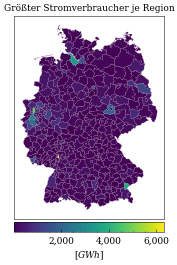

In [22]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="test"


fig, ax = plot.choropleth_map(df_geoplot['Größter Stromverbrauch [MWh]']/1000, relative=False, unit='GWh', axtitle='Größter Stromverbraucher je Region',
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

In [80]:
df_geoplot_gas = pd.read_csv('./data_out/Diss/05_results_regio_gas_2018.csv', header=[0], index_col=[0])


In [99]:
region_dict = config.dict_region_code(keys='natcode_nuts3', values='name')
df_geoplot_gas.rename(index=region_dict).sort_values(by="Größter Gasverbrauch [MWh]", ascending=False).head(10)#.plot(kind='bar')#.loc['Städteregion Aachen'] # größter WZ in BErlin 47

Größter Gasverbrauch [MWh]  WZ
Ludwigshafen am Rhein, Kreisfreie Stadt                2.808248e+07  20
Wittenberg                                             6.347221e+06  20
Köln, Kreisfreie Stadt                                 6.017444e+06  20
Altötting                                              5.164047e+06  20
Stade                                                  3.541600e+06  20
Hamburg                                                2.857273e+06  19
Duisburg, Kreisfreie Stadt                             2.450364e+06  24
Saalekreis                                             2.184582e+06  20
Kelheim                                                1.912335e+06  19
Krefeld, Kreisfreie Stadt                              1.820767e+06  20

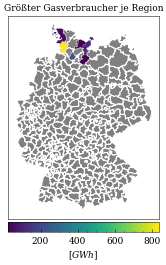

In [26]:
#ec_combined = pd.concat([df_geoplot['CTS', 'power']/1000, df_geoplot['CTS', 'gas']/1000, df_geoplot['industry', 'power'], df_geoplot['industry', 'gas']], keys=['CTS', 'Industry'], axis=1, join='inner')
w_cm=14
w_in=w_cm/2.5
fig_name="test"


fig, ax = plot.choropleth_map((df_geoplot_gas['Größter Gasverbrauch [MWh]']/1000).head(10), relative=False, unit='GWh', axtitle='Größter Gasverbraucher je Region',
                              colorbar_each_subplot=True,  add_percentages=False, mode='manual', figsize=(w_in,(w_in/1.618)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False)

#plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

### 07 Anwendungen

In [301]:
df_app_strom_cts = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_CTS_power.csv", header=[0], index_col=[0])
df_app_gas_cts = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_CTS_gas.csv", header=[0], index_col=[0])

df_app_strom_ind = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_industry_power.csv", header=[0], index_col=[0])
df_app_gas_ind = pd.read_csv("./data_out/Diss/07_results_Anwendungen_WZ_2018_industry_gas.csv", header=[0], index_col=[0])

In [356]:
new_df_app = pd.concat([df_app_strom_cts, df_app_strom_ind])
new_df_plot = new_df_app.assign(sum=new_df_app.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:,:-1].head(10).rename(index=config.dict_wz())
new_df_plot.rename(columns={"Mechanische \nEnergie" : "Mechan. Energie"}, inplace=True)

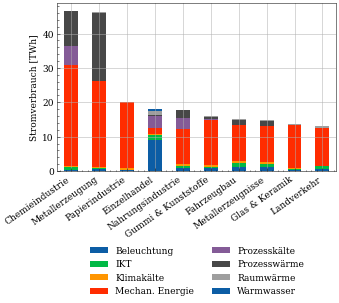

In [357]:
plot_bar(new_df_plot/1000000,
        ncol=2, loc='upper center', coords=[0.5, -0.4], ylabel='Stromverbrauch [TWh]', rot=35, fig_name='07_Top_10_Strom_Anwendung')#.plot(kind='bar', stacked=True) ,coords=[0.5, -0.08]coords=[0.5, -0.35]

In [359]:
df_app_gas_ind_2 = df_app_gas_ind.assign(Prozesswärme=df_app_gas_ind[['Prozesswärme >500°C', 'Prozesswärme 100°C-200°C', 'Prozesswärme 200°C-500°C', 'Prozesswärme <100°C']].sum(axis=1))#
new_df_app = pd.concat([df_app_gas_cts, df_app_gas_ind_2]).iloc[:, :-4].fillna(0)
new_df_plot = new_df_app.assign(sum=new_df_app.sum(axis=1)).sort_values(by='sum', ascending=False).head(10).rename(index=config.dict_wz()).iloc[:, :-1]
new_df_plot.rename(columns={"Mechanische \nEnergie" : "Mechan. Energie", "Nichtenergetischer Erdgasverbrauch" : "Nichtenerget. Verbrauch",
                           "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)

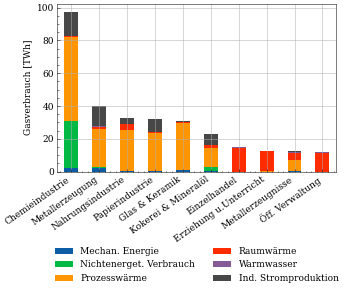

In [363]:
plot_bar(new_df_plot/1000000,
        ncol=2, loc='upper center', coords=[0.5, -0.4], ylabel='Gasverbrauch [TWh]', rot=35, fig_name='07_Top_10_Gas_Anwendung')#.plot(kind='bar', stacked=True) ,coords=[0.5, -0.08]

In [362]:
def plot_bar(df, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]', xlabel='', stacked=True, ylim=None, xlim=None, loc=None, ncol=None, coords=None, fs=9, fig_name=None, lw=1, rot=0):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='right')
    ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

### 08 After fuel switch - Anwendungen

In [29]:
df_app_gas_rep_app = pd.read_csv("./data_out/Diss/10_results_sectors_gas_replaced_by_elec_applications_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice

In [30]:
df_app_gas_rep_app_cts = df_app_gas_rep_app.loc[:, col_slice[:,'CTS']].iloc[:, 1:-1].dropna().droplevel(1, axis=1)
df_app_gas_rep_app_cts.columns=df_app_gas_rep_app_cts.columns.astype(int)

df_app_gas_rep_app_cts

Jahre                        2020          2025          2030          2035  \
Mechanische Energie  1.185482e+06  2.012378e+06  2.565413e+06  2.910632e+06   
Prozesswärme         8.331576e+05  1.681362e+06  2.550815e+06  3.449152e+06   
Raumwärme            1.628486e+07  2.919003e+07  3.929398e+07  4.707946e+07   
Warmwasser           8.848185e+05  1.593070e+06  2.154265e+06  2.591747e+06   

Jahre                        2040          2045  
Mechanische Energie  3.373030e+06  3.756466e+06  
Prozesswärme         4.403504e+06  5.407903e+06  
Raumwärme            5.643145e+07  6.501549e+07  
Warmwasser           3.119530e+06  3.609121e+06

In [48]:
df_app_gas_rep_app_ind = df_app_gas_rep_app.loc[:, col_slice[:,'industry']].iloc[:, 1:-1].dropna().droplevel(1, axis=1)
df_app_gas_rep_app_ind.columns=df_app_gas_rep_app_ind.columns.astype(int)

df_app_gas_rep_app_ind.rename(index={"Mechanische Energie" : "Mechanische Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)
df_app_gas_rep_app_ind

Jahre                             2020          2025          2030  \
Ind. Stromproduktion      8.621343e+06  1.706322e+07  2.536677e+07   
Mechanische Energie       1.218540e+06  2.222835e+06  3.043864e+06   
Prozesswärme 100°C-200°C  5.498451e+06  1.048116e+07  1.501111e+07   
Prozesswärme <100°C       5.083944e+06  9.695489e+06  1.387136e+07   
Raumwärme                 5.015071e+06  9.057352e+06  1.229270e+07   
Warmwasser                4.531585e+05  8.203906e+05  1.116027e+06   

Jahre                             2035          2040          2045  
Ind. Stromproduktion      3.343130e+07  4.169288e+07  4.966133e+07  
Mechanische Energie       3.757757e+06  4.578581e+06  5.289483e+06  
Prozesswärme 100°C-200°C  1.957043e+07  2.453729e+07  2.901782e+07  
Prozesswärme <100°C       1.779462e+07  2.194073e+07  2.590050e+07  
Raumwärme                 1.495629e+07  1.818937e+07  2.104755e+07  
Warmwasser                1.358658e+06  1.653673e+06  1.914967e+06

In [32]:
# repair data
df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2020 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2025 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2030 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2035 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_2040 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2040.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_2045 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020, df_app_elc_on_top_app_2025, df_app_elc_on_top_app_2030,
                                         df_app_elc_on_top_app_2035, df_app_elc_on_top_app_2040, df_app_elc_on_top_app_2045], axis=1)
df_app_elc_on_top_app = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app.columns=df_app_elc_on_top_app.columns.astype(int)
df_app_elc_on_top_app

Jahre                        2020          2025          2030          2035  \
Mechanische Energie  5.578737e+05  9.470015e+05  1.207253e+06  1.369709e+06   
Prozesswärme         3.797493e+05  7.745771e+05  1.139317e+06  1.568804e+06   
Raumwärme            4.070353e+06  7.524623e+06  9.932439e+06  1.195218e+07   
Warmwasser           2.886939e+05  5.269779e+05  6.889969e+05  8.438621e+05   

Jahre                        2040          2045  
Mechanische Energie  1.587308e+06  1.767749e+06  
Prozesswärme         2.010378e+06  2.466968e+06  
Raumwärme            1.440640e+07  1.658660e+07  
Warmwasser           1.020805e+06  1.179737e+06

In [45]:
df_app_elc_on_top_app_2020_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020_ind, df_app_elc_on_top_app_2025_ind, df_app_elc_on_top_app_2030_ind,
                                         df_app_elc_on_top_app_2035_ind, df_app_elc_on_top_app_2040_ind, df_app_elc_on_top_app_2045_ind], axis=1)
df_app_elc_on_top_app_ind = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app_ind.rename(index={"Mechanische Energie" : "Mechanische Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)
df_app_elc_on_top_app_ind

Jahre                             2020          2025          2030  \
Ind. Stromproduktion      3.017470e+06  5.972126e+06  8.878368e+06   
Mechanische Energie       5.734307e+05  1.046040e+06  1.432406e+06   
Prozesswärme 100°C-200°C  3.625105e+06  6.962016e+06  9.782046e+06   
Prozesswärme <100°C       2.755253e+06  5.285058e+06  7.382441e+06   
Raumwärme                 1.272220e+06  2.384957e+06  3.159537e+06   
Warmwasser                1.471849e+05  2.700412e+05  3.546850e+05   

Jahre                             2035          2040          2045  
Ind. Stromproduktion      1.170095e+07  1.459251e+07  1.738147e+07  
Mechanische Energie       1.768356e+06  2.154626e+06  2.489168e+06  
Prozesswärme 100°C-200°C  1.288904e+07  1.620311e+07  1.915381e+07  
Prozesswärme <100°C       9.611709e+06  1.189563e+07  1.402068e+07  
Raumwärme                 3.860655e+06  4.740285e+06  5.471650e+06  
Warmwasser                4.399781e+05  5.385309e+05  6.232573e+05

In [34]:
test = pd.read_csv("./data_out/Diss/12_results_elec_from_switch_industry_wz_2045.csv", header=[0,1], index_col=[0])#.dropna()
test.sum().sum()

59140032.38005691

In [35]:
def plot_div_bar(df_gas, df_el, w_cm=14, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=0, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40]):
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, ax1 = plt.subplots(figsize=(w_in,(w_in/(1.618))))
    #ax1.axhspan(0, 40, facecolor='0.9', alpha=0.5)
    #ax1.axhspan(-80, 0, facecolor='0.6', alpha=0.5)
    
    ax2 = ax1.twinx()
    
    positive_data.plot(ax=ax1, kind='bar', stacked=True, width=-0.35, align='edge' ) # width=0.5, align='center'
    negative_data.plot(ax=ax2, kind='bar', stacked=True, width=(0.35), align='edge'  ) #width=-0.5, align='center'
    
    ax1.grid(True)
    ax2.grid(True)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax1.set_ylabel(ylabel1)
    ax2.set_ylabel(ylabel2)
    ax1.set_xlabel(xlabel)
    
    ax1.set_ylim(ylim1)
    ax1.set_xlim([-0.5, 5.5])
    ax2.set_ylim(ylim2)
    
    ax1.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax2.legend().remove()
    
    yticks = ax1.yaxis.get_major_ticks()
    ymrange = range(0,4)
    for t in ymrange:
        yticks[t].set_visible(False)
    
    yticksm = ax1.yaxis.get_minor_ticks()
    ymrange = range(0,12)
    for t in ymrange:
        yticksm[t].set_visible(False)
    
    
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].set_visible(False)
    yticks[-2].set_visible(False)
    
    yticksm = ax2.yaxis.get_minor_ticks()
    ymrange = range(-6,0,1)
    for t in ymrange:
        yticksm[t].set_visible(False)
    
    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

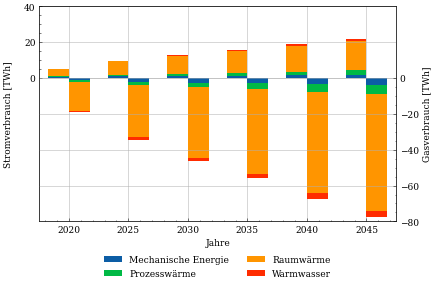

In [973]:
plot_div_bar(df_app_gas_rep_app_cts, df_app_elc_on_top_app, xlabel='Jahre', w_cm=16, ylabel1="Stromverbrauch [TWh]", ylabel2="Gasverbrauch [TWh]")

In [36]:
def double_bar_plot(df_gas, df_el, w_cm=14, fs=9, labels= ['Mechanische Energie', 'Prozesswärme', 'Raumwärme', 'Warmwasser'], rot=90, ylabel1="Verbrauch [TWh]", ylabel2="Verbrauch [TWh]", xlabel=None,
                loc='upper center', coords=[0.5, -0.12], ncol=2, fig_name=None, ylim1=[-80,40], ylim2=[-80,40], title1=None, title2=None):
    
    plt.rcParams.update({'font.size':fs})
    negative_data = (df_gas*(-1)).T/1000000
    positive_data = df_el.T/1000000
    w_in=w_cm/2.5

    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(w_in,(w_in/(1.618))))
    positive_data.plot(ax=ax1, kind='bar', stacked=True)
    negative_data.plot(ax=ax2, kind='bar', stacked=True)
    
    ax2.legend().remove()
    ax1.legend().remove()
    
    ax1.set_ylim(ylim1)
    ax2.set_ylim(ylim2)

    ax1.grid(True)
    ax2.grid(True)

    ax1.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    ax2.tick_params(axis='both', which='both', top=False, right=False, rotation=rot)
    
    ax1.set_title(title1, fontsize=fs)
    ax2.set_title(title2, fontsize=fs)
    
    ax1.set_ylabel(ylabel1, fontsize=fs)
    ax2.set_ylabel(ylabel2, fontsize=fs)
    ax1.set_xlabel(xlabel)
    plt.tight_layout()
    plt.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    
    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

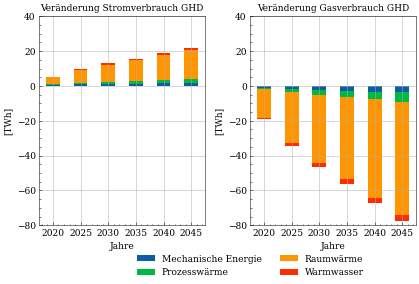

In [42]:
double_bar_plot(df_app_gas_rep_app_cts, df_app_elc_on_top_app,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Veränderung Stromverbrauch GHD', title2='Veränderung Gasverbrauch GHD', fig_name='10_gas_replaced_elec_on_top_cts')

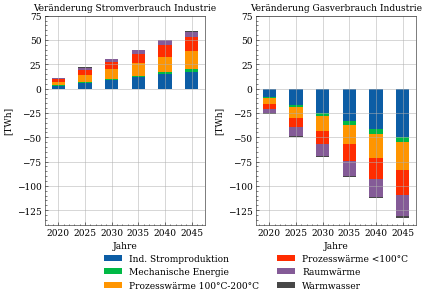

In [49]:
double_bar_plot(df_app_gas_rep_app_ind, df_app_elc_on_top_app_ind,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Veränderung Stromverbrauch Industrie', title2='Veränderung Gasverbrauch Industrie', fig_name='10_gas_replaced_elec_on_top_industry',
               ylim1=(-140,75),  ylim2=(-140,75))

In [54]:
df_app_gas_rep_hydro_app_gas

Jahre                                       2020          2025          2030  \
Prozesswärme 100°C-200°C            4.768330e+06  9.060520e+06  1.293214e+07   
Prozesswärme 200°C-500°C            2.809950e+06  5.346670e+06  7.646067e+06   
Prozesswärme >500°C                 1.387062e+07  2.660504e+07  3.827104e+07   
Nichtenergetischer Erdgasverbrauch  5.365356e+06  1.090166e+07  1.661403e+07   

Jahre                                       2035          2040          2045  
Prozesswärme 100°C-200°C            1.693399e+07  2.135278e+07  2.516922e+07  
Prozesswärme 200°C-500°C            9.939032e+06  1.244716e+07  1.472295e+07  
Prozesswärme >500°C                 4.944556e+07  6.143491e+07  7.274869e+07  
Nichtenergetischer Erdgasverbrauch  2.250383e+07  2.857831e+07  3.507921e+07

In [55]:
df_app_gas_rep_hydro_app_hydro

Jahre                                       2020          2025          2030  \
Prozesswärme 100°C-200°C            4.768330e+06  9.060520e+06  1.293214e+07   
Prozesswärme 200°C-500°C            2.809950e+06  5.346670e+06  7.646067e+06   
Prozesswärme >500°C                 1.387062e+07  2.660504e+07  3.827104e+07   
Nichtenergetischer Erdgasverbrauch  3.755749e+06  7.631161e+06  1.162982e+07   

Jahre                                       2035          2040          2045  
Prozesswärme 100°C-200°C            1.693399e+07  2.135278e+07  2.516922e+07  
Prozesswärme 200°C-500°C            9.939032e+06  1.244716e+07  1.472295e+07  
Prozesswärme >500°C                 4.944556e+07  6.143491e+07  7.274869e+07  
Nichtenergetischer Erdgasverbrauch  1.575268e+07  2.000482e+07  2.455545e+07

In [52]:
df_app_gas_rep_hydro_app = pd.read_csv("./data_out/Diss/18_results_gas_replaced_hydro_industry_apps_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice

In [53]:
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

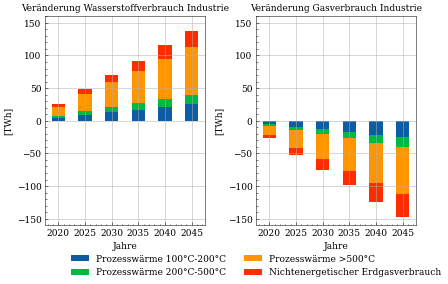

In [1045]:
double_bar_plot(df_app_gas_rep_hydro_app_gas, df_app_gas_rep_hydro_app_hydro,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Veränderung Wasserstoffverbrauch Industrie', title2='Veränderung Gasverbrauch Industrie', fig_name='18_gas_replaced_hydro_on_top_industry',
               ylim1=(-160,160),  ylim2=(-160,160))

In [1044]:
df_app_gas_rep_hydro_elec_app = pd.read_csv("./data_out/Diss/19_results_electrolysis_industry_apps_years.csv", header=[0,1], index_col=[0])
col_slice = pd.IndexSlice
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)
df_app_gas_rep_hydro_app_hydro_elec = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

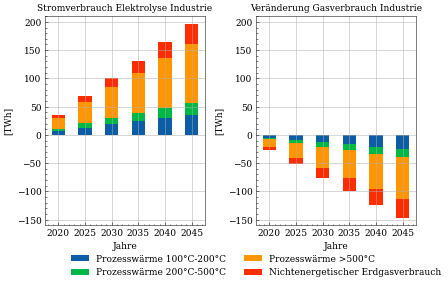

In [1056]:
double_bar_plot(df_app_gas_rep_hydro_app_gas, df_app_gas_rep_hydro_app_hydro_elec/0.7,  w_cm=15, xlabel='Jahre', ylabel1="[TWh]", ylabel2="[TWh]", coords=[-0, -0.1],
               rot=0, title1='Stromverbrauch Elektrolyse Industrie', title2='Veränderung Gasverbrauch Industrie', fig_name='19_gas_replaced_hydro_elec_on_top_industry',
               ylim1=(-160,210),  ylim2=(-160,210))

### 09 after fuel - switch absolut

In [113]:
col_slice = pd.IndexSlice
df_gesamt_no_switch = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])

# for gas to be rep
df_app_gas_rep_el_app = pd.read_csv("./data_out/Diss/10_results_sectors_gas_replaced_by_elec_applications_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app = pd.read_csv("./data_out/Diss/18_results_gas_replaced_hydro_industry_apps_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1)

# elec on top industry
df_app_elc_on_top_app_2020_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2020.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2025.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2030.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2035.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2040.csv", header=[0,1], index_col=[0]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_industry_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020_ind, df_app_elc_on_top_app_2025_ind, df_app_elc_on_top_app_2030_ind,
                                         df_app_elc_on_top_app_2035_ind, df_app_elc_on_top_app_2040_ind, df_app_elc_on_top_app_2045_ind], axis=1)
df_app_elc_on_top_app_ind = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
#df_app_elc_on_top_app_ind.rename(index={"Mechanische Energie" : "Mechan. Energie", "Industriekraftwerke" : "Ind. Stromproduktion"}, inplace=True)

# elec on top CTS
# repair data
df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2020.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2020 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2025.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2025 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2030.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2030 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SH_bis_BY_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_SL_bis_TH_2035.csv", header=[0,1], index_col=[0])
df_app_elc_on_top_app_2035 = pd.concat([df_app_elc_on_top_app_1.iloc[:, :-7], df_app_elc_on_top_app_2], axis=1).dropna()

df_app_elc_on_top_app_2040 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2040.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_2045 = pd.read_csv("./data_out/Diss/13_results_elec_from_switch_cts_applications_2045.csv", header=[0,1], index_col=[0]).dropna()

df_app_elc_on_top_app_state = pd.concat([df_app_elc_on_top_app_2020, df_app_elc_on_top_app_2025, df_app_elc_on_top_app_2030,
                                         df_app_elc_on_top_app_2035, df_app_elc_on_top_app_2040, df_app_elc_on_top_app_2045], axis=1)
df_app_elc_on_top_app = df_app_elc_on_top_app_state.groupby(level=0, axis=1).sum()
df_app_elc_on_top_app.columns=df_app_elc_on_top_app.columns.astype(int)


# hydro on top
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1)

# elec on top elektrolysers
df_app_gas_rep_hydro_app_elektrolysers = df_app_gas_rep_hydro_app_hydro/0.7


In [114]:
# cts
new_df = pd.DataFrame()
# gas no switch
new_df['Gas no switch'] = df_gesamt_no_switch['CTS', 'gas']
new_df

# gas rep by el
series_gas_rep_el = df_app_gas_rep_el_app.loc[:, col_slice[:,'CTS']].iloc[:, 1:-1].dropna().droplevel(1, axis=1).sum()  # rep by elec
series_gas_rep_el.index = series_gas_rep_el.index.astype(int)
new_df['Gas rep by el'] =series_gas_rep_el  # rep by elec

# gas rep abs
new_df['Gasverbrauch'] = (new_df['Gas no switch'] - new_df['Gas rep by el'])
new_df.dropna(inplace=True)

# elec no switch
new_df['Power no switch'] = df_gesamt_no_switch['CTS', 'power']

# power on top from switch
series_elec_on_top = df_app_elc_on_top_app.sum()
series_elec_on_top.index = series_elec_on_top.index.astype(int)
new_df['Power on top from switch'] = series_elec_on_top

# power absolut switch only no elektrolysers
new_df['Stromverbrauch'] =(new_df['Power no switch'] + new_df['Power on top from switch'])
new_df_cts = new_df

In [176]:
new_df_cts/1000000

Gas no switch  Gas rep by el  Gasverbrauch  Power no switch  \
2020     115.129901      19.188317     95.941584       157.062508   
2025     103.430509      34.476836     68.953673       141.711996   
2030      93.128943      46.564471     46.564471       128.645762   
2035      84.046493      56.030995     28.015498       117.507436   
2040      80.793012      67.327510     13.465502       113.386355   
2045      77.788975      77.788975      0.000000       109.717729   

      Power on top from switch  Stromverbrauch  
2020                  5.296670      162.359178  
2025                  9.773179      151.485175  
2030                 12.968005      141.613767  
2035                 15.734560      133.241996  
2040                 19.024895      132.411249  
2045                 22.001054      131.718783

In [142]:
# industry
new_df = pd.DataFrame()
# gas no switch
new_df['Gas no switch'] = df_gesamt_no_switch['industry', 'gas']

# gas rep by el
series_gas_rep_el = df_app_gas_rep_el_app.loc[:, col_slice[:,'industry']].iloc[:, 1:-1].dropna().droplevel(1, axis=1).sum()  # rep by elec
series_gas_rep_el.index = series_gas_rep_el.index.astype(int)
new_df['Gas rep by el'] =series_gas_rep_el  # rep by elec
# gas rep by hydro
series_gas_rep_hydro = df_app_gas_rep_hydro_app_gas.sum()
series_gas_rep_hydro.index = series_gas_rep_hydro.index.astype(int)
new_df['Gas rep by hydro'] =series_gas_rep_hydro  # rep by hydro
# gas rep abs
new_df['Gasverbrauch'] = (new_df['Gas no switch'] - new_df['Gas rep by el']-new_df['Gas rep by hydro'])
new_df.dropna(inplace=True)

# elec no switch
new_df['Power no switch'] = df_gesamt_no_switch['industry', 'power']

# power on top from switch
series_elec_on_top = df_app_elc_on_top_app_ind.sum()
series_elec_on_top.index = series_elec_on_top.index.astype(int)
new_df['Power on top from switch'] = series_elec_on_top
# power absolut switch only no elektrolysers
new_df['Stromverbrauch \n(keine Elektrolyse)'] =(new_df['Power no switch'] + new_df['Power on top from switch'])

# power on top from electrolyis
series_power_elektrolysers = df_app_gas_rep_hydro_app_elektrolysers.sum()
series_power_elektrolysers.index = series_power_elektrolysers.index.astype(int)
new_df['Power on top from elektrolysis'] = series_power_elektrolysers
# power absolut switch only with elektrolysers
new_df['Stromverbrauch \n(100% Elektrolyse)'] =(new_df['Power no switch'] + new_df['Power on top from switch'] + new_df['Power on top from elektrolysis'])

# hydrogen on top
series_hydrogen = df_app_gas_rep_hydro_app_hydro.sum()
series_hydrogen.index = series_hydrogen.index.astype(int)
new_df['Wasserstoffverbrauch'] = series_hydrogen


In [143]:
new_df/1000000

Gas no switch  Gas rep by el  Gas rep by hydro  Gasverbrauch  \
2020     316.228617      25.890508         26.814261  2.635238e+02   
2025     303.762985      49.340439         51.913889  2.025087e+02   
2030     292.330210      70.701835         75.463270  1.461651e+02   
2035     284.537185      90.869047         98.822410  9.484573e+01   
2040     283.686826     112.592524        123.813165  4.728114e+01   
2045     280.551725     132.831650        147.720075  5.960464e-14   

      Power no switch  Power on top from switch  \
2020       229.961809                 11.390663   
2025       212.770025                 21.920238   
2030       196.753772                 30.989483   
2035       186.358274                 40.270692   
2040       184.278162                 50.124692   
2045       180.275382                 59.140032   

      Stromverbrauch \n(keine Elektrolyse)  Power on top from elektrolysis  \
2020                            241.352472                       36.006649   
2025                            234.690263                       69.490559   
2030                            227.743255                      100.684374   
2035                            226.628965                      131.530372   
2040                            234.402853                      164.628102   
2045                            239.415414                      195.994729   

      Stromverbrauch \n(100% Elektrolyse)  Wasserstoffverbrauch  
2020                           277.359121             25.204654  
2025                           304.180823             48.643392  
2030                           328.427629             70.479062  
2035                           358.159338             92.071261  
2040                           399.030955            115.239671  
2045                           435.410143            137.196310

In [11]:
def plot_bar_grouped(df, w_cm=14, title=None, ylabel='Verbrauch [TWh]', xlabel='', stacked=False, ylim=None, xlim=None, loc='upper center', ncol=2, coords=[0,0], fs=9, fig_name=None, lw=1, rot=0):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax = plt.subplots(figsize=(w_in,(w_in/(1.618))))
    
    df.plot(ax=ax, kind='bar', stacked=stacked)
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    #df_gas_cts
    ax.grid(True)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params(axis='both', which='both', top=False, right=False)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=rot, ha='right')
    ax.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax.set_title(title)
    #plt.tight_layout()

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

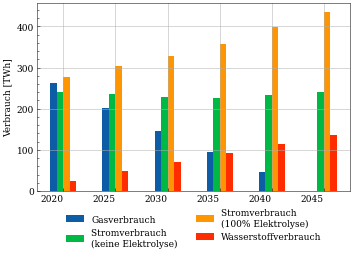

In [16]:
# (new_df['Gasverbrauch absolut']/1000000).plot(kind='bar')
df_plot = new_df[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]/1000000
plot_bar_grouped(df_plot, w_cm=14, coords=[0.5,-0.05], fig_name='16_industry_post_switch')

In [17]:
new_df

Gas no switch  Gas rep by el  Gas rep by hydro  Gasverbrauch  \
2020   3.162286e+08   2.589051e+07      2.681426e+07  2.635238e+08   
2025   3.037630e+08   4.934044e+07      5.191389e+07  2.025087e+08   
2030   2.923302e+08   7.070184e+07      7.546327e+07  1.461651e+08   
2035   2.845372e+08   9.086905e+07      9.882241e+07  9.484573e+07   
2040   2.836868e+08   1.125925e+08      1.238132e+08  4.728114e+07   
2045   2.805517e+08   1.328317e+08      1.477201e+08  5.960464e-08   

      Power no switch  Power on top from switch  \
2020     2.299618e+08              1.139066e+07   
2025     2.127700e+08              2.192024e+07   
2030     1.967538e+08              3.098948e+07   
2035     1.863583e+08              4.027069e+07   
2040     1.842782e+08              5.012469e+07   
2045     1.802754e+08              5.914003e+07   

      Stromverbrauch \n(keine Elektrolyse)  Power on top from elektrolysis  \
2020                          2.413525e+08                    3.600665e+07   
2025                          2.346903e+08                    6.949056e+07   
2030                          2.277433e+08                    1.006844e+08   
2035                          2.266290e+08                    1.315304e+08   
2040                          2.344029e+08                    1.646281e+08   
2045                          2.394154e+08                    1.959947e+08   

      Stromverbrauch \n(100% Elektrolyse)  Wasserstoffverbrauch  
2020                         2.773591e+08          2.520465e+07  
2025                         3.041808e+08          4.864339e+07  
2030                         3.284276e+08          7.047906e+07  
2035                         3.581593e+08          9.207126e+07  
2040                         3.990310e+08          1.152397e+08  
2045                         4.354101e+08          1.371963e+08

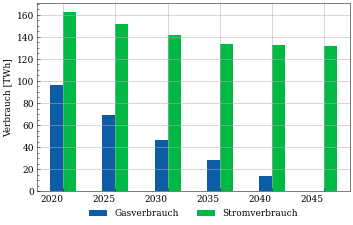

In [ ]:
new_df_cts
# (new_df['Gasverbrauch absolut']/1000000).plot(kind='bar')
df_plot = new_df_cts[['Gasverbrauch', 'Stromverbrauch']]/1000000
plot_bar_grouped(df_plot, w_cm=14, coords=[0.5,-0.05], fig_name='16_cts_post_switch')

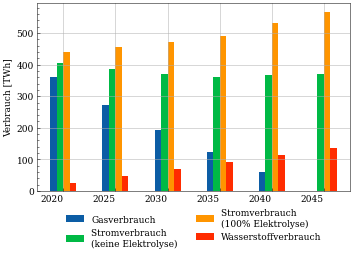

In [66]:
df_plot_1 = new_df[['Gasverbrauch', 'Stromverbrauch \n(keine Elektrolyse)', 'Stromverbrauch \n(100% Elektrolyse)', 'Wasserstoffverbrauch']]/1000000
df_plot_2 = new_df_cts[['Gasverbrauch', 'Stromverbrauch']]/1000000
df_plot_3 = pd.DataFrame()
df_plot_3['Gasverbrauch'] = df_plot_1['Gasverbrauch'].add(df_plot_2['Gasverbrauch'])
df_plot_3['Stromverbrauch \n(keine Elektrolyse)'] = df_plot_1['Stromverbrauch \n(keine Elektrolyse)'].add(df_plot_2['Stromverbrauch'])
df_plot_3['Stromverbrauch \n(100% Elektrolyse)'] = df_plot_1['Stromverbrauch \n(100% Elektrolyse)'].add(df_plot_2['Stromverbrauch'])
df_plot_3['Wasserstoffverbrauch'] = df_plot_1['Wasserstoffverbrauch']

plot_bar_grouped(df_plot_3, w_cm=14, coords=[0.5,-0.05], fig_name='16_cts+industry_post_switch')

### 10 after fuel-switch regional results

In [18]:
col_slice = pd.IndexSlice

# for gas to be rep
df_app_gas_left_after_elec = pd.read_csv("./data_out/Diss/09_cts_industry_gas_left_after_switch_regions_years.csv", header=[0,1], index_col=[0]).groupby(level=0, axis=1).sum()
df_app_gas_left_after_elec.columns = df_app_gas_left_after_elec.columns.astype(int)
df_app_gas_rep_hydro_app = pd.read_csv("./data_out/Diss/18_results_gas_replaced_hydro_industry_regions_years.csv", header=[0,1], index_col=[0])
df_app_gas_rep_hydro_app_gas = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Gas']].droplevel(1,axis=1).rename(config.dict_region_code(keys='ags_lk'), axis=0)
df_app_gas_rep_hydro_app_gas.columns = df_app_gas_rep_hydro_app_gas.columns.astype(int)

# elec before switch
df_elec_before_switch_cts = pd.read_csv("./data_out/Diss/15_cts_electricity_before_switch_years_regions.csv", header=0, index_col=[0])
df_elec_before_switch_ind = pd.read_csv("./data_out/Diss/15_industry_electricity_before_switch_years_regions.csv", header=0, index_col=[0])

df_elec_before_switch = df_elec_before_switch_cts.add(df_elec_before_switch_ind)
df_elec_before_switch.columns = df_elec_before_switch.columns.astype(int)

# elec on top industry
df_app_elc_on_top_app_2020_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2020.csv", header=0, index_col=[0], names=[2020]).dropna()
df_app_elc_on_top_app_2025_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2025.csv", header=0, index_col=[0], names=[2025]).dropna()
df_app_elc_on_top_app_2030_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2030.csv", header=0, index_col=[0], names=[2030]).dropna()
df_app_elc_on_top_app_2035_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2035.csv", header=0, index_col=[0], names=[2035]).dropna()
df_app_elc_on_top_app_2040_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2040.csv", header=0, index_col=[0], names=[2040]).dropna()
df_app_elc_on_top_app_2045_ind = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_industry_regions_2045.csv", header=0, index_col=[0], names=[2045]).dropna()

df_app_elc_on_top_app_state_ind = (pd.concat([df_app_elc_on_top_app_2020_ind, df_app_elc_on_top_app_2025_ind, df_app_elc_on_top_app_2030_ind,
                                         df_app_elc_on_top_app_2035_ind, df_app_elc_on_top_app_2040_ind, df_app_elc_on_top_app_2045_ind], axis=1)
                               .rename(config.dict_region_code(keys='ags_lk'), axis=0))

# elec on top CTS
# repair data
df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2020.csv", header=0, index_col=[0], names=[2020])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2020.csv", header=0, index_col=[0], names=[2020])
df_app_elc_on_top_app_2020 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2025.csv", header=0, index_col=[0], names=[2025])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2025.csv", header=0, index_col=[0], names=[2025])
df_app_elc_on_top_app_2025 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2030.csv", header=0, index_col=[0], names=[2030])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2030.csv", header=0, index_col=[0], names=[2030])
df_app_elc_on_top_app_2030 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_1 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SH_bis_BY_2035.csv", header=0, index_col=[0], names=[2035])
df_app_elc_on_top_app_2 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_SL_bis_TH_2035.csv", header=0, index_col=[0], names=[2035])
df_app_elc_on_top_app_2035 = df_app_elc_on_top_app_1.add(df_app_elc_on_top_app_2, axis=1)

df_app_elc_on_top_app_2040 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_2040.csv", header=0, index_col=[0], names=[2040]).dropna()

df_app_elc_on_top_app_2045 = pd.read_csv("./data_out/Diss/11_results_elec_from_switch_cts_regions_2045.csv", header=0, index_col=[0], names=[2045]).dropna()

df_app_elc_on_top_app_state_cts = (pd.concat([df_app_elc_on_top_app_2020, df_app_elc_on_top_app_2025, df_app_elc_on_top_app_2030,
                                         df_app_elc_on_top_app_2035, df_app_elc_on_top_app_2040, df_app_elc_on_top_app_2045], axis=1)
                               .rename(config.dict_region_code(keys='ags_lk'), axis=0))


# hydro on top
df_app_gas_rep_hydro_app_hydro = df_app_gas_rep_hydro_app.loc[:, col_slice[:, 'Wasserstoff']].droplevel(1,axis=1).rename(config.dict_region_code(keys='ags_lk'), axis=0)
df_app_gas_rep_hydro_app_hydro.columns = df_app_gas_rep_hydro_app_hydro.columns.astype(int)

# elec on top elektrolysers
df_app_gas_rep_hydro_app_elektrolysers = df_app_gas_rep_hydro_app_hydro/0.7

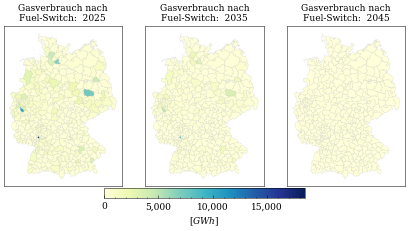

In [74]:
# plot gas abs
df_plot = (df_app_gas_left_after_elec[[2025, 2035, 2045]]).sub(df_app_gas_rep_hydro_app_gas[[2025, 2035,2045]])#.drop('DEB34')

w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_gas_after_switch_years"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Gasverbrauch nach\nFuel-Switch: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')
plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

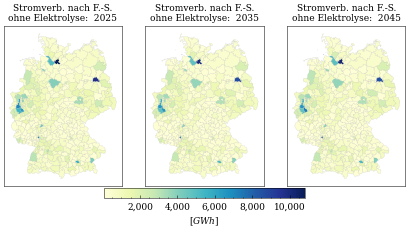

In [75]:
# plot elec abs
years=[2025, 2035, 2045]
df_plot = (df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years])
#df_plot = df_plot.nlargest(25, columns=2045)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_no_electrolysis"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Stromverb. nach F.-S.\nohne Elektrolyse: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

<AxesSubplot:>

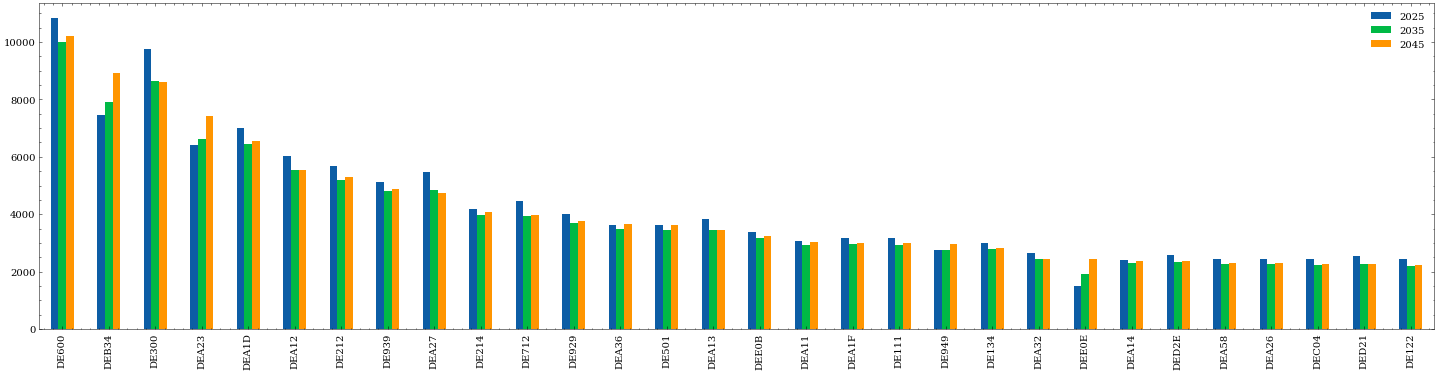

In [67]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).plot(kind='bar', figsize=(25,6))

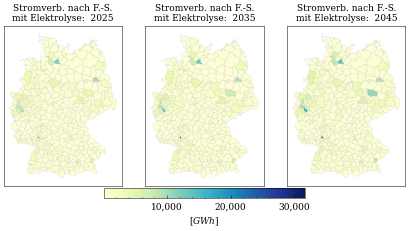

In [76]:
# plot elec abs mit elektrolyse
years=[2025, 2035, 2045]
df_plot = (df_elec_before_switch[years]).add(df_app_elc_on_top_app_state_ind[years]).add(df_app_elc_on_top_app_state_cts[years]).add(df_app_gas_rep_hydro_app_elektrolysers[years])
# df_plot = df_plot.nlargest(10, columns=2045)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_elec_after_switch_years_with_electrolysis"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Stromverb. nach F.-S.\nmit Elektrolyse: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

<AxesSubplot:>

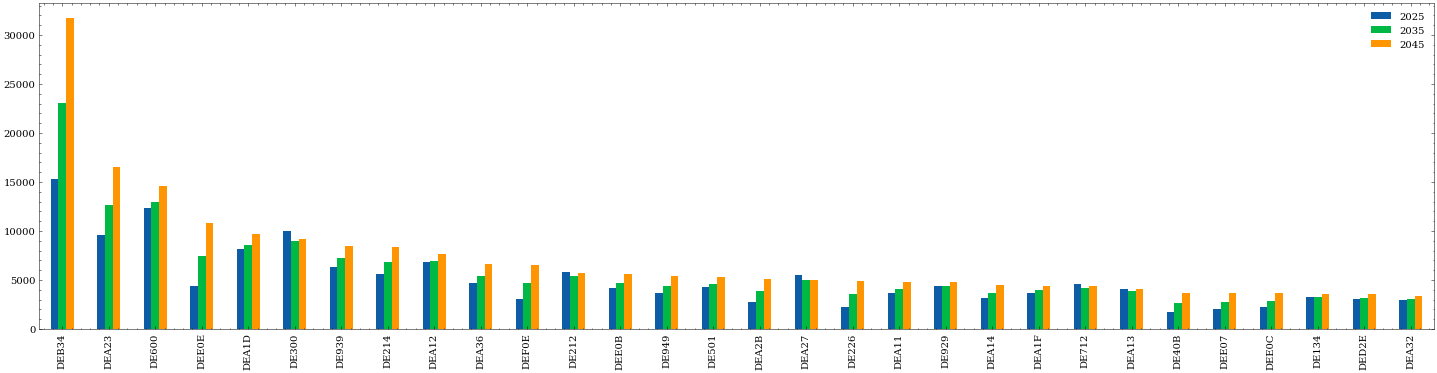

In [69]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).rename(config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(25,6))

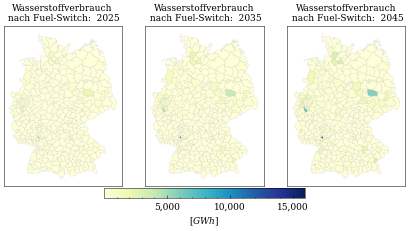

In [77]:
# plothydro
years=[2025, 2035, 2045]
df_plot = (df_app_gas_rep_hydro_app_hydro[years])
#df_plot = df_plot.drop(df_plot.nlargest(1, columns=2045).index)
w_cm=18
w_in=w_cm/2.5
h_in=w_in/1.618
fig_name="11_abs_regional_hydro_after_switch_years"


fig, ax = plot.choropleth_map(df_plot/1000, relative=False, unit='GWh', axtitle='Wasserstoffverbrauch\n nach Fuel-Switch: ', 
                              colorbar_each_subplot=False,  add_percentages=False, mode='manual', figsize=(w_in,(h_in)),
                              orientation='landscape', fontsize=9, linewidth=0.1, license_tag=False, cmap='YlGnBu')

plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')

<AxesSubplot:>

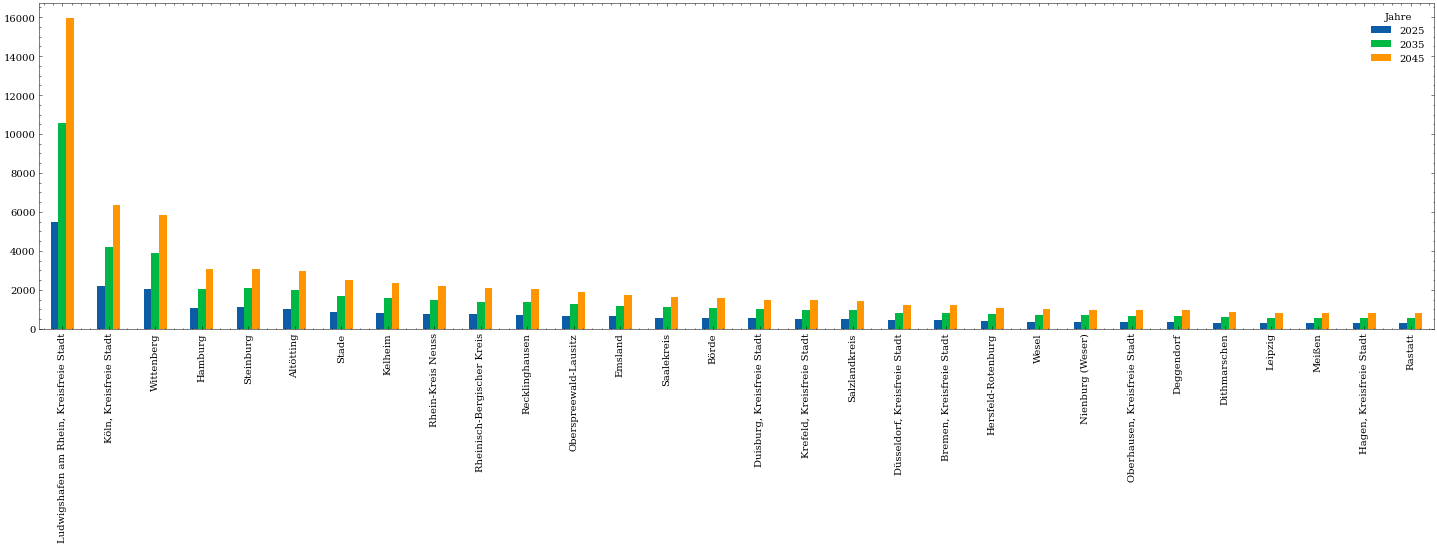

In [73]:
idx = ((df_plot[2045]).nlargest(30)).index
(df_plot.loc[idx]/1000).rename(config.dict_region_code(keys='natcode_nuts3', values='name')).plot(kind='bar', figsize=(25,6))

### 11 after fuel switch temporal results

In [31]:
df_app_gas_pre_switch_curve_2035_cts.sum()/1000000

84.04786544327474

In [8]:
col_slice = pd.IndexSlice

# industry before switch elec
df_app_elc_pre_switch_curve_2025_ind = pd.read_csv(path + "/17_load_curve_before_switch_elec_industry_2025.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2035_ind = pd.read_csv(path + "/17_load_curve_before_switch_elec_industry_2035.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2045_ind = pd.read_csv(path + "/17_load_curve_before_switch_elec_industry_2045.csv", header=[0], index_col=[0]).dropna().sum(axis=1)


In [17]:
col_slice = pd.IndexSlice

# industry before switch elec
df_app_elc_pre_switch_curve_2025_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_industry_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2035_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_industry_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2045_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_industry_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry before switch gas no KO
df_app_gas_pre_switch_curve_2025_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_ind = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry before switch gas with KO
df_app_gas_pre_switch_curve_2025_ind_KO = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2025_new_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_ind_KO = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2035_new_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_ind_KO = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_industry_2045_new_with_KO.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# cts before switch elec
df_app_elc_pre_switch_curve_2025_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_cts_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2035_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_cts_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_elc_pre_switch_curve_2045_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_elec_cts_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# cts before switch gas
df_app_gas_pre_switch_curve_2025_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_cts_2025_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2035_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_cts_2035_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)
df_app_gas_pre_switch_curve_2045_cts = pd.read_csv("./data_out/Diss/17_load_curve_before_switch_gas_cts_2045_new.csv", header=[0], index_col=[0]).dropna().sum(axis=1)

# industry power on top
df_app_elc_on_top_curve_2025_ind = pd.read_csv("./data_out/Diss/14_results_elec_from_switch_industry_load_curve_2025_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_elc_on_top_curve_2035_ind = pd.read_csv("./data_out/Diss/14_results_elec_from_switch_industry_load_curve_2035_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_elc_on_top_curve_2045_ind = pd.read_csv("./data_out/Diss/14_results_elec_from_switch_industry_load_curve_2045_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)

# industry gas replaced by electrification no KO
df_app_gas_replaced_curve_2025_ind_no_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2025_no_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2035_ind_no_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2035_no_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2045_ind_no_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2045_no_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)

# industry gas replaced by electrification with KO
df_app_gas_replaced_curve_2025_ind_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2025_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2035_ind_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2035_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)
df_app_gas_replaced_curve_2045_ind_KO = pd.read_csv("./data_out/Diss/14_results_gas_to_switch_industry_gas_curve_2045_new_with_KO.csv", header=[0, 1], index_col=[0]).dropna().sum(axis=1)

# industry gas replaced by hydrogen
df_app_gas_replaced_by_hydro_curve_2025_ind = pd.read_csv("./data_out/Diss/18_results_gas_to_hydro_industry_curve_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_by_hydro_curve_2035_ind = pd.read_csv("./data_out/Diss/18_results_gas_to_hydro_industry_curve_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_gas_replaced_by_hydro_curve_2045_ind = pd.read_csv("./data_out/Diss/18_results_gas_to_hydro_industry_curve_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)

# cts power on top
df_app_elc_on_top_curve_2025_cts = (pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SH_bis_BY_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SL_bis_TH_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_elc_on_top_curve_2035_cts = (pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SH_bis_BY_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SL_bis_TH_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_elc_on_top_curve_2045_cts = (pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SH_bis_BY_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_elec_from_switch_cts_load_curve_SL_bis_TH_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
# cts gas replaced
df_app_gas_replaced_curve_2025_cts = (pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SH_bis_BY_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SL_bis_TH_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_gas_replaced_curve_2035_cts = (pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SH_bis_BY_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SL_bis_TH_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
df_app_gas_replaced_curve_2045_cts = (pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SH_bis_BY_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
                                    + pd.read_csv("./data_out/Diss/14_results_gas_to_switch_cts_gas_curve_SL_bis_TH_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1))
# industry hydrogen on top
df_app_hydro_curve_2025_ind = pd.read_csv("./data_out/Diss/18_results_hydro_industry_curve_2025_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_hydro_curve_2035_ind = pd.read_csv("./data_out/Diss/18_results_hydro_industry_curve_2035_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)
df_app_hydro_curve_2045_ind = pd.read_csv("./data_out/Diss/18_results_hydro_industry_curve_2045_new.csv", header=[0, 1], index_col=[0]).dropna(axis=1).sum(axis=1)


In [120]:
df_gesamt_no_switch = pd.read_csv('./data_out/Diss/02_results_Bundesebene_2019_2050.csv', header=[0,1], index_col=[0])
df_gesamt_no_switch.loc[[2025, 2035, 2045]]/1000000

Sektoren              CTS                industry            
Energieträger       power         gas       power         gas
2025           141.711996  103.430509  212.770025  303.762985
2035           117.507436   84.046493  186.358274  284.537185
2045           109.717729   77.788975  180.275382  280.551725

In [4]:
w_cm=15.5 
w_in=w_cm/2.5
h_in=w_in/1.52

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


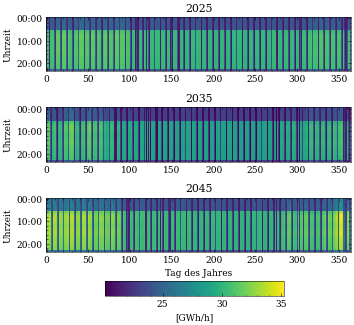

In [68]:
# industrie strom 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_elc_pre_switch_curve_2025_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2025_ind.index)
df_app_elc_pre_switch_curve_2035_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2035_ind.index)
df_app_elc_pre_switch_curve_2045_ind.index = pd.to_datetime(df_app_elc_pre_switch_curve_2045_ind.index)

df_app_elc_on_top_curve_2025_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2025_ind.index)
df_app_elc_on_top_curve_2035_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2035_ind.index)
df_app_elc_on_top_curve_2045_ind.index = pd.to_datetime(df_app_elc_on_top_curve_2045_ind.index)

df_plot[2025] = (df_app_elc_pre_switch_curve_2025_ind + df_app_elc_on_top_curve_2025_ind)
df_plot[2035] = (df_app_elc_pre_switch_curve_2035_ind + df_app_elc_on_top_curve_2035_ind).values.tolist()
df_plot[2045] = (df_app_elc_pre_switch_curve_2045_ind + df_app_elc_on_top_curve_2045_ind).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig('./data_out/Plots/17_load_curves_years_industry_elec.svg')

In [16]:
# cts gas 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_cts.index)
df_app_gas_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_cts.index)
df_app_gas_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_cts.index)

df_app_gas_replaced_curve_2025_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2025_cts.index)
df_app_gas_replaced_curve_2035_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2035_cts.index)
df_app_gas_replaced_curve_2045_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2045_cts.index)

df_plot[2025] = (df_app_gas_pre_switch_curve_2025_cts - df_app_gas_replaced_curve_2025_cts.resample('H').sum()).clip(0)
df_plot[2035] = (df_app_gas_pre_switch_curve_2035_cts - df_app_gas_replaced_curve_2035_cts.resample('H').sum()).clip(0).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_cts - df_app_gas_replaced_curve_2045_cts.resample('H').sum()).clip(0).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
plt.savefig('./data_out/Plots/17_load_curves_years_cts_gas.svg')

In [25]:

df_plot[2045]

2025-01-01 00:00:00     0.000000
2025-01-01 01:00:00     0.000000
2025-01-01 02:00:00     0.000000
2025-01-01 03:00:00     0.000000
2025-01-01 04:00:00     0.000000
                         ...    
2025-12-31 19:00:00     0.000000
2025-12-31 20:00:00     0.000000
2025-12-31 21:00:00     0.000000
2025-12-31 22:00:00    35.036564
2025-12-31 23:00:00     0.000000
Name: 2045, Length: 8760, dtype: float64

In [26]:
df_plot.sum()/1000000

2025    68.955673
2035    28.016870
2045     2.478790
dtype: float64

Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i, j].set_yticklabels(labels=dfs.index.astype(str).values)
Z:\PRO\PRO_DemandRegio\Arbeitsbereich_indiv\PV\Git\demandregio_github\disaggregator\plot.py:376: UserWarning: FixedFormatter should only be used together with FixedLocator
  '20:00'])


(<Figure size 446.4x293.684 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'2025'}, ylabel='Uhrzeit'>],
        [<AxesSubplot:title={'center':'2035'}, ylabel='Uhrzeit'>],
        [<AxesSubplot:title={'center':'2045'}, xlabel='Tag des Jahres', ylabel='Uhrzeit'>]],
       dtype=object))

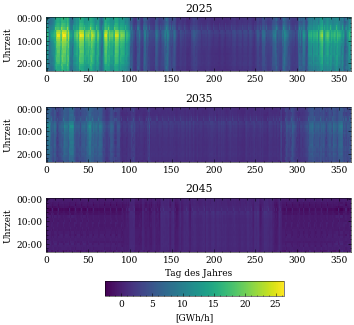

In [72]:
# cts gas 2025, 2035, 2045
df_plot = pd.DataFrame()

df_app_gas_pre_switch_curve_2025_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2025_cts.index)
df_app_gas_pre_switch_curve_2035_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2035_cts.index)
df_app_gas_pre_switch_curve_2045_cts.index = pd.to_datetime(df_app_gas_pre_switch_curve_2045_cts.index)

df_app_gas_replaced_curve_2025_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2025_cts.index)
df_app_gas_replaced_curve_2035_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2035_cts.index)
df_app_gas_replaced_curve_2045_cts.index = pd.to_datetime(df_app_gas_replaced_curve_2045_cts.index)

df_plot[2025] = (df_app_gas_pre_switch_curve_2025_cts - df_app_gas_replaced_curve_2025_cts.resample('H').sum())
df_plot[2035] = (df_app_gas_pre_switch_curve_2035_cts - df_app_gas_replaced_curve_2035_cts.resample('H').sum()).values.tolist()
df_plot[2045] = (df_app_gas_pre_switch_curve_2045_cts - df_app_gas_replaced_curve_2045_cts.resample('H').sum()).values.tolist()
df_plot.index = pd.to_datetime(df_plot.index)

plot.heatmap_timeseries((df_plot.resample('H').sum())/1000, fontsize=9, figsize=(w_in,h_in), clabel='[GWh/h]', sharex=False)
#plt.savefig('./data_out/Plots/17_load_curves_years_industry_elec.svg')

In [109]:
df_app_gas_pre_switch_curve_2045_cts.sum()/1000000

133.18492274273567

In [112]:
df_app_gas_replaced_curve_2045_cts.sum()/1000000

77.78897521082256

### 13 Plots of input data

#### Plot Verbräuche

In [173]:
df_2018 = data.generate_specific_consumption_per_branch(year=2018)
df_gv_sg_2018 =df_2018[5]
df_gv=df_2018[2]
df_gv.loc[33]

df = pd.DataFrame()
df['Restlicher Erdgasverbrauch'] = (df_gv_sg_2018)
df['Erdgas für Stromproduktion'] = (1-df_gv_sg_2018)
df['Erdgasverbrauch 2018'] = df_gv['GV_MWh']/1000000

In [174]:
gas_ind = df.sort_index().iloc[3:32]['Erdgasverbrauch 2018'].sum()

In [175]:
df_plot = df.sort_index().iloc[3:32].nlargest(10, columns='Erdgasverbrauch 2018').rename(index=config.dict_wz())
df_plot['Erdgasverbrauch 2018'].sum()/gas_ind

0.892945598766775

In [170]:
df_plot#.iloc[:,:2]

Restlicher Erdgasverbrauch  Erdgas für Stromproduktion  \
Chemieindustrie                          0.849631                    0.150369   
Metallerzeugung                          0.686154                    0.313846   
Nahrungsindustrie                        0.896848                    0.103152   
Papierindustrie                          0.751733                    0.248267   
Glas & Keramik                           0.989240                    0.010760   
Kokerei & Mineralöl                      0.709267                    0.290733   
Metallerzeugnisse                        0.950187                    0.049813   
Fahrzeugbau                              0.937995                    0.062005   
Pharmazeut. Industrie                    0.990649                    0.009351   
Gummi & Kunststoffe                      0.915208                    0.084792   

                       Gasverbrauch 2018  
Chemieindustrie                97.673571  
Metallerzeugung                40.068993  
Nahrungsindustrie              33.330034  
Papierindustrie                32.307634  
Glas & Keramik                 31.307784  
Kokerei & Mineralöl            22.817163  
Metallerzeugnisse              12.572960  
Fahrzeugbau                    10.315541  
Pharmazeut. Industrie           8.479823  
Gummi & Kunststoffe             7.959766

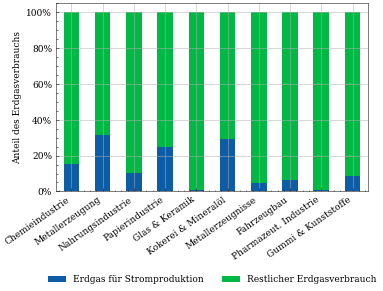

In [97]:
plot_bar(df=df_plot[['Erdgas für Stromproduktion', 'Restlicher Erdgasverbrauch']]*100,
         w_cm=14, ncol=2,loc='upper center', coords=[0.5, -0.4], ylabel='Anteil des Erdgasverbrauchs', rot=35, percentage=True, fig_name=None)
#.plot(kind='bar', stacked=True)


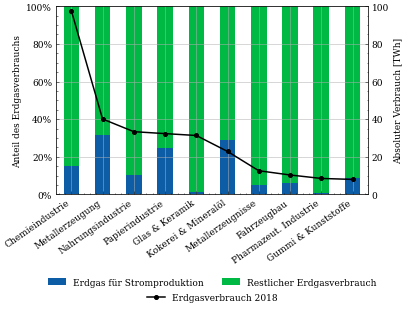

In [176]:
plot_bar_twinx(df1=df_plot[['Erdgas für Stromproduktion', 'Restlicher Erdgasverbrauch']]*100,df2=df_plot[['Erdgasverbrauch 2018']],
               w_cm=14, ncol=2,loc='upper center', coords=[0.5, -0.4], coords2=[0.5, -0.48], ylabel='Anteil des Erdgasverbrauchs', ylabel2='Absoluter Verbrauch [TWh]',ylim=(0,100), ylim2=(0,100),rot=35, percentage=True,
               fig_name='Input_Erdgas_selfgen')
#.plot(kind='bar', stacked=True)


In [165]:
def plot_bar_twinx(df1, df2, w_cm=12.5, title=None, f=1, ylabel='Verbrauch [TWh]',ylabel2='Verbrauch [TWh]', xlabel='', stacked=True, ylim=None, ylim2=None, xlim=None,
                   loc=None, ncol=None, coords=None,coords2=None,fs=9, fig_name=None, lw=1, rot=0, percentage=False):
    w_in=w_cm/2.5
    plt.rcParams.update({'font.size':fs})
    
    fig,ax1 = plt.subplots(figsize=(w_in,(w_in/(1.618*f))))
    
    ax2 = ax1.twinx()

    
    df1.plot(ax=ax1, kind='bar', stacked=stacked)
    df2.plot(ax=ax2, kind='line', marker="o", markersize=4, linewidth=1.5, c='black')
       
    # plt.plot((df_el_cts.T.sum(axis=1)/1000000),'o-', markersize=2, label='Strom')
    # plt.plot((df_gas_cts.T.sum(axis=1)/1000000), 'o-',markersize=2, label='Gas')

    ax1.grid(True)
    ax1.set_ylim(ylim)
    ax1.set_xlim(xlim)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.tick_params(axis='both', which='both', top=False, right=False)
    ax1.set_xticklabels(labels=ax1.get_xticklabels(), rotation=rot, ha='right')
    ax1.legend(loc=loc, bbox_to_anchor=(coords), ncol=ncol)
    ax1.set_title(title)
    
    ax2.set_ylim(ylim2)
    ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))
    ax2.set_ylabel(ylabel2)
    ax2.legend(loc=loc, bbox_to_anchor=(coords2), ncol=ncol)
    
    if percentage:
        ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

    if fig_name is not None:
        plt.savefig('./data_out/Plots/'+ str(fig_name)+'.svg')
    plt.show()

#### plot Beschäftigte

In [201]:
# get number of employees (bze) from database
bze_je_lk_wz = pd.DataFrame(data.employees_per_branch(year=2017))
bze_lk_wz = data.reshape_employees_df(bze_je_lk_wz)
df_plot = bze_lk_wz.sum().to_frame(name='Beschäftigte').drop_duplicates()


In [202]:
new_row=(df_plot.loc['1']+df_plot.loc['2']+df_plot.loc['3'])
new_row.name ='1-3'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['5']+df_plot.loc['6']+df_plot.loc['7-9'])
new_row.name ='5-9'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['17']+df_plot.loc['18'])
new_row.name ='17-18'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['26']+df_plot.loc['27'])
new_row.name ='26-27'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['28']+df_plot.loc['29']+df_plot.loc['30'])
new_row.name ='28-30'
df_plot=df_plot.append(new_row)
new_row=(df_plot.loc['52']+df_plot.loc['53'])
new_row.name ='52-53'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['45']+df_plot.loc['46']+df_plot.loc['47'])
new_row.name ='45-47'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['50']+df_plot.loc['51'])
new_row.name ='50-51'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['36']+df_plot.loc['37']+df_plot.loc['38-39'])
new_row.name ='36-39'
df_plot=df_plot.append(new_row)

new_row=(df_plot.loc['41-42']+df_plot.loc['43'])
new_row.name ='41-43'
df_plot=df_plot.append(new_row)

df_plot.drop(index=['1', '2', '3', '5', '6', '7-9', '17', '18', '26', '27', '28', '29', '30', '35', '36', '37', '38-39', '41-42', '43', '45', '46', '47', '50', '51', '52', '53'], inplace=True)
df_plot.sort_index(inplace=True)

In [203]:
values=['Land- u. Forstwirtschaft', 'Nahrungsmittel, u. Tabak', 'Bekleidungsindustrie', 'Holzwaren', 'Papierindustrie u. Druckereien', 'Kokerei- u. Mineralölerzeugnisse',
        'Chemische Industrie', 'Pharmazeutische Industrie', 'Gummi- u. Kunststoffwaren', 'Glasherstellung', 'Metallerzeugung', 'Herst. v. Metallerzeugnissen',
        'Herst. elektr. und opt. Geräte', 'Maschinen u. Fahrzeugbau', 'Hst. v. Möbeln', 'Reparatur Maschinen u. Anl.', 'Wasserwesen u. Abfallentsorgung', 
        'Baugewerbe', 'Handel', 'Landverkehr','Bergbau', 'Schiff- u. Luftfahrt', 'Post u. Lagerei', 'Beherbergung u. Gastronomie',
        'Informations- u. Kommunikations DL', 'Finanz- u. Versicherungsgewerbe', 'Grundstücks- u. Wohnungswesen', 'Wissenschaftliche u. technische DL',
        'Sonst. wirtschaftliche DL', 'Öffentl. Verwaltung', 'Erziehung u. Unterricht', 'Gesundheits- u. Sozialwesen', 'Sonst. DL']
keys=df_plot.sort_index().index
dict_names = dict(zip(keys,values))
df_plot = df_plot.rename(index=dict_names)#.iloc[6:]

In [204]:
# dict_names

In [205]:
# config.dict_wz()

In [206]:
#values=['Landwirtschaft', 'Land-, Forst- u. Fischereiwirtschaft', 'Forstwirtschaft', 'Fischerei', 'Kohle', 'Erdöl und Erdgas', 'Erze, Steine u. Erden',
#        'Nahrungsmittel, u. Tabak', 'Bekleidungsindustrie', 'Holzwaren', 'Papierherstellung', 'Druckereien', 'Kokerei- u. Mineralölerzeugnisse',
#        'Chemische Industrie', 'Pharmazeutische Industrie', 'Gummi- u. Kunststoffwaren', 'Glasherstellung', 'Metallerzeugung', 'Herst. v. Metallerzeugnissen',
#        'Hst. elektronischer u. optischer Erz.', 'Elektrische Ausrüstungen', 'Maschinenbau', 'Fahrzeugbau', 'Sonstiger Fahrzeugbau', 'Hst. v. Möbeln', 
#        'Reparatur Maschinen u. Anl.', 'Energieversorgung', 'Wasserversorgung', 'Abwasserentsorgung', 'Abfallentsorgung', 'Hoch- u. Tiefbau', 'Vorb. Baustellenarbeiten',
#        'Kfz-Handel', 'Großhandel', 'Einzelhandel', 'Landverkehr', 'Schifffahrt', 'Luftfahrt', 'Lagerei', 'Post', 'Beherbergung u. Gastronomie',
#        'Informations- u. Kommunikations DL', 'Finanz- u. Versicherungsgewerbe', 'Grundstücks- u. Wohnungswesen', 'Wissenschaftliche u. technische DL',
#        'Sonst. wirtschaftliche DL', 'Öffentl. Verwaltung', 'Erziehung u. Unterricht', 'Gesundheits- u. Sozialwesen', 'Sonst. DL',  'Bergbau',
#        'Papierindustrie u. Druckereien', 'Herst. elektr. und opt. Geräte', 'Maschinen u. Fahrzeugbau', 'Post u. Lagerei']

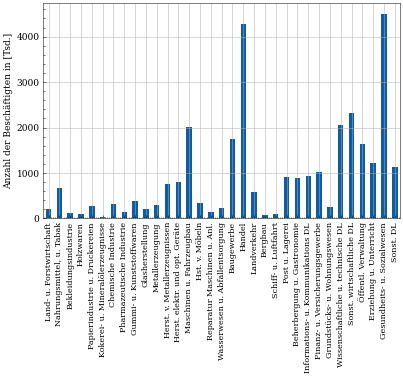

In [207]:
plot_bar(df_plot/1000, w_cm=16, rot=90, ylabel='Anzahl der Beschäftigten in [Tsd.]',fs_xticks=8, fig_name='Beschaftigte_2018', legend=False)

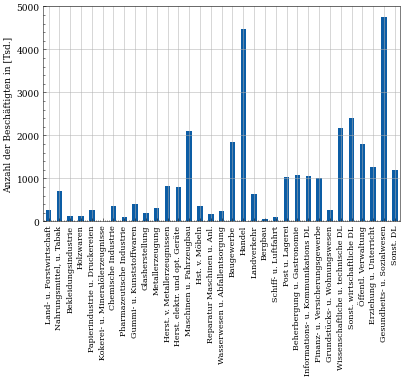

In [200]:
plot_bar(df_plot/1000, w_cm=16, rot=90, ylabel='Anzahl der Beschäftigten in [Tsd.]',fs_xticks=8, fig_name='Beschaftigte_2017', legend=False)

#### Plot BWS

In [139]:
df_BWS = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=1, header=[0,1], index_col=0)
df_BWS['Durchschnitt'] = df_BWS.mean(axis=1)
df_BWS['Summe'] = df_BWS.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_BWS.iloc[:, col_slice[[5,12,15,18, 19,23, 24]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot.head()

Herstellung von Nahrungs- und Futtermitteln  \
2015                                   29795836.0   
2016                                   32644166.0   
2017                                   32978938.0   
2018                                   33548422.0   
2019                                   34447429.0   

      Herstellung von Papier, Pappe und Waren daraus  \
2015                                      10249216.0   
2016                                      10492563.0   
2017                                      10708109.0   
2018                                      11456037.0   
2019                                      11257919.0   

      Herstellung von chemischen Erzeugnissen  \
2015                               39820214.0   
2016                               42259022.0   
2017                               45445108.0   
2018                               42246597.0   
2019                               40633463.0   

      Herstellung von Glas und Glaswaren, Keramik, Verarbeitung von Steinen und Erden  \
2015                                         13572929.0                                 
2016                                         14681030.0                                 
2017                                         15124370.0                                 
2018                                         15924338.0                                 
2019                                         16110285.0                                 

      Metallerzeugung und -bearbeitung  Maschinenbau  \
2015                        18858851.0    82271875.0   
2016                        19176665.0    85353839.0   
2017                        20736379.0    91600696.0   
2018                        22209720.0    95404750.0   
2019                        19202209.0    92970351.0   

      Herstellung von Kraftwagen und Kraftwagenteilen  
2015                                       96380552.0  
2016                                      107044021.0  
2017                                      105985303.0  
2018                                      105260940.0  
2019                                      102048712.0

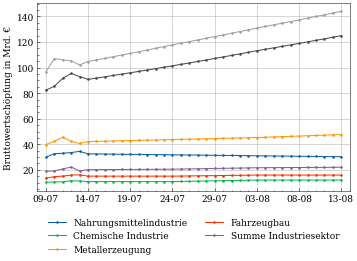

In [140]:

#plot_line(df_plot/1000000, ylim=(0,350), xlim=(2000, 2020), labels=['GHD Strom', 'GHD Gas', 'Industrie Strom', 'Industrie Gas'], fs=9, loc=9, coords=(0.5, -0.1), ncol=2)

plot_line(df_plot/1000000, w_cm=14, f=1, labels=['Nahrungsmittelindustrie', 'Chemische Industrie', 'Metallerzeugung', 'Fahrzeugbau', 'Summe Industriesektor'],
         fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Bruttowertschöpfung in Mrd. €', xlim=(2014, 2051))

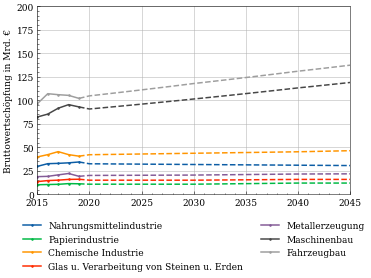

In [142]:
plot_multi_line([df_plot1/1000000, df_plot2/1000000], w_cm=14, ylim=(0,200), xlim=(2015, 2045),
                labels=['Nahrungsmittelindustrie', 'Papierindustrie','Chemische Industrie',  
                        'Glas u. Verarbeitung von Steinen u. Erden','Metallerzeugung', 'Maschinenbau','Fahrzeugbau'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Bruttowertschöpfung in Mrd. €', fig_name='BWS_Prognose')

#### plot Beschäftigte prognose

In [183]:
df_emp = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=2, header=[0,1], index_col=0)
df_emp['Summe'] = df_emp.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_emp.iloc[:, col_slice[[12,26, 31, 43,44,45]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot_emp =df_plot.copy()
df_plot.head()

Einzelhandel (ohne Handel mit Kraftfahrzeugen)  \
2015                                       2341363.0   
2016                                       2384846.0   
2017                                       2420456.0   
2018                                       2448806.0   
2019                                       2462599.0   

      Erbringung von Finanzdienstleistungen  \
2015                               661596.0   
2016                               648699.0   
2017                               634664.0   
2018                               624480.0   
2019                               619977.0   

      Verwaltung und Führung von Unternehmen und Betrieben; Unternehmensberatung  \
2015                                           621583.0                            
2016                                           641041.0                            
2017                                           678721.0                            
2018                                           712344.0                            
2019                                           743250.0                            

      Öffentliche Verwaltung, Verteidigung; Sozialversicherung  \
2015                                          1721059.0          
2016                                          1762296.0          
2017                                          1789273.0          
2018                                          1823784.0          
2019                                          1866922.0          

      Erziehung und Unterricht  Gesundheitswesen  
2015                 1184260.0         2338429.0  
2016                 1226198.0         2386229.0  
2017                 1266851.0         2437185.0  
2018                 1297011.0         2487503.0  
2019                 1329298.0         2554965.0

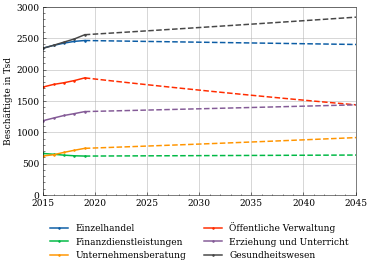

In [184]:
plot_multi_line([df_plot1/1000, df_plot2/1000], w_cm=14, ylim=(0,3000), xlim=(2015, 2045),
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','Öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='Beschäftigte in Tsd', fig_name='BEsch_Prognose')

#### plot EBF

In [162]:
df_ebf = pd.read_excel('./data_in/temporal/Activity_drivers.xlsx', sheet_name=3, header=[0,1], index_col=0)
df_ebf['Summe'] = df_ebf.sum(axis=1)
col_slice = pd.IndexSlice
df_plot = df_ebf.iloc[:, col_slice[[12,26, 31, 43,44,45]]]
df_plot = df_plot.copy().droplevel(1,axis=1)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]
df_plot_ebf =df_plot.copy()

df_plot.head()

Einzelhandel (ohne Handel mit Kraftfahrzeugen)  \
2015                                    1.749533e+08   
2016                                    1.788827e+08   
2017                                    1.822466e+08   
2018                                    1.850850e+08   
2019                                    1.868379e+08   

      Erbringung von Finanzdienstleistungen  \
2015                           1.970714e+07   
2016                           1.941460e+07   
2017                           1.908463e+07   
2018                           1.886745e+07   
2019                           1.882023e+07   

      Verwaltung und Führung von Unternehmen und Betrieben; Unternehmensberatung  \
2015                                       3.590219e+07                            
2016                                       3.710233e+07                            
2017                                       3.936409e+07                            
2018                                       4.139923e+07                            
2019                                       4.328436e+07                            

      Öffentliche Verwaltung, Verteidigung; Sozialversicherung  \
2015                                       9.793055e+07          
2016                                       1.003599e+08          
2017                                       1.019805e+08          
2018                                       1.040334e+08          
2019                                       1.065821e+08          

      Erziehung und Unterricht  Gesundheitswesen  
2015              7.636784e+07      6.316872e+07  
2016              7.932165e+07      6.476217e+07  
2017              8.220995e+07      6.645522e+07  
2018              8.443260e+07      6.814525e+07  
2019              8.680736e+07      7.032152e+07

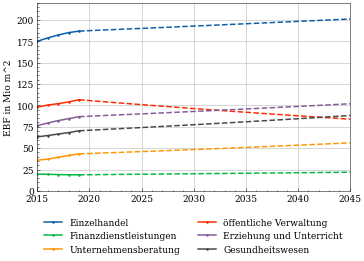

In [160]:
plot_multi_line([df_plot1/1000000, df_plot2/1000000], w_cm=14, xlim=(2015, 2045),ylim=(0,220),
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='EBF in Mio m^2', fig_name='EBF_Prognose')

In [164]:
df_plot = df_plot_ebf.div(df_plot_emp)
df_plot1 = df_plot.copy().loc[:2019]
df_plot2 = df_plot.copy().loc[2019:]

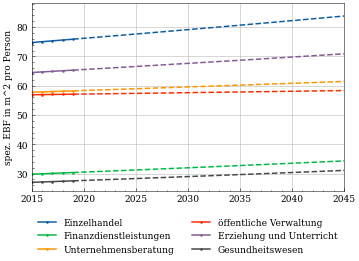

In [169]:
plot_multi_line([df_plot1, df_plot2], w_cm=14, xlim=(2015, 2045)
                labels=[ 'Einzelhandel','Finanzdienstleistungen',  
                        'Unternehmensberatung','öffentliche Verwaltung', 'Erziehung und Unterricht','Gesundheitswesen'],
                fs=9, loc=9, coords=(0.5, -0.1), ncol=2, ylabel='spez. EBF in m^2 pro Person')

#### Plots of BSP

In [2]:
df_bsp = (pd.read_excel("./data_in/temporal/Schichtprofile_timestamp_BE_2015.xlsx", header=[0], usecols=[0,1,2,3,4,5,6,7,8,9], 
                        index_col=[0], sheet_name="Schichtprofile_timestamp_BE_201"))
df_bsp.tail()

FileNotFoundError: [Errno 2] No such file or directory: './data_in/temporal/Schichtprofile_timestamp_BE_2015.xlsx'

In [ ]:
df_bsp_in_W=(df_bsp*4000000)
df_bsp_in_W.set_index(pd.to_datetime(df_bsp_in_W.index, utc=True), inplace=True)

In [ ]:
fontsize=15

plt.rcParams.update({'font.size': fontsize})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,(8*5/8)))
df_bsp_in_W.loc[df_bsp_in_W.index.isocalendar().week == 21][['S1_WT', 'S2_WT', 'S3_WT']].plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=fontsize)

#ax.locator_params(axis='x', nbins=6)
ax.set_ylabel('Last in W (Jahresverbrauch 1 MWh)', fontsize=fontsize)
ax.set_xlabel(None)
ax.legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=3)

plt.savefig('../Plots/BSP_Example.png', bbox_inches="tight", dpi=150)

#### Plot SLP

In [3]:
df_slp = pd.read_excel("./data_in/temporal/Power Load Profiles/39_VDEW_Strom_Repräsentative Profile_G0.xlsx", header=[2], usecols=[0,1,2,3], index_col=[0],nrows=96)
df_slp.head()

Samstag  Sonntag  Werktag
[W]                                
00:15:00     70.0     63.2     65.5
00:30:00     73.0     61.0     62.6
00:45:00     75.9     58.9     59.6
01:00:00     77.6     57.0     57.0
01:15:00     77.1     55.3     54.8

In [4]:
df_slp['neu']=pd.date_range("2018-01-01 00:15:00", periods=96, freq="15T")#.time
df_slp.set_index('neu', inplace=True)

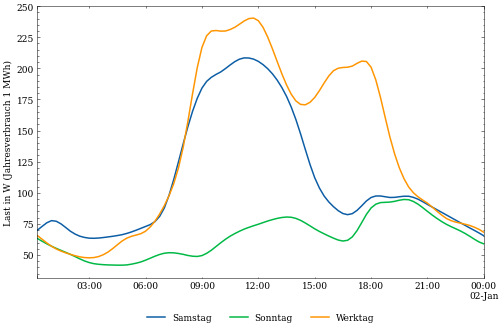

In [6]:
fontsize=9

plt.rcParams.update({'font.size': fontsize})
# plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,(8*5/8)))
df_slp.plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=fontsize)

#ax.locator_params(axis='x', nbins=6)
ax.set_ylabel('Last in W (Jahresverbrauch 1 MWh)', fontsize=fontsize)
ax.set_xlabel(None)
ax.legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=3)

#plt.savefig('../Plots/SLP_Example_Jan.png', bbox_inches="tight", dpi=150)

#### Plot BLP

In [7]:
df_industry_blp_wz17 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ17_Papierherstellung_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                        .rename(columns={"Mean_Value_01001":"Papierherstellung"}))
df_industry_blp_wz21 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ21_Pharmazeutische Erzeugnisse_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                       .rename(columns={"Mean_Value_01001":"Pharmazeutische Erzeugnisse"}))
df_industry_blp_wz87 = (pd.read_csv("./data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ87_Heime_401LK_2019.csv", sep=';', decimal=',',usecols=[0,1],index_col=[0])
                       .rename(columns={"Mean_Value_01001":"Heime"}))

FileNotFoundError: [Errno 2] No such file or directory: './data_in/Lastprofile/Branchenlastprofile/Branch_Prediction_WZ17_Papierherstellung_401LK_2019.csv'

In [ ]:
new_df= pd.concat([df_industry_blp_wz17, df_industry_blp_wz21, df_industry_blp_wz87], axis=1).set_index(pd.to_datetime(df_industry_blp_wz17.index))
new_df.sum()

In [ ]:
new_df.loc[new_df.index.isocalendar().week == 20]#.plot()#.resample('H').mean()

In [ ]:
year= 2019
fontsize=15

plt.rcParams.update({'font.size': fontsize})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,(8*5/8)))
new_df.loc[new_df.index.isocalendar().week == 20].plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=fontsize)
#ax.xaxis.set_tick_params(labelsize=fontsize)
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('Normierte Last in kW', fontsize=fontsize)
ax.set_xlabel(None)
ax.legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.1), loc='upper center',ncol=2 )
#plt.text(0.5, .95, ('Energiemenge: ' + str(int(round(df_fc.loc[df_fc.index.year==year].sum().sum()/1000,1)))+' TWh'), transform=ax.transAxes,  verticalalignment='center', horizontalalignment='center', color='black')

plt.savefig('../Plots/BLP_Example.png', bbox_inches="tight", dpi=150)

## other results

In [60]:
df_plot[2025].sum()/1000000

151.48517484165953

In [61]:
df_plot[2035].sum()/1000000

133.24199557687902

In [63]:
df_plot[2045].sum()/1000000

131.7187830720246

In [37]:
df_elec_ind = spatial.disagg_applications_eff(source='power', sector='industry', year=2018)

In [45]:
region_dict = config.dict_region_code(keys='ags_lk', values='name')
region_dict

{3152: 'Göttingen',
 3156: 'Osterode am Harz',
 1001: 'Flensburg, Kreisfreie Stadt',
 1002: 'Kiel, Kreisfreie Stadt',
 1003: 'Lübeck, Kreisfreie Stadt',
 1004: 'Neumünster, Kreisfreie Stadt',
 1051: 'Dithmarschen',
 1053: 'Herzogtum Lauenburg',
 9774: 'Günzburg',
 1054: 'Nordfriesland',
 1055: 'Ostholstein',
 1056: 'Pinneberg',
 1057: 'Plön',
 1058: 'Rendsburg-Eckernförde',
 1059: 'Schleswig-Flensburg',
 1060: 'Segeberg',
 1061: 'Steinburg',
 1062: 'Stormarn',
 2000: 'Hamburg',
 3101: 'Braunschweig, Kreisfreie Stadt',
 3102: 'Salzgitter, Kreisfreie Stadt',
 3103: 'Wolfsburg, Kreisfreie Stadt',
 3151: 'Gifhorn',
 3153: 'Goslar',
 3154: 'Helmstedt',
 3155: 'Northeim',
 3157: 'Peine',
 3158: 'Wolfenbüttel',
 3159: 'Göttingen',
 3241: 'Region Hannover',
 3251: 'Diepholz',
 3252: 'Hameln-Pyrmont',
 3254: 'Hildesheim',
 3255: 'Holzminden',
 3256: 'Nienburg (Weser)',
 3257: 'Schaumburg',
 3351: 'Celle',
 3352: 'Cuxhaven',
 3353: 'Harburg',
 3354: 'Lüchow-Dannenberg',
 3355: 'Lüneburg, Landkre

In [77]:
df_elec_ind.rename(index=region_dict).loc['Düsseldorf, Kreisfreie Stadt'].sum(level=0).max() #.plot(kind='bar', figsize=(8, (8/1.6)))#.idxmax() #

255335.52367779997

<AxesSubplot:xlabel='WZ'>

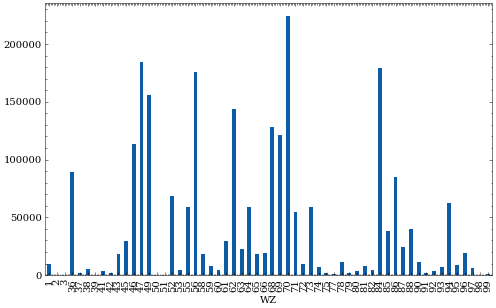

In [72]:
df_elec_cts.rename(index=region_dict).loc['Düsseldorf, Kreisfreie Stadt'].sum(level=0).plot(kind='bar', figsize=(8, (8/1.6)))#.idxmax()#

In [76]:
df_gas_cts.rename(index=region_dict).loc['Düsseldorf, Kreisfreie Stadt'].sum(level=0).idxmax() #.plot(kind='bar', figsize=(8, (8/1.6)))#.idxmax() #

84

In [61]:
df_gas_ind = spatial.disagg_applications_eff(source='gas', sector='industry', year=2018)
df_gas_cts = spatial.disagg_applications_eff(source='gas', sector='CTS', year=2018)
df_elec_cts = spatial.disagg_applications_eff(source='power', sector='CTS', year=2018)


In [19]:
# create results
df_results_power_cts = temporal.disagg_temporal_power_CTS_blp(detailed,
                                                              use_nuts3code,
                                                              year=year)
df_results_gas_cts = temporal.disagg_temporal_gas_CTS(detailed, use_nuts3code,
                                             year=year)

df_results_power_industry = temporal.disagg_temporal_industry_blp(source='power',
                                                         detailed=False,
                                                         use_nuts3code=False,
                                                         low=0.4,
                                                         no_self_gen=False,
                                                         year=year)
df_results_gas_industry = temporal.disagg_temporal_industry(source='gas',
                                                   detailed=False,
                                                   use_nuts3code=False,
                                                   low=0.4, no_self_gen=False,
                                                   year=year)

2022-04-29 21:49:57 disaggregator.temporal: INFO     Working on state: SH.
2022-04-29 21:49:57 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:07 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-04-29 21:50:07 disaggregator.temporal: INFO     Working on state: HH.
2022-04-29 21:50:07 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:14 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-04-29 21:50:14 disaggregator.temporal: INFO     Working on state: NI.
2022-04-29 21:50:14 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:21 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-04-29 21:50:21 disaggregator.temporal: INFO     Working on state: HB.
2022-04-29 21:50:21 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-04-29 21:50:28 disaggregator.temporal: INFO     ...

In [20]:
df_results_power_cts.to_csv("./data_out/Diss/04_results_lastgänge_regions_strom_cts_2018.csv")
df_results_gas_cts.to_csv("./data_out/Diss/04_results_lastgänge_regions_gas_cts_2018.csv")

df_results_power_industry.to_csv("./data_out/Diss/04_results_lastgänge_regions_strom_industry_2018.csv")
df_results_gas_industry.to_csv("./data_out/Diss/04_results_lastgänge_regions_gas_industry_2018.csv")

### Inputs

In [3]:
source='power'
sector='CTS'
year=2015

## 2. Disaggregation by application

In [13]:
df_app_cts = heat.disagg_applications(source, sector, use_nuts3code=True, year=2015)
df_app_cts.head()

WZ              1                                          \
AWB    Beleuchtung          IKT   Klimakälte Prozesskälte   
DEF01    71.273217    12.958767    25.917533     6.479383   
DEF02   317.988198    57.816036   115.632072    28.908018   
DEF03   493.429963    89.714539   179.429077    44.857269   
DEF04   937.516930   170.457624   340.915247    85.228812   
DEF05  8059.356064  1465.337466  2930.674932   732.668733   

WZ                                                                  \
AWB   Mechanische \nEnergie Prozesswärme    Raumwärme   Warmwasser   
DEF01            116.628900          0.0    12.958767    32.396917   
DEF02            520.344325          0.0    57.816036   144.540090   
DEF03            807.430849          0.0    89.714539   224.286347   
DEF04           1534.118613          0.0   170.457624   426.144059   
DEF05          13188.037196          0.0  1465.337466  3663.343666   

WZ             2             ...        98                     99              \
AWB   Beleuchtung       IKT  ... Raumwärme Warmwasser Beleuchtung         IKT   
DEF01    0.000000  0.000000  ...  0.000000   0.000000  358.141933  166.721245   
DEF02   12.745374  2.317341  ...  2.756190   2.803711    0.000000    0.000000   
DEF03   13.924187  2.531670  ...  2.925743   2.976186    0.000000    0.000000   
DEF04    0.000000  0.000000  ...  0.000000   0.000000    0.000000    0.000000   
DEF05    4.782827  0.869605  ...  0.000000   0.000000    0.000000    0.000000   

WZ                                                                           \
AWB   Klimakälte Prozesskälte Mechanische \nEnergie Prozesswärme  Raumwärme   
DEF01  21.268965    89.878531            261.402445    50.771079  39.793548   
DEF02   0.000000     0.000000              0.000000     0.000000   0.000000   
DEF03   0.000000     0.000000              0.000000     0.000000   0.000000   
DEF04   0.000000     0.000000              0.000000     0.000000   0.000000   
DEF05   0.000000     0.000000              0.000000     0.000000   0.000000   

WZ                
AWB   Warmwasser  
DEF01  40.479644  
DEF02   0.000000  
DEF03   0.000000  
DEF04   0.000000  
DEF05   0.000000  

[5 rows x 464 columns]

In [12]:
df_app_ind = heat.disagg_applications(source='gas', sector='industry', disagg_ph=True, use_nuts3code=True, year=2015)
df_app_ind.head()

WZ                       5                                            \
AWB   Mechanische \nEnergie Raumwärme Warmwasser Prozesswärme <100°C   
DEF01                   0.0       0.0        0.0                 0.0   
DEF02                   0.0       0.0        0.0                 0.0   
DEF03                   0.0       0.0        0.0                 0.0   
DEF04                   0.0       0.0        0.0                 0.0   
DEF05                   0.0       0.0        0.0                 0.0   

WZ                                                                           \
AWB   Prozesswärme 100°C-200°C Prozesswärme 200°C-500°C Prozesswärme >500°C   
DEF01                      0.0                      0.0                 0.0   
DEF02                      0.0                      0.0                 0.0   
DEF03                      0.0                      0.0                 0.0   
DEF04                      0.0                      0.0                 0.0   
DEF05                      0.0                      0.0                 0.0   

WZ                       6                            ...  \
AWB   Mechanische \nEnergie     Raumwärme Warmwasser  ...   
DEF01              0.000000      0.000000        0.0  ...   
DEF02              0.000000      0.000000        0.0  ...   
DEF03              0.000000      0.000000        0.0  ...   
DEF04              0.000000      0.000000        0.0  ...   
DEF05           6542.845206  19628.535617        0.0  ...   

WZ                          32                                               \
AWB   Prozesswärme 100°C-200°C Prozesswärme 200°C-500°C Prozesswärme >500°C   
DEF01               197.829614                68.126754                 0.0   
DEF02               446.384770               153.721908                 0.0   
DEF03              5018.024245              1728.061330                 0.0   
DEF04               568.126071               195.646064                 0.0   
DEF05               143.299656                49.348226                 0.0   

WZ                       33                                             \
AWB   Mechanische \nEnergie   Raumwärme Warmwasser Prozesswärme <100°C   
DEF01             13.657214  112.672012  10.242910           23.911429   
DEF02             77.548171  639.772413  58.161128          135.773495   
DEF03             71.291228  588.152634  53.468421          124.818665   
DEF04             30.526297  251.841952  22.894723           53.446290   
DEF05            113.952203  940.105672  85.464152          199.510686   

WZ                                                                           
AWB   Prozesswärme 100°C-200°C Prozesswärme 200°C-500°C Prozesswärme >500°C  
DEF01               153.643652                52.910397                 0.0  
DEF02               872.416926               300.434968                 0.0  
DEF03               802.026319               276.194494                 0.0  
DEF04               343.420844               118.264132                 0.0  
DEF05              1281.962281               441.470454                 0.0  

[5 rows x 203 columns]

## 3. Modellierung zukünftiger Jahre

### 3.1 Activity effect

An activity effect is modelled describing an increase of energy consumption due to increasing economic output. The projection starts in 2020 based on individual fixed growth rates of gross value added for industrial industry branches and energy reference area, driven by employment rates, in the CTS sector.

In [14]:
year=2040

In [16]:
df_future_ind_2040 = spatial.disagg_CTS_industry(source, sector, year=year) 

2022-03-21 13:33:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-21 13:33:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-21 13:33:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-21 13:33:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-21 13:33:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-21 13:33:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-21 13:33:33 disaggregator.config: INFO

2022-03-21 13:33:44 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-21 13:33:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-21 13:33:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-21 13:33:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-21 13:33:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-21 13:33:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-21 13:33:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-03-21 13:34:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [5]:
df_el_cts=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='power', sector='CTS', year=year)
    df_el_cts[year]=a[0].sum(axis=1)

2022-04-22 12:59:25 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:27 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 12:59:33 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 12:59:35 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:37 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 12:59:42 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 12:59:44 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:44 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:44 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:45 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 12:59:45 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:45 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:46 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 12:59:51 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 12:59:54 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 12:59:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 12:59:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:03 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:05 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:05 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:05 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:06 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:00:06 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:06 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:00:07 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:14 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:16 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:16 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:00:17 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:23 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:25 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:00:26 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:00:32 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:00:35 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:00:35 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:08:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:08:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:08:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:08:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:08:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:08:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 13:08:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 13:08:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:08:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:08:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:08:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:08:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 13:08:45 disaggregator.config: INFO

2022-04-22 13:08:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:08:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:08:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:08:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:08:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:08:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:09:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 13:09:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:09:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:09:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:09:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:09:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:09:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:09:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:09:21 disaggregator.config: INFO

2022-04-22 13:09:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:09:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:09:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:09:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:09:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:09:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:09:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 13:09:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:09:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:09:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:09:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:09:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:09:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:10:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:10:01 disaggregator.config: INFO

2022-04-22 13:10:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:10:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:10:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:10:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:10:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:10:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:10:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 13:10:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:10:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:10:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:10:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:10:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:10:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:10:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:10:44 disaggregator.config: INFO

2022-04-22 13:10:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:10:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:10:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:10:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:11:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:11:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:11:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 13:11:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:11:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:11:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:11:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:11:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:11:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:11:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:11:28 disaggregator.config: INFO

2022-04-22 13:11:41 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:11:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:11:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:11:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:11:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:11:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:11:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 13:12:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:12:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:12:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:12:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:12:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:12:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:12:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:12:15 disaggregator.config: INFO

2022-04-22 13:12:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:12:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:12:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:12:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:12:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:12:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:12:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 13:12:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:12:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:13:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:13:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:13:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:13:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:13:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:13:04 disaggregator.config: INFO

2022-04-22 13:13:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:13:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:13:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:13:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:13:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:13:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:13:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 13:13:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:13:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:13:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:13:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:13:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:13:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:13:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:13:53 disaggregator.config: INFO

2022-04-22 13:14:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:14:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:14:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:14:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:14:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:14:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:14:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 13:14:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:14:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:14:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:14:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:14:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:14:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:14:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:14:45 disaggregator.config: INFO

2022-04-22 13:15:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:15:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:15:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:15:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:15:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:15:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:15:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 13:15:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:15:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:15:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:15:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:15:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:15:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:15:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:15:41 disaggregator.config: INFO

2022-04-22 13:15:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:15:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:15:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:16:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:16:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:16:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:16:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 13:16:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:16:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:16:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:16:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:16:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:16:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:16:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:16:39 disaggregator.config: INFO

2022-04-22 13:16:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:16:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:16:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:16:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:17:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:17:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:17:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 13:17:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:17:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:17:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:17:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:17:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:17:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:17:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:17:37 disaggregator.config: INFO

2022-04-22 13:17:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:17:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:17:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:18:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:18:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:18:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:18:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 13:18:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:18:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:18:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:18:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:18:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:18:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:18:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:18:40 disaggregator.config: INFO

2022-04-22 13:19:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:19:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:19:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:19:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:19:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:19:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:19:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 13:19:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:19:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:19:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:19:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:19:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:19:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:19:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:19:48 disaggregator.config: INFO

2022-04-22 13:20:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:20:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:20:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:20:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:20:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:20:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:20:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 13:20:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:20:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:20:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:20:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:20:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:20:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:20:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:20:57 disaggregator.config: INFO

2022-04-22 13:21:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:21:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:21:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:21:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:21:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:21:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:21:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 13:21:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:21:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:21:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:21:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:22:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:22:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:22:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:22:02 disaggregator.config: INFO

2022-04-22 13:22:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:22:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:22:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:22:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:22:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:22:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:22:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 13:23:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:23:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:23:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:23:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:23:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:23:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:23:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:23:09 disaggregator.config: INFO

2022-04-22 13:23:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:23:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:23:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:23:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:23:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:23:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:23:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 13:24:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:24:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:24:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:24:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:24:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:24:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:24:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:24:18 disaggregator.config: INFO

2022-04-22 13:24:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:24:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:24:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:24:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:24:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:24:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:24:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 13:25:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:25:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 13:25:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:25:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:25:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:25:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:25:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:25:38 disaggregator.config: INFO

2022-04-22 13:26:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:26:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 13:26:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:26:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:26:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:26:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:26:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 13:26:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [15]:
df_el_cts.to_csv('./data_out/Diss/CTS_EL_by_year_and_WZ.csv')

In [45]:
(df_el_cts.T.sum(axis=1)/1000000).values

array([145.18973913, 145.20121173, 145.21268433, 145.22415693,
       145.23562953, 147.11644593, 148.99726234, 150.87807874,
       152.75889514, 154.63971155, 154.64346724, 154.64722599,
       154.65098475, 154.6547435 , 156.35430824, 160.41709882,
       155.9496942 , 159.98064068, 164.14123932, 164.35935603,
       164.58845613, 164.82854455, 165.07962779, 165.34171387,
       165.61481235, 165.89893436, 166.19409255, 166.50030113,
       166.81757585, 167.145934  , 167.48539444, 167.83597756,
       168.19770532, 168.57060122, 168.95469034, 169.34999932,
       169.75655635, 170.1743912 , 170.60353522, 171.04402135,
       171.49588408, 171.95915953, 172.4338854 , 172.92010099,
       173.41784721, 173.92716659, 174.44810328, 174.98070306,
       175.52501334, 176.0810832 ])

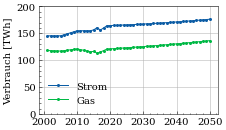

In [9]:
df_el_industry=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='power', sector='industry', year=year)
    df_el_industry[year]=a[0].sum(axis=1)

2022-04-22 13:30:53 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:30:53 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:30:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:31:01 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:03 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:03 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:04 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:31:04 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:04 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:05 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:31:11 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:13 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:13 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:15 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:20 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:22 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:31:22 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:22 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:23 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:24 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:29 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:31 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:31 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:31 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:32 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:31:32 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:32 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:32 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:38 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:40 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:40 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:41 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:45 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:47 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:31:48 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:31:53 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:31:55 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:31:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:37:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:37:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:37:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:37:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:37:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:37:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 13:37:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 13:37:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:37:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:37:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:37:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:37:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:37:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:37:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 13:37:59 disaggregator.config: INFO

2022-04-22 13:38:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:38:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:38:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:38:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:38:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:38:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 13:38:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 13:38:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:38:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:38:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:38:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:38:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:38:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:38:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 13:38:36 disaggregator.config: INFO

2022-04-22 13:38:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:38:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:38:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:38:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:38:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:38:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 13:38:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 13:39:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:39:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:39:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:39:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:39:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 13:39:15 disaggregator.config: INFO

2022-04-22 13:39:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:39:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:39:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:39:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:39:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:39:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 13:39:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 13:39:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:39:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:39:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:39:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:39:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:39:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:39:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 13:39:55 disaggregator.config: INFO

2022-04-22 13:40:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:40:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:40:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:40:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:40:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:40:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 13:40:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 13:40:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:40:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:40:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:40:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:40:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:40:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:40:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 13:40:39 disaggregator.config: INFO

2022-04-22 13:40:51 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:40:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:40:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:40:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:40:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:40:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 13:40:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 13:41:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:41:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:41:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:41:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:41:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:41:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:41:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 13:41:25 disaggregator.config: INFO

2022-04-22 13:41:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:41:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:41:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:41:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:41:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:41:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 13:41:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 13:42:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:42:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:42:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:42:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:42:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:42:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:42:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 13:42:11 disaggregator.config: INFO

2022-04-22 13:42:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:42:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:42:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:42:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:42:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:42:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 13:42:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 13:42:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:42:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:42:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:42:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:43:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:43:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:43:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 13:43:02 disaggregator.config: INFO

2022-04-22 13:43:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:43:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:43:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:43:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:43:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:43:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 13:43:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 13:43:47 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:43:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:43:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:43:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:43:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:43:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:43:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 13:43:52 disaggregator.config: INFO

2022-04-22 13:44:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:44:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:44:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:44:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:44:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:44:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 13:44:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 13:44:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:44:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:44:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:44:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:44:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:44:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:44:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 13:44:45 disaggregator.config: INFO

2022-04-22 13:45:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:45:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:45:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:45:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:45:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:45:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 13:45:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 13:45:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:45:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:45:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:45:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:45:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:45:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:45:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 13:45:38 disaggregator.config: INFO

2022-04-22 13:45:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:45:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:45:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:45:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:45:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:46:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 13:46:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 13:46:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:46:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:46:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:46:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:46:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:46:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:46:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 13:46:34 disaggregator.config: INFO

2022-04-22 13:46:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:46:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:46:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:46:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:46:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:46:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 13:46:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 13:47:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:47:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:47:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:47:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:47:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:47:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:47:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 13:47:32 disaggregator.config: INFO

2022-04-22 13:47:51 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:47:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:47:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:47:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:47:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:47:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 13:47:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 13:48:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:48:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:48:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:48:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:48:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:48:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:48:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 13:48:32 disaggregator.config: INFO

2022-04-22 13:48:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:48:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:48:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:48:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:48:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:48:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 13:48:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 13:49:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:49:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:49:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:49:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:49:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:49:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:49:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 13:49:35 disaggregator.config: INFO

2022-04-22 13:49:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:49:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:49:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:49:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:49:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:50:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 13:50:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 13:50:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:50:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:50:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:50:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:50:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:50:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:50:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 13:50:39 disaggregator.config: INFO

2022-04-22 13:51:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:51:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:51:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:51:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:51:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:51:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 13:51:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 13:51:44 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:51:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:51:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:51:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:51:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:51:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:51:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 13:51:49 disaggregator.config: INFO

2022-04-22 13:52:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:52:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:52:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:52:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:52:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:52:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 13:52:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 13:52:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:52:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:52:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:52:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:52:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:52:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:52:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 13:52:59 disaggregator.config: INFO

2022-04-22 13:53:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:53:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:53:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:53:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:53:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:53:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 13:53:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 13:54:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:54:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 13:54:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 13:54:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 13:54:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 13:54:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 13:54:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 13:54:09 disaggregator.config: INFO

2022-04-22 13:54:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 13:54:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 13:54:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 13:54:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 13:54:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 13:54:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 13:54:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 13:55:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [16]:
df_el_industry.to_csv('./data_out/Diss/industry_EL_by_year_and_WZ.csv')

In [10]:
df_gas_industry=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='gas', sector='industry', year=year)
    df_gas_industry[year]=a[0].sum(axis=1)

2022-04-22 13:55:18 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:20 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:55:26 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:28 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:28 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:30 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 13:55:36 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:38 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:38 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:40 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:55:46 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:48 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:48 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:49 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:55:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:55:58 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:55:58 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:55:59 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:56:05 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:56:07 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:07 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:07 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:08 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 13:56:08 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:08 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:56:08 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:56:14 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:56:17 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 13:56:17 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 13:56:23 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 13:56:25 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:56:25 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:25 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 13:56:26 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:02:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:02:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:02:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:02:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:02:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:02:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 14:02:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 14:02:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:02:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:02:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:02:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:02:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:02:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:02:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 14:02:51 disaggregator.config: INFO

2022-04-22 14:02:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:03:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:03:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:03:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:03:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:03:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:03:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 14:03:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:03:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:03:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:03:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:03:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:03:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:03:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:03:28 disaggregator.config: INFO

2022-04-22 14:03:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:03:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:03:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:03:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:03:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:03:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:03:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 14:04:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:04:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:04:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:04:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:04:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:04:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:04:07 disaggregator.config: INFO

2022-04-22 14:04:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:04:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:04:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:04:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:04:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:04:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 14:04:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:04:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:04:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:04:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:04:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:04:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:04:48 disaggregator.config: INFO

2022-04-22 14:04:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:04:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:05:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:05:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:05:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:05:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:05:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 14:05:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:05:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:05:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:05:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:05:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:05:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:05:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:05:32 disaggregator.config: INFO

2022-04-22 14:05:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:05:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:05:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:05:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:05:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:05:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:05:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 14:06:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:06:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:06:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:06:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:06:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:06:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:06:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:06:16 disaggregator.config: INFO

2022-04-22 14:06:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:06:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:06:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:06:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:06:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:06:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:06:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 14:06:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:06:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:06:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:07:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:07:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:07:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:07:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:07:03 disaggregator.config: INFO

2022-04-22 14:07:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:07:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:07:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:07:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:07:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:07:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:07:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 14:07:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:07:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:07:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:07:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:07:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:07:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:07:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:07:53 disaggregator.config: INFO

2022-04-22 14:08:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:08:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:08:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:08:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:08:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:08:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:08:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 14:08:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:08:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:08:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:08:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:08:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:08:44 disaggregator.config: INFO

2022-04-22 14:08:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:08:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:09:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:09:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:09:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:09:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:09:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 14:09:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:09:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:09:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:09:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:09:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:09:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:09:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:09:36 disaggregator.config: INFO

2022-04-22 14:09:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:09:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:09:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:09:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:09:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:09:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:09:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 14:10:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:10:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:10:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:10:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:10:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:10:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:10:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:10:32 disaggregator.config: INFO

2022-04-22 14:10:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:10:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:10:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:10:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:10:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:10:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:10:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 14:11:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:11:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:11:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:11:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:11:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:11:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:11:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:11:29 disaggregator.config: INFO

2022-04-22 14:11:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:11:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:11:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:11:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:11:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:11:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:11:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 14:12:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:12:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:12:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:12:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:12:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:12:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:12:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:12:28 disaggregator.config: INFO

2022-04-22 14:12:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:12:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:12:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:12:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:12:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:12:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:12:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 14:13:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:13:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:13:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:13:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:13:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:13:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:13:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:13:30 disaggregator.config: INFO

2022-04-22 14:13:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:13:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:13:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:13:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:13:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:13:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:13:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 14:14:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:14:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:14:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:14:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:14:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:14:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:14:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:14:33 disaggregator.config: INFO

2022-04-22 14:14:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:14:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:14:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:14:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:14:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:14:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:14:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 14:15:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:15:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:15:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:15:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:15:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:15:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:15:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:15:38 disaggregator.config: INFO

2022-04-22 14:15:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:15:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:16:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:16:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:16:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:16:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:16:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 14:16:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:16:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:16:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:16:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:16:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:16:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:16:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:16:45 disaggregator.config: INFO

2022-04-22 14:17:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:17:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:17:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:17:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:17:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:17:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:17:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 14:17:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:17:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:17:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:17:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:17:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:17:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:17:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:17:56 disaggregator.config: INFO

2022-04-22 14:18:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:18:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:18:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:18:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:18:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:18:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:18:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 14:19:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:19:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 14:19:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:19:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:19:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:19:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:19:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:19:08 disaggregator.config: INFO

2022-04-22 14:19:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:19:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 14:19:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:19:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:19:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:19:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:19:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 14:20:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [17]:
df_gas_industry.to_csv('./data_out/Diss/industry_GAS_by_year_and_WZ.csv')

In [11]:
df_gas_cts=pd.DataFrame()
for year in range(2001,2051):
    a = spatial.disagg_CTS_industry(source='gas', sector='CTS', year=year)
    df_gas_cts[year]=a[0].sum(axis=1)

2022-04-22 14:20:17 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     The following data was missing for the requested year: 2001
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:17 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:19 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 14:20:25 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:27 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     The following data was missing for the requested year: 2002
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:27 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:29 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


Regional energy consumption of 2003 was used for calibration 
of industrial energy consumption.


2022-04-22 14:20:34 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:36 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     The following data was missing for the requested year: 2003
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:36 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:38 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:20:43 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:46 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     The following data was missing for the requested year: 2004
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:46 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:47 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:20:52 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:20:54 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:54 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:54 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:55 disaggregator.data: INFO     The following data was missing for the requested year: 2005
2022-04-22 14:20:55 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:20:55 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:20:55 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:21:01 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:21:03 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     The following data was missing for the requested year: 2006
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:03 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:21:04 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:21:08 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:21:10 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:10 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:10 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:11 disaggregator.data: INFO     The following data was missing for the requested year: 2007
2022-04-22 14:21:11 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:11 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:21:11 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-04-22 14:21:16 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!


2022-04-22 14:21:18 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     The following data was missing for the requested year: 2008
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 50 and energy carrier: 18 with 18 = electricity and 12 = gas.
2022-04-22 14:21:18 disaggregator.data: INFO     WZ: 51 and energy carrier: 18 with 18 = electrici

2022-04-22 14:26:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:26:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:26:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:26:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:26:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:26:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-04-22 14:26:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-04-22 14:27:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:27:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:27:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:27:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:27:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:27:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:27:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-04-22 14:27:15 disaggregator.config: INFO

2022-04-22 14:27:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:27:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:27:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:27:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:27:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:27:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-04-22 14:27:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-04-22 14:27:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:27:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:27:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:27:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:27:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:27:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:27:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-04-22 14:27:51 disaggregator.config: INFO

2022-04-22 14:28:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:28:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:28:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:28:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:28:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:28:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-04-22 14:28:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-04-22 14:28:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:28:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:28:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:28:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:28:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:28:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:28:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-04-22 14:28:29 disaggregator.config: INFO

2022-04-22 14:28:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:28:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:28:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:28:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:28:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:28:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-04-22 14:28:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-04-22 14:29:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:29:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:29:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:29:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:29:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:29:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:29:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-04-22 14:29:08 disaggregator.config: INFO

2022-04-22 14:29:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:29:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:29:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:29:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:29:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:29:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-04-22 14:29:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-04-22 14:29:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:29:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:29:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:29:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:29:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:29:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:29:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-04-22 14:29:50 disaggregator.config: INFO

2022-04-22 14:30:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:30:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:30:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:30:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:30:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:30:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-04-22 14:30:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-04-22 14:30:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:30:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:30:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:30:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:30:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-04-22 14:30:37 disaggregator.config: INFO

2022-04-22 14:30:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:30:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:30:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:30:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:30:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:30:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-04-22 14:30:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-04-22 14:31:18 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:31:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:31:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:31:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:31:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:31:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:31:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-04-22 14:31:23 disaggregator.config: INFO

2022-04-22 14:31:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:31:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:31:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:31:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:31:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:31:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-04-22 14:31:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-04-22 14:32:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:32:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:32:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:32:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:32:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:32:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:32:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-04-22 14:32:12 disaggregator.config: INFO

2022-04-22 14:32:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:32:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:32:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:32:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:32:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:32:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-04-22 14:32:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-04-22 14:32:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:32:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:32:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:32:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:33:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:33:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:33:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-04-22 14:33:02 disaggregator.config: INFO

2022-04-22 14:33:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:33:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:33:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:33:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:33:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:33:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-04-22 14:33:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-04-22 14:33:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:33:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:33:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:33:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:33:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:33:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:33:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-04-22 14:33:54 disaggregator.config: INFO

2022-04-22 14:34:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:34:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:34:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:34:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:34:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:34:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-04-22 14:34:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-04-22 14:34:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:34:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:34:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:34:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:34:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:34:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:34:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-04-22 14:34:47 disaggregator.config: INFO

2022-04-22 14:35:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:35:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:35:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:35:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:35:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:35:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-04-22 14:35:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-04-22 14:35:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:35:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:35:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:35:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:35:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:35:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:35:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-04-22 14:35:45 disaggregator.config: INFO

2022-04-22 14:36:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:36:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:36:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:36:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:36:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:36:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-04-22 14:36:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-04-22 14:36:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:36:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:36:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:36:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:36:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:36:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:36:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-04-22 14:36:43 disaggregator.config: INFO

2022-04-22 14:37:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:37:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:37:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:37:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:37:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:37:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-04-22 14:37:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-04-22 14:37:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:37:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:37:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:37:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:37:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:37:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:37:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-04-22 14:37:45 disaggregator.config: INFO

2022-04-22 14:38:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:38:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:38:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:38:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:38:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:38:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-04-22 14:38:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-04-22 14:38:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:38:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:38:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:38:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:38:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:38:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:38:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-04-22 14:38:48 disaggregator.config: INFO

2022-04-22 14:39:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:39:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:39:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:39:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:39:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:39:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-04-22 14:39:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-04-22 14:39:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:39:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:39:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:39:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:39:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:39:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:39:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-04-22 14:39:54 disaggregator.config: INFO

2022-04-22 14:40:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:40:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:40:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:40:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:40:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:40:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-04-22 14:40:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-04-22 14:40:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:40:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:40:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:40:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:40:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:40:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:41:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-04-22 14:41:00 disaggregator.config: INFO

2022-04-22 14:41:21 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:41:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:41:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:41:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:41:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:41:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-04-22 14:41:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-04-22 14:42:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:42:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:42:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:42:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:42:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:42:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:42:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-04-22 14:42:09 disaggregator.config: INFO

2022-04-22 14:42:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:42:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:42:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:42:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:42:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:42:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-04-22 14:42:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-04-22 14:43:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:43:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-04-22 14:43:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-04-22 14:43:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-04-22 14:43:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-04-22 14:43:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-04-22 14:43:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-04-22 14:43:20 disaggregator.config: INFO

2022-04-22 14:43:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-04-22 14:43:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-04-22 14:43:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-04-22 14:43:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-04-22 14:43:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-04-22 14:43:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-04-22 14:43:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-04-22 14:44:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [18]:
df_gas_cts.to_csv('./data_out/Diss/cts_GAS_by_year_and_WZ.csv')

#### driver

<AxesSubplot:xlabel='year'>

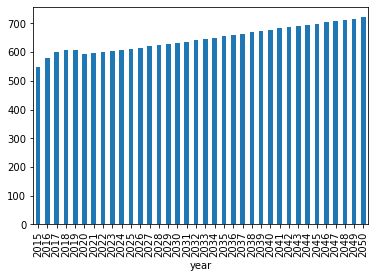

In [28]:
# industry: Gross value added in Bil. (de: Mrd.) EUR
df_driver_industry, df_driver_cts = data.read_activity_drivers()
(df_driver_industry.sum(axis=1)/1000000).plot(kind='bar')

<AxesSubplot:xlabel='year'>

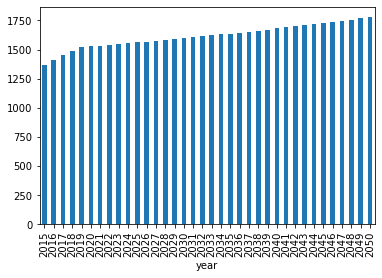

In [32]:
# industry: Energy reference area in Mio. m², driven by employment rates
(df_driver_cts.sum(axis=1)/1000000).plot(kind='bar')

### 3.2 Efficiency effect

Efficiency is added to the activity effect and has a decreasing effect on energy consumption. Fixed energy efficiency improvement rates are defined up to 2035. After 2035 the rates are halved.

In [69]:
eff_rate_el_CTS = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_el_cts").set_index('until year'))
eff_rate_el_industry = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_el_industry").set_index('until year'))
eff_rate_gas_CTS = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_gas_cts").set_index('until year'))
eff_rate_gas_industry = (pd.read_excel(config.data_in('temporal', 'Efficiency_Enhancement_Rates_Applications.xlsx'), sheet_name="eff_enhance_gas_industry").set_index('until year'))

In [71]:
eff_rate_el_CTS

Beleuchtung     IKT  Klimakälte  Prozesskälte  \
until year                                                  
2035              0.030  0.0050      -0.004        0.0170   
2050              0.015  0.0025      -0.002        0.0085   

            Mechanische \nEnergie  Prozesswärme  Raumwärme  Warmwasser  
until year                                                              
2035                       0.0330         0.002      0.012       0.012  
2050                       0.0165         0.001      0.006       0.006

test

In [135]:
df_industry_app_eff_gas=spatial.disagg_applications_eff(source='gas', sector='industry', disagg_ph=True, year=2015).sum()

<AxesSubplot:xlabel='WZ'>

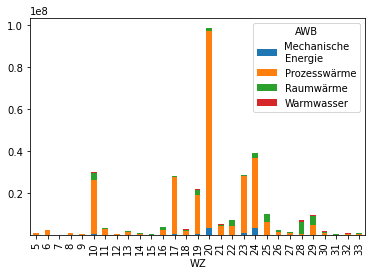

In [160]:
df_industry_app_eff_gas.unstack().plot(kind='bar', stacked=True)

In [224]:
df_industry_app_eff_gas=pd.DataFrame()
for year in range(2018,2051):
    df_industry_app_eff_gas[year]=spatial.disagg_applications_eff(source='gas', sector='industry', disagg_ph=True, year=year).sum()

2022-03-22 19:56:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 19:56:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 19:56:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-03-22 19:56:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 19:56:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-03-22 19:56:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 19:56:35 di

2022-03-22 20:00:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:00:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:00:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:00:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:00:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:00:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-03-22 20:00:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-03-22 20:00:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:00:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:00:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:00:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:00:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:00:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:00:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 20:00:38 disaggregator.config: INFO

2022-03-22 20:00:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:00:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:00:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:00:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:00:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:00:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:00:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-03-22 20:01:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:01:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:01:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:01:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:01:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:01:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:01:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:01:09 disaggregator.config: INFO

2022-03-22 20:01:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:01:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:01:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:01:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:01:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:01:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:01:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-03-22 20:01:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:01:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:01:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:01:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:01:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:01:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:01:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:01:41 disaggregator.config: INFO

2022-03-22 20:01:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:01:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:01:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:01:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:01:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:01:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:01:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-03-22 20:02:12 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:02:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:02:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:02:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:02:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:02:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:02:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:02:16 disaggregator.config: INFO

2022-03-22 20:02:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:02:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:02:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:02:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:02:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:02:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:02:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 20:02:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:02:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:02:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:02:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:02:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:02:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:02:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:02:53 disaggregator.config: INFO

2022-03-22 20:03:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:03:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:03:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:03:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:03:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:03:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:03:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-03-22 20:03:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:03:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:03:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:03:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:03:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:03:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:03:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:03:31 disaggregator.config: INFO

2022-03-22 20:03:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:03:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:03:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:03:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:03:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:03:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:03:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-03-22 20:04:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:04:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:04:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:04:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:04:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:04:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:04:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:04:10 disaggregator.config: INFO

2022-03-22 20:04:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:04:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:04:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:04:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:04:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:04:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:04:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-03-22 20:04:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:04:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:04:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:04:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:04:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:04:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:04:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:04:50 disaggregator.config: INFO

2022-03-22 20:05:02 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:05:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:05:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:05:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:05:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:05:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:05:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-03-22 20:05:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:05:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:05:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:05:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:05:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:05:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:05:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:05:34 disaggregator.config: INFO

2022-03-22 20:05:46 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:05:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:05:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:05:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:05:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:05:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:05:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-03-22 20:06:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:06:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:06:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:06:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:06:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:06:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:06:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:06:19 disaggregator.config: INFO

2022-03-22 20:06:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:06:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:06:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:06:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:06:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:06:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:06:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-03-22 20:07:01 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:07:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:07:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:07:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:07:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:07:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:07:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:07:05 disaggregator.config: INFO

2022-03-22 20:07:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:07:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:07:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:07:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:07:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:07:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:07:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-03-22 20:07:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:07:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:07:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:07:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:07:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:07:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:07:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:07:53 disaggregator.config: INFO

2022-03-22 20:08:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:08:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:08:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:08:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:08:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:08:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:08:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-03-22 20:08:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:08:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:08:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:08:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:08:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:08:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:08:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:08:44 disaggregator.config: INFO

2022-03-22 20:08:59 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:08:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:09:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:09:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:09:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:09:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:09:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-03-22 20:09:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:09:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:09:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:09:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:09:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:09:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:09:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:09:36 disaggregator.config: INFO

2022-03-22 20:09:51 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:09:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:09:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:09:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:09:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:09:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:09:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-03-22 20:10:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:10:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:10:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:10:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:10:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:10:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:10:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:10:28 disaggregator.config: INFO

2022-03-22 20:10:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:10:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:10:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:10:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:10:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:10:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:10:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-03-22 20:11:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:11:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:11:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:11:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:11:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:11:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:11:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:11:24 disaggregator.config: INFO

2022-03-22 20:11:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:11:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:11:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:11:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:11:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:11:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:11:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-03-22 20:12:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:12:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:12:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:12:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:12:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:12:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:12:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:12:20 disaggregator.config: INFO

2022-03-22 20:12:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:12:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:12:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:12:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:12:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:12:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:12:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-03-22 20:13:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:13:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 20:13:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:13:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:13:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:13:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:13:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:13:19 disaggregator.config: INFO

2022-03-22 20:13:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:13:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 20:13:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:13:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:13:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:13:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:13:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-03-22 20:14:16 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:14:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-03-22 20:14:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 20:14:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:14:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:14:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:14:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:14:20 disaggregator.config: INFO

2022-03-22 20:14:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:14:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-03-22 20:14:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 20:14:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:14:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:14:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:14:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-03-22 20:15:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [225]:
df_cts_app_eff_gas=pd.DataFrame()
for year in range(2018,2051):
    df_cts_app_eff_gas[year]=spatial.disagg_applications_eff(source='gas', sector='CTS', disagg_ph=True, year=year).sum()

2022-03-22 20:15:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 20:15:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 20:15:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-03-22 20:15:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 20:15:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-03-22 20:15:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 20:15:35 di

2022-03-22 20:19:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:19:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:19:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:19:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:19:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:19:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-03-22 20:19:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-03-22 20:19:29 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:19:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:19:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:19:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:19:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:19:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:19:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 20:19:34 disaggregator.config: INFO

2022-03-22 20:19:41 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:19:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:19:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:19:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:19:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:19:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:19:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-03-22 20:20:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:20:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:20:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:20:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:20:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:20:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:20:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:20:05 disaggregator.config: INFO

2022-03-22 20:20:12 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:20:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:20:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:20:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:20:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:20:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:20:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-03-22 20:20:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:20:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:20:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:20:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:20:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:20:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:20:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:20:37 disaggregator.config: INFO

2022-03-22 20:20:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:20:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:20:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:20:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:20:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:20:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:20:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-03-22 20:21:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:21:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:21:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:21:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:21:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:21:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:21:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:21:11 disaggregator.config: INFO

2022-03-22 20:21:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:21:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:21:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:21:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:21:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:21:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:21:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 20:21:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:21:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:21:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:21:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:21:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:21:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:21:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:21:46 disaggregator.config: INFO

2022-03-22 20:21:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:21:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:21:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:21:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:21:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:22:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:22:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-03-22 20:22:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:22:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:22:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:22:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:22:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:22:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:22:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:22:23 disaggregator.config: INFO

2022-03-22 20:22:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:22:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:22:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:22:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:22:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:22:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:22:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-03-22 20:22:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:22:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:22:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:23:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:23:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:23:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:23:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:23:02 disaggregator.config: INFO

2022-03-22 20:23:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:23:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:23:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:23:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:23:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:23:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:23:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-03-22 20:23:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:23:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:23:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:23:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:23:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:23:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:23:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:23:44 disaggregator.config: INFO

2022-03-22 20:23:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:23:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:23:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:23:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:23:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:24:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:24:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-03-22 20:24:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:24:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:24:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:24:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:24:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:24:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:24:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:24:27 disaggregator.config: INFO

2022-03-22 20:24:39 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:24:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:24:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:24:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:24:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:24:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:24:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-03-22 20:25:07 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:25:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:25:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:25:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:25:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:25:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:25:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:25:12 disaggregator.config: INFO

2022-03-22 20:25:24 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:25:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:25:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:25:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:25:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:25:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:25:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-03-22 20:25:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:25:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:25:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:25:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:25:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:25:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:25:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:25:58 disaggregator.config: INFO

2022-03-22 20:26:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:26:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:26:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:26:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:26:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:26:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:26:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-03-22 20:26:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:26:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:26:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:26:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:26:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:26:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:26:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:26:46 disaggregator.config: INFO

2022-03-22 20:27:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:27:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:27:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:27:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:27:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:27:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:27:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-03-22 20:27:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:27:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:27:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:27:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:27:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:27:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:27:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:27:36 disaggregator.config: INFO

2022-03-22 20:27:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:27:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:27:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:27:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:27:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:27:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:27:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-03-22 20:28:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:28:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:28:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:28:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:28:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:28:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:28:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:28:29 disaggregator.config: INFO

2022-03-22 20:28:44 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:28:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:28:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:28:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:28:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:28:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:28:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-03-22 20:29:18 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:29:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:29:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:29:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:29:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:29:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:29:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:29:23 disaggregator.config: INFO

2022-03-22 20:29:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:29:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:29:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:29:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:29:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:29:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:29:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-03-22 20:30:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:30:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:30:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:30:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:30:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:30:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:30:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:30:18 disaggregator.config: INFO

2022-03-22 20:30:34 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:30:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:30:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:30:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:30:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:30:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-03-22 20:31:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:31:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:31:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:31:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:31:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:31:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:31:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:31:14 disaggregator.config: INFO

2022-03-22 20:31:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:31:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:31:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:31:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:31:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:31:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:31:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-03-22 20:32:08 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:32:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 20:32:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:32:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:32:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:32:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:32:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:32:13 disaggregator.config: INFO

2022-03-22 20:32:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:32:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 20:32:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:32:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:32:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:32:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:32:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-03-22 20:33:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:33:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-03-22 20:33:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 20:33:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:33:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:33:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:33:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:33:13 disaggregator.config: INFO

2022-03-22 20:33:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:33:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-03-22 20:33:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 20:33:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:33:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:33:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:33:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-03-22 20:34:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [226]:
df_industry_app_eff_el=pd.DataFrame()
for year in range(2018,2051):
    df_industry_app_eff_el[year]=spatial.disagg_applications_eff(source='power', sector='industry', disagg_ph=True, year=year).sum()

2022-03-22 20:34:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 20:34:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 20:34:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-03-22 20:34:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 20:34:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-03-22 20:34:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 20:34:29 di

2022-03-22 20:38:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:38:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:38:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:38:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:38:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:38:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-03-22 20:38:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-03-22 20:38:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:38:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:38:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:38:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:38:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:38:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:38:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 20:38:26 disaggregator.config: INFO

2022-03-22 20:38:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:38:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:38:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:38:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:38:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:38:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:38:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-03-22 20:38:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:38:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:38:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:38:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:38:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:38:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:38:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:38:58 disaggregator.config: INFO

2022-03-22 20:39:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:39:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:39:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:39:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:39:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:39:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:39:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-03-22 20:39:26 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:39:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:39:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:39:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:39:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:39:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:39:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:39:30 disaggregator.config: INFO

2022-03-22 20:39:38 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:39:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:39:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:39:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:39:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:39:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:39:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-03-22 20:40:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:40:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:40:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:40:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:40:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:40:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:40:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:40:05 disaggregator.config: INFO

2022-03-22 20:40:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:40:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:40:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:40:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:40:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:40:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:40:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 20:40:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:40:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:40:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:40:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:40:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:40:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:40:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:40:41 disaggregator.config: INFO

2022-03-22 20:40:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:40:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:40:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:40:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:40:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:40:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:40:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-03-22 20:41:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:41:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:41:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:41:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:41:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:41:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:41:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:41:18 disaggregator.config: INFO

2022-03-22 20:41:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:41:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:41:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:41:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:41:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:41:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:41:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-03-22 20:41:54 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:41:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:41:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:41:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:41:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:41:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:41:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:41:58 disaggregator.config: INFO

2022-03-22 20:42:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:42:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:42:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:42:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:42:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:42:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:42:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-03-22 20:42:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:42:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:42:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:42:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:42:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:42:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:42:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:42:40 disaggregator.config: INFO

2022-03-22 20:42:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:42:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:42:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:42:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:42:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:42:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:42:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-03-22 20:43:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:43:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:43:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:43:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:43:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:43:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:43:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:43:25 disaggregator.config: INFO

2022-03-22 20:43:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:43:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:43:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:43:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:43:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:43:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:43:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-03-22 20:44:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:44:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:44:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:44:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:44:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:44:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:44:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:44:10 disaggregator.config: INFO

2022-03-22 20:44:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:44:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:44:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:44:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:44:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:44:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 20:44:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-03-22 20:44:52 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:44:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:44:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:44:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:44:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:44:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:44:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:44:57 disaggregator.config: INFO

2022-03-22 20:45:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:45:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:45:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:45:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:45:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:45:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 20:45:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-03-22 20:45:40 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:45:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:45:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:45:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:45:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:45:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:45:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 20:45:44 disaggregator.config: INFO

2022-03-22 20:45:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:45:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:46:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:46:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:46:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:46:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 20:46:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-03-22 20:46:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:46:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:46:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:46:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:46:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:46:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:46:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 20:46:35 disaggregator.config: INFO

2022-03-22 20:46:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:46:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:46:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:46:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:46:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:46:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 20:46:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-03-22 20:47:23 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:47:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:47:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:47:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:47:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:47:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:47:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 20:47:27 disaggregator.config: INFO

2022-03-22 20:47:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:47:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:47:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:47:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:47:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:47:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 20:47:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-03-22 20:48:17 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:48:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:48:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:48:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:48:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:48:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:48:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 20:48:21 disaggregator.config: INFO

2022-03-22 20:48:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:48:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:48:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:48:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:48:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:48:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 20:48:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-03-22 20:49:10 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:49:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:49:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:49:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:49:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:49:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:49:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 20:49:15 disaggregator.config: INFO

2022-03-22 20:49:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:49:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:49:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:49:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:49:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:49:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 20:49:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-03-22 20:50:05 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:50:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:50:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:50:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:50:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:50:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:50:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 20:50:09 disaggregator.config: INFO

2022-03-22 20:50:25 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:50:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:50:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:50:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:50:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:50:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 20:50:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-03-22 20:51:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:51:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 20:51:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:51:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:51:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:51:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:51:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 20:51:05 disaggregator.config: INFO

2022-03-22 20:51:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:51:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 20:51:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:51:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:51:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:51:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 20:51:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-03-22 20:51:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:51:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-03-22 20:51:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 20:52:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 20:52:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 20:52:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 20:52:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 20:52:02 disaggregator.config: INFO

2022-03-22 20:52:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:52:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-03-22 20:52:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 20:52:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 20:52:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 20:52:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 20:52:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-03-22 20:52:58 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [227]:
df_cts_app_eff_el=pd.DataFrame()
for year in range(2018,2051):
    df_cts_app_eff_el[year]=spatial.disagg_applications_eff(source='power', sector='CTS', disagg_ph=True, year=year).sum()

2022-03-22 20:52:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 20:53:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 20:53:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
2022-03-22 20:53:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 20:53:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2019&&value=gt.0.0
2022-03-22 20:53:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 20:53:16 di

2022-03-22 20:56:48 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:56:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:56:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:56:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:56:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:56:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.0
2022-03-22 20:56:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2026&&value=gt.0.

2022-03-22 20:57:06 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:57:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:57:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:57:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:57:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:57:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:57:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 20:57:11 disaggregator.config: INFO

2022-03-22 20:57:18 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:57:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:57:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:57:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:57:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:57:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.0
2022-03-22 20:57:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2027&&value=gt.0.

2022-03-22 20:57:36 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:57:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:57:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:57:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:57:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:57:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:57:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 20:57:41 disaggregator.config: INFO

2022-03-22 20:57:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:57:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:57:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:57:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:57:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:57:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.0
2022-03-22 20:57:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2028&&value=gt.0.

2022-03-22 20:58:09 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:58:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:58:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:58:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:58:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:58:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:58:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 20:58:13 disaggregator.config: INFO

2022-03-22 20:58:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:58:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:58:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:58:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:58:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:58:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.0
2022-03-22 20:58:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2029&&value=gt.0.

2022-03-22 20:58:43 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:58:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:58:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:58:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:58:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:58:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:58:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 20:58:47 disaggregator.config: INFO

2022-03-22 20:58:56 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:58:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:58:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:58:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:58:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:59:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 20:59:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 20:59:18 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:59:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:59:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:59:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:59:21 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 20:59:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 20:59:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 20:59:23 disaggregator.config: INFO

2022-03-22 20:59:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:59:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 20:59:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 20:59:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 20:59:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 20:59:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 20:59:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.

2022-03-22 20:59:55 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 20:59:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 20:59:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 20:59:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 20:59:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 20:59:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 21:00:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 21:00:00 disaggregator.config: INFO

2022-03-22 21:00:11 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:00:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 21:00:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 21:00:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 21:00:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 21:00:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 21:00:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.

2022-03-22 21:00:35 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:00:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 21:00:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 21:00:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 21:00:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 21:00:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 21:00:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 21:00:39 disaggregator.config: INFO

2022-03-22 21:00:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:00:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 21:00:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 21:00:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 21:00:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 21:00:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 21:00:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.

2022-03-22 21:01:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:01:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 21:01:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 21:01:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 21:01:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 21:01:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 21:01:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 21:01:20 disaggregator.config: INFO

2022-03-22 21:01:31 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:01:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 21:01:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 21:01:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 21:01:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 21:01:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 21:01:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.

2022-03-22 21:01:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:01:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 21:01:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 21:01:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 21:01:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 21:02:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 21:02:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 21:02:01 disaggregator.config: INFO

2022-03-22 21:02:14 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:02:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 21:02:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 21:02:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 21:02:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 21:02:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.0
2022-03-22 21:02:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.

2022-03-22 21:02:42 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:02:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 21:02:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 21:02:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 21:02:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 21:02:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 21:02:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2036&&value=gt.0.0
2022-03-22 21:02:47 disaggregator.config: INFO

2022-03-22 21:03:00 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:03:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 21:03:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 21:03:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 21:03:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 21:03:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.0
2022-03-22 21:03:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2036&&value=gt.0.

2022-03-22 21:03:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:03:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 21:03:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 21:03:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 21:03:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 21:03:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 21:03:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2037&&value=gt.0.0
2022-03-22 21:03:33 disaggregator.config: INFO

2022-03-22 21:03:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:03:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 21:03:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 21:03:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 21:03:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 21:03:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.0
2022-03-22 21:03:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2037&&value=gt.0.

2022-03-22 21:04:15 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:04:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 21:04:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 21:04:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 21:04:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 21:04:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 21:04:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2038&&value=gt.0.0
2022-03-22 21:04:20 disaggregator.config: INFO

2022-03-22 21:04:33 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:04:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 21:04:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 21:04:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 21:04:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 21:04:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.0
2022-03-22 21:04:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2038&&value=gt.0.

2022-03-22 21:05:03 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:05:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 21:05:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 21:05:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 21:05:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 21:05:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 21:05:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2039&&value=gt.0.0
2022-03-22 21:05:08 disaggregator.config: INFO

2022-03-22 21:05:22 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:05:22 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 21:05:23 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 21:05:24 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 21:05:25 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 21:05:26 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.0
2022-03-22 21:05:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2039&&value=gt.0.

2022-03-22 21:05:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:05:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 21:05:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 21:05:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 21:05:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 21:05:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 21:05:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2040&&value=gt.0.0
2022-03-22 21:05:58 disaggregator.config: INFO

2022-03-22 21:06:12 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:06:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 21:06:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 21:06:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 21:06:16 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 21:06:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.0
2022-03-22 21:06:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2040&&value=gt.0.

2022-03-22 21:06:45 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:06:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 21:06:46 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 21:06:47 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 21:06:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 21:06:48 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 21:06:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2041&&value=gt.0.0
2022-03-22 21:06:49 disaggregator.config: INFO

2022-03-22 21:07:04 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:07:05 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 21:07:06 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 21:07:07 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 21:07:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 21:07:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.0
2022-03-22 21:07:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2041&&value=gt.0.

2022-03-22 21:07:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:07:38 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 21:07:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 21:07:39 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 21:07:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 21:07:40 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 21:07:41 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2042&&value=gt.0.0
2022-03-22 21:07:42 disaggregator.config: INFO

2022-03-22 21:07:57 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:07:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 21:07:59 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 21:08:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 21:08:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 21:08:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.0
2022-03-22 21:08:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2042&&value=gt.0.

2022-03-22 21:08:32 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:08:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 21:08:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 21:08:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 21:08:34 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 21:08:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 21:08:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2043&&value=gt.0.0
2022-03-22 21:08:36 disaggregator.config: INFO

2022-03-22 21:08:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:08:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 21:08:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 21:08:55 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 21:08:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 21:08:57 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.0
2022-03-22 21:08:58 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2043&&value=gt.0.

2022-03-22 21:09:28 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:09:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 21:09:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 21:09:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 21:09:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 21:09:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 21:09:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2044&&value=gt.0.0
2022-03-22 21:09:33 disaggregator.config: INFO

2022-03-22 21:09:50 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:09:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 21:09:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 21:09:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 21:09:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 21:09:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.0
2022-03-22 21:09:56 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2044&&value=gt.0.

2022-03-22 21:10:26 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:10:27 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2050&&value=gt.0.0
2022-03-22 21:10:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2049&&value=gt.0.0
2022-03-22 21:10:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2048&&value=gt.0.0
2022-03-22 21:10:29 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2047&&value=gt.0.0
2022-03-22 21:10:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2046&&value=gt.0.0
2022-03-22 21:10:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2045&&value=gt.0.0
2022-03-22 21:10:31 disaggregator.config: INFO

2022-03-22 21:10:49 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 21:10:49 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2050&&value=gt.0.0
2022-03-22 21:10:50 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2049&&value=gt.0.0
2022-03-22 21:10:51 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2048&&value=gt.0.0
2022-03-22 21:10:52 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2047&&value=gt.0.0
2022-03-22 21:10:53 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2046&&value=gt.0.0
2022-03-22 21:10:54 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2045&&value=gt.0.

2022-03-22 21:11:27 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


individual years

In [189]:
df_cts_app_eff_el=spatial.disagg_applications_eff(source='power', sector='CTS', year=2035, use_nuts3code=True)

2022-03-22 10:25:00 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 10:25:01 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 10:25:02 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 10:25:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 10:25:03 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 10:25:04 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 10:25:05 disaggregator.config: INFO

2022-03-22 10:25:13 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 10:25:14 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 10:25:15 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 10:25:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 10:25:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 10:25:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 10:25:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 10:25:37 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [200]:
df_cts_app_eff_el.groupby(by='AWB', axis=1, level=[1]).sum().sum()*3.6/1000000


AWB
Beleuchtung              129.576920
IKT                       91.733600
Klimakälte                13.911286
Mechanische \nEnergie     90.289434
Prozesskälte              30.337528
Prozesswärme              25.097382
Raumwärme                 24.909180
Warmwasser                17.606138
dtype: float64

In [192]:
df_cts_app_eff_gas=spatial.disagg_applications_eff(source='gas', sector='CTS', year=2035, use_nuts3code=True)

2022-03-22 10:30:17 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2035&&value=gt.0.0
2022-03-22 10:30:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2034&&value=gt.0.0
2022-03-22 10:30:18 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2033&&value=gt.0.0
2022-03-22 10:30:19 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2032&&value=gt.0.0
2022-03-22 10:30:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2031&&value=gt.0.0
2022-03-22 10:30:20 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 10:30:21 disaggregator.config: INFO

2022-03-22 10:30:30 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


2022-03-22 10:30:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2035&&value=gt.0.0
2022-03-22 10:30:31 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2034&&value=gt.0.0
2022-03-22 10:30:32 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2033&&value=gt.0.0
2022-03-22 10:30:33 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2032&&value=gt.0.0
2022-03-22 10:30:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2031&&value=gt.0.0
2022-03-22 10:30:36 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2030&&value=gt.0.

2022-03-22 10:30:53 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


In [205]:
df_industry_app_eff_el=spatial.disagg_applications_eff(source='power', sector='industry', year=2030, use_nuts3code=True)

2022-03-22 10:47:08 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 10:47:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 10:47:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 10:47:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 10:47:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2026&&value=gt.0.0
2022-03-22 10:47:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2025&&value=gt.0.0
2022-03-22 10:47:12 disaggregator.config: INFO

In [206]:
df_industry_app_eff_el.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()/1000000


196.75377219236236

In [204]:
df_industry_app_eff_el.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()/1000000


186.35827366509776

In [218]:
df_industry_app_eff_gas_false=spatial.disagg_applications_eff(source='gas', sector='industry', year=2030, use_nuts3code=True, disagg_ph=True, no_self_gen=False)


2022-03-22 11:09:42 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 11:09:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 11:09:43 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 11:09:44 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 11:09:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2026&&value=gt.0.0
2022-03-22 11:09:45 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2025&&value=gt.0.0
2022-03-22 11:09:46 disaggregator.config: INFO

In [219]:
df_industry_app_eff_gas_false.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()/1000000


290.3597978055346

In [216]:
df_industry_app_eff_gas=spatial.disagg_applications_eff(source='gas', sector='industry', year=2030, use_nuts3code=True, disagg_ph=True,no_self_gen=True)


2022-03-22 11:09:09 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2030&&value=gt.0.0
2022-03-22 11:09:10 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2029&&value=gt.0.0
2022-03-22 11:09:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2028&&value=gt.0.0
2022-03-22 11:09:11 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2027&&value=gt.0.0
2022-03-22 11:09:12 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2026&&value=gt.0.0
2022-03-22 11:09:13 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2025&&value=gt.0.0
2022-03-22 11:09:13 disaggregator.config: INFO

In [220]:
df_industry_app_eff_gas.groupby(by='AWB', axis=1, level=[1]).sum().sum().sum()*3.6/1000000


1045.2952720999247

### 3.3 Effect of changing regional employment

In [102]:
df_emp_short={}
for year in [2005, 2015, 2025, 2035, 2045]:
    df_emp_short[year] = data.employees_per_branch(region_code='natcode_nuts3', year=year)#.sum(axis=1)

2022-03-21 17:28:14 disaggregator.data: WARNING  Number of employees was taken from 2008, as there is no earlier data available!
2022-03-21 17:28:19 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.
2022-03-21 17:28:20 disaggregator.data: WARNING  A year higher than 2030 was chosen. Last available employee data from database was used from 2030 andprojected based on employee data from "activity_drivers" in data_in.


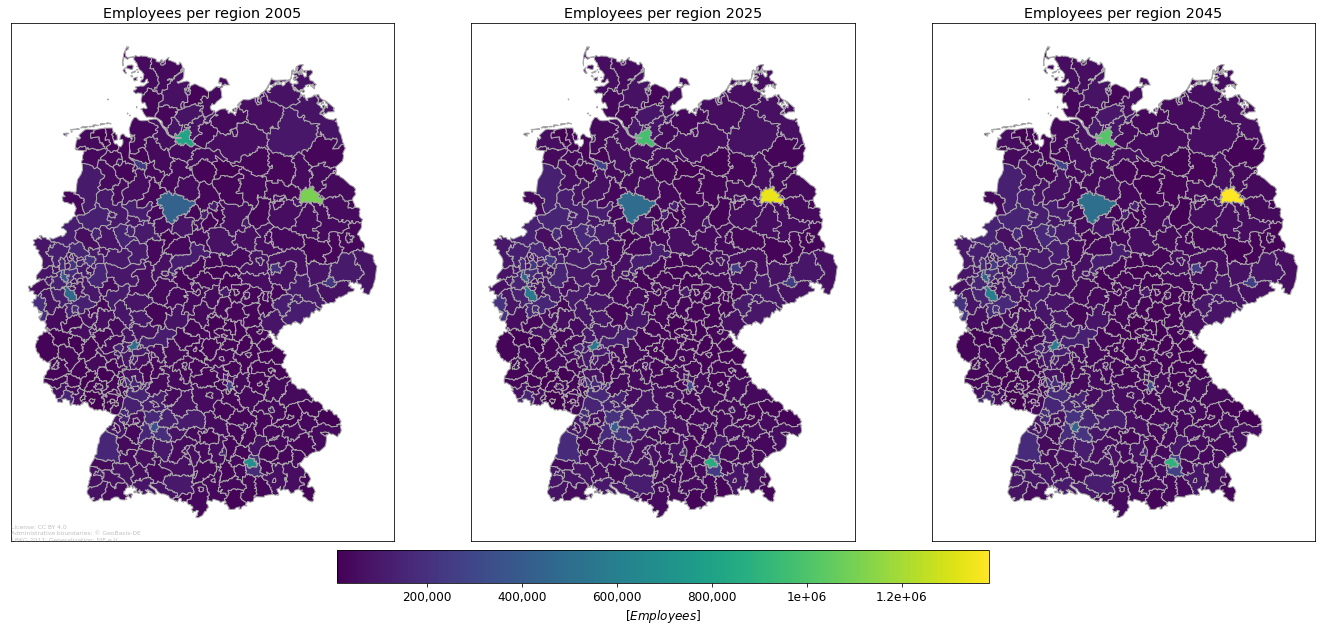

In [134]:
test = pd.concat([df_emp_short[2005].sum(), df_emp_short[2025].sum(), df_emp_short[2045].sum()], axis=1, keys=['2005', '2025', '2045'])
fig, ax = plot.choropleth_map(test, relative=False, unit='Employees', axtitle='Employees per region',
                              add_percentages=False, figsize=(20,20))

In [229]:
# idee: drop berlin, münchen und hamburg
test.drop(['DE300', 'DE212', 'DE600'])

2005           2025           2045
region_code                                             
DE111        350207.703258  414585.060658  434425.053100
DE112        156623.000000  175435.266795  182528.853756
DE113        185815.000000  212362.438573  218845.974108
DE114         79626.000000   85624.185316   85344.952891
DE115        170881.000000  204314.084761  212898.939211
...                    ...            ...            ...
DEG0K         31127.000000   24620.301739   21851.568366
DEG0L         29155.000000   23145.483028   20042.502261
DEG0M         27657.000000   21430.716737   18659.634551
DEG0N         22815.000000   20759.289809   20444.159973
DEG0P         39453.000000   33693.982860   30095.206349

[398 rows x 3 columns]

<AxesSubplot:>

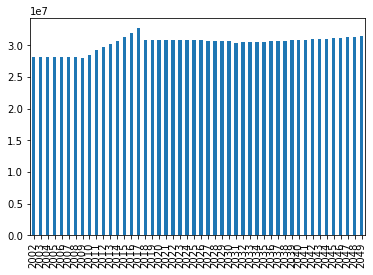

In [85]:
df_emp.sum().plot(kind='bar')

### 3.4 Usage of heat pumps for application "space heating" an energy carrier "electricity"

In [ ]:
# electric appliances used for space heating are modelled as heat pumps
df_temp_cts_HP_2018 = heat.disagg_temporal_applications_hp(source='power', sector='CTS', use_blp=True, use_hp=True, year=2018)

In [228]:
df_temp_cts_HP_2018_detailed = heat.disagg_temporal_applications_hp(source='power', sector='CTS', use_blp=True, use_hp=True, detailed=True, state='MV',year=2018)

2022-03-22 21:11:28 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:30 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:35 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:37 disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/v_demandregio_spatial_lk401?id_spatial=eq.15&&year=eq.2018&&value=gt.0.0
2022-03-22 21:11:42 disaggregator.temporal: INFO     Working on state: MV.
2022-03-22 21:11:42 disaggregator.temporal: INFO     ... creating state-specific load-profiles
2022-03-22 21:11:48 disaggregator.temporal: INFO     ... assigning load-profiles to WZs
2022-03-22 21:11:48 disaggregator.temporal: INFO     Start downloading BLP from Database n

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


2022-03-22 21:23:44 disaggregator.data: INFO     Dropping old NUTS-v2013 regions.


KeyError: ('13003', '1')

In [ ]:
df_temp_industry_HP_2018 = heat.disagg_temporal_applications_hp(source='power', sector='industry', use_blp=True, use_hp=True, year=2018)

In [ ]:
df_temp_industry_HP_2018_detailed = heat.disagg_temporal_applications_hp(source='power', sector='industry', detailed=True, use_blp=True, use_hp=True, state='MV',year=2018)

### 3.5 Fuel switch effect

In [ ]:
year=2035

In [ ]:
# Determines yearly gas demand per branch and NUTS-3 for heat applications that will be replaced by a different fuel in the future. Fuel is specified by parameter 'switch_to'.
df_fs_cts_to_power=heat.sector_fuel_switch_fom_gas(sector='CTS', switch_to='power', year=year)

In [ ]:
# Determines yearly gas demand per branch and NUTS-3 for heat applications that will be replaced by a different fuel in the future. Fuel is specified by parameter 'switch_to'.
df_fs_industry_to_power=heat.sector_fuel_switch_fom_gas(sector='industry', switch_to='power', year=year)

In [ ]:
# Determines yearly gas demand per branch and NUTS-3 for heat applications that will be replaced by a different fuel in the future. Fuel is specified by parameter 'switch_to'.
df_fs_industry_to_h2=heat.sector_fuel_switch_fom_gas(sector='industry', switch_to='hydrogen', year=year)

In [ ]:
# Determines yearly gas demand per branch and NUTS-3 for heat applications that will be replaced by a different fuel in the future. Fuel is specified by parameter 'switch_to'.
df_fs_cts_to_h2=heat.sector_fuel_switch_fom_gas(sector='CTS', switch_to='hydrogen', year=year)

temporal disaggregation

In [ ]:
temporal_df_fs_cts_to_power = heat.disagg_temporal_cts_fuel_switch(df_fs_cts_to_power, state='MV', year=year)

In [ ]:
temporal_df_fs_industry_to_power = heat.disagg_temporal_industry_fuel_switch(df_fs_industry_to_power, state='MV', year=year)

In [ ]:
temporal_df_fs_industry_to_h2 = heat.disagg_temporal_industry_fuel_switch(df_fs_industry_to_h2, state='MV', year=year)

In [ ]:
temporal_df_fs_cts_to_h2 = heat.disagg_temporal_cts_fuel_switch(df_fs_cts_to_h2, state='MV', year=year)

heat pump

In [ ]:
hp_temporal_df_fs_cts_to_power = heat.temporal_cts_elec_load_from_fuel_switch(temporal_df_fs_cts_to_power)

In [ ]:
hp_temporal_df_fs_industry_to_power = heat.temporal_industry_elec_load_from_fuel_switch(temporal_df_fs_industry_to_power)

#### Base year
- By setting the `base year` in the `config.yaml`, you define the year on which the spatial and temporal functions operate
- some functions are not affected, e. g. ``generate_specific_consumption_per_branch()`` because it makes use of particular publications from these years

#### Region Codes
Since different statistics and publications use different notations for region codes, we compiled a dictionary that can be used to transform the different codes.
- The function ``config.dict_region_code()`` returns a dictionary with conversions of different kinds of region denotation, if ``raw = False``
- the dictionary can convert between the following designations ``ags_lk``, ``id_ags``, ``id_ags_lk``, ``id_nuts3``, ``id_t_nuts3_lk``, ``name``, ``natcode_nuts3``

In [3]:
config.dict_region_code(raw=True).head()

id_t_nuts3_lk  id_nuts3 natcode_nuts3                 name  id_ags_lk  \
idx                                                                          
0                5  27600005         DEF05         Dithmarschen          5   
1                6  27600006         DEF06  Herzogtum Lauenburg          6   
2              312  27600314         DE278             Günzburg        314   
3                7  27600007         DEF07        Nordfriesland          7   
4                8  27600008         DEF08          Ostholstein          8   

     ags_lk   id_ags  ags_bl                  bl  
idx                                               
0      1051  1051000       1  Schleswig-Holstein  
1      1053  1053000       1  Schleswig-Holstein  
2      9774  9774000       9              Bayern  
3      1054  1054000       1  Schleswig-Holstein  
4      1055  1055000       1  Schleswig-Holstein

## 2. Spatial Functions

The spatial functions perform the task to calculate energy demand per district and branch. Therefore, a specific energy consumption in `MWh/employee` is calculated per branch and district using information from the database. The functions that perform this task are called `generate_specific_consumption_per_branch()` and `generate_specific_consumption_per_branch_and_district()`. Their ouput is also saved in the folder `data_in`.
Subsequently, the specific consumption is multiplied with the number of employees in each branch and district. This is done by the function `disagg_CTS_industry()`. This function also calls the aforementioned functions, if the folder `data_in` does not contain the respective output.

The function `spatial.disagg_CTS_industry()` requires at least two arguments:

1. ``source`` is the source of energy and must be one of ``['power', 'gas']``.  
2. ``sector`` is the sector whose energy consumption is to be disaggregated and must be one of ``['CTS', 'industry']``.


Additionally, you can use NUTS-3 codes instead of the AGS ('Amtlicher Gemeindeschlüssel'), through setting ``use_nuts3code=True``.

Also you can choose to disaggregate solely the 

    - electricity consumption obtained from the grid (when 'source' = 'power')
    - gas consumption without consumption for self-generation of electricity (when 'source' = 'gas')
by setting ``no_self_gen=True``.

The function returns a DataFrame with absolute gas or electricity consumption per branch and district for the sectors CTS or industry in **MWh** for the ``base year`` (see ``config.yaml``)
It uses files "../data_in/regional/specific_`source`_consumption.csv", with ``source`` being in [``power``, ``gas``], if file does not exist, the function ``generate_specific_consumption_per_branch_and_district()`` is called

Let's start with ``power`` for both ``CTS`` and ``industry``:

### 2.1 Electricity Consumption in [MWh/a]

In [6]:
ec_CTS, no_self_gen_elec, no_self_gen_gas = spatial.disagg_CTS_industry(sector='CTS', source='power', use_nuts3code=True)
ec_CTS.head()

<AxesSubplot:>

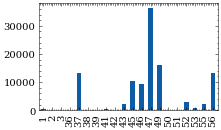

In [23]:
w_in=8
w=w_in/2.5
ec_CTS.iloc[0:20,0].plot(kind='bar', figsize=(w,(w/1.618)))

In [5]:
ec_industry = spatial.disagg_CTS_industry(sector='industry', source='power', use_nuts3code=True)
ec_industry.head()

DEF01       DEF02  DEF03       DEF04         DEF05       DEF06  \
WZ                                                                   
5     0.0    0.000000    0.0    0.000000      0.000000    0.000000   
6     0.0    0.000000    0.0    0.000000  64028.621347    0.000000   
7     0.0    0.000000    0.0    0.000000      0.000000    0.000000   
8     0.0  799.468351    0.0  884.541758   5589.280455  252.606841   
9     0.0    0.000000    0.0    0.000000      0.000000    0.000000   

         DEF07        DEF08        DEF09       DEF0A  ...        DEG0D  \
WZ                                                    ...                
5     0.000000     0.000000     0.000000    0.000000  ...     0.000000   
6     0.000000     0.000000     0.000000    0.000000  ...     0.000000   
7     0.000000     0.000000     0.000000    0.000000  ...     0.000000   
8   277.299339  1739.770532  1303.873588  310.712952  ...  1004.861678   
9     0.000000     0.000000     0.000000    0.000000  ...     0.000000   

         DEG0E         DEG0F      DEG0G        DEG0H        DEG0I       DEG0J  \
WZ                                                                              
5     0.000000  40775.665514    0.00000     0.000000     0.000000    0.000000   
6     0.000000      0.000000    0.00000     0.000000     0.000000    0.000000   
7     0.000000      0.000000    0.00000     0.000000     0.000000    0.000000   
8   170.607931   1111.383146  560.19884  2036.655707  4170.059958  116.866387   
9     0.000000      0.000000    0.00000     0.000000  6160.882210    0.000000   

          DEG0K       DEG0L        DEG0M  
WZ                                        
5      0.000000    0.000000     0.000000  
6      0.000000    0.000000     0.000000  
7      0.000000    0.000000     0.000000  
8   2114.613266  295.400193  3738.518695  
9      0.000000  436.426769  1702.012462  

[5 rows x 401 columns]

Plot your result using functions from the plot module:

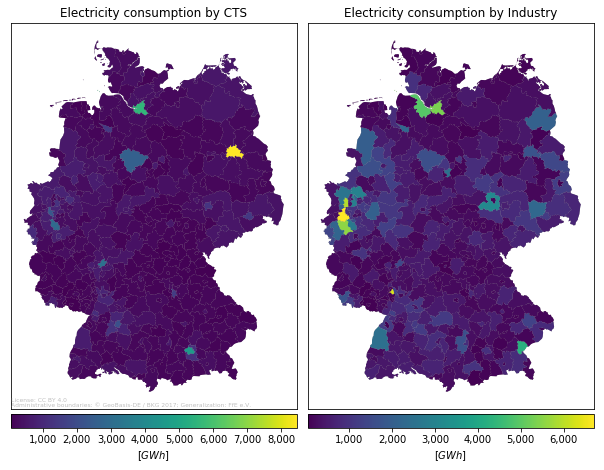

In [6]:
ec_combined = pd.concat([ec_CTS.sum()/1000, ec_industry.sum()/1000], keys=['CTS', 'Industry'], axis=1, join='inner')
fig, ax = plot.choropleth_map(ec_combined, relative=False, unit='GWh', axtitle='Electricity consumption by', 
                              colorbar_each_subplot=True,  add_percentages=False)

Let's continue with ``gas`` for both ``CTS`` and ``industry``:

### 2.2 Gas Consumption in [MWh/a]


In [3]:
gc_CTS = spatial.disagg_CTS_industry(sector='CTS', source='gas', use_nuts3code=True)
gc_CTS.head()

DEF01       DEF02       DEF03        DEF04        DEF05        DEF06  \
WZ                                                                             
1   87.573336  390.711808  606.276944  1151.926194  9902.523420  4404.234567   
2    0.000000    0.069842    0.076301     0.000000     0.026209     1.362178   
3    0.000000    0.000000    0.161582     0.000000     0.390674     0.015608   
36   0.000000   17.289317    0.000000     0.000000     0.000000     8.370139   
37  51.732842    6.320802    0.000000    32.559983     8.940401    77.997911   

          DEF07        DEF08         DEF09        DEF0A  ...        DEG0D  \
WZ                                                       ...                
1   8009.592073  5894.359179  13371.774823  4634.650417  ...  7558.252570   
2      0.011306     0.118691      0.095143     0.610412  ...     0.027975   
3      0.689007     0.156270      0.053217     0.106548  ...     0.000000   
36     3.574893     5.965509     10.721606     0.000000  ...     8.845956   
37    33.812290     9.645752     46.143840    14.301104  ...    14.303205   

          DEG0E        DEG0F        DEG0G        DEG0H        DEG0I  \
WZ                                                                    
1   4448.109715  3122.790783  5806.785842  1219.290299  4708.750933   
2      0.407139     0.386747     0.150352     1.773025     0.322162   
3      0.005475     0.014026     0.000000     0.000000     0.065905   
36     2.935934     7.521533     5.013432    41.180715    23.932307   
37     0.000000    12.161718    23.793834    11.384100    10.644610   

          DEG0J        DEG0K        DEG0L        DEG0M  
WZ                                                      
1   8764.070048  9249.091603  6320.034734  4991.680173  
2      0.034633     0.746059     0.280162     0.000000  
3      0.022015     0.049722     0.000000     0.000000  
36     2.677587     6.576253    16.060556    14.851708  
37     5.906989    10.633276     0.000000    18.727394  

[5 rows x 401 columns]

In [4]:
gc_industry = spatial.disagg_CTS_industry(sector='industry', source='gas', use_nuts3code=True)
gc_industry.head()

DEF01       DEF02  DEF03       DEF04          DEF05       DEF06  \
WZ                                                                    
5     0.0    0.000000    0.0    0.000000       0.000000    0.000000   
6     0.0    0.000000    0.0    0.000000  319868.112447    0.000000   
7     0.0    0.000000    0.0    0.000000       0.000000    0.000000   
8     0.0  506.715499    0.0  923.958266    3178.338699  245.312126   
9     0.0    0.000000    0.0    0.000000       0.000000    0.000000   

         DEF07       DEF08        DEF09       DEF0A  ...       DEG0D  \
WZ                                                   ...               
5     0.000000     0.00000     0.000000    0.000000  ...    0.000000   
6     0.000000     0.00000     0.000000    0.000000  ...    0.000000   
7     0.000000     0.00000     0.000000    0.000000  ...    0.000000   
8   123.002679  1225.16812  1200.564287  137.824077  ...  379.670555   
9     0.000000     0.00000     0.000000    0.000000  ...    0.000000   

        DEG0E       DEG0F       DEG0G        DEG0H        DEG0I     DEG0J  \
WZ                                                                          
5    0.000000  1168.55946    0.000000     0.000000     0.000000   0.00000   
6    0.000000     0.00000    0.000000     0.000000     0.000000   0.00000   
7    0.000000     0.00000    0.000000     0.000000     0.000000   0.00000   
8   86.046387   419.91795  211.661972  1358.739189   803.309318  78.47474   
9    0.000000     0.00000    0.000000     0.000000  1403.927383   0.00000   

         DEG0K       DEG0L        DEG0M  
WZ                                       
5     0.000000    0.000000     0.000000  
6     0.000000    0.000000     0.000000  
7     0.000000    0.000000     0.000000  
8   697.343615  199.548426  1412.538161  
9     0.000000  294.814550   643.077579  

[5 rows x 401 columns]

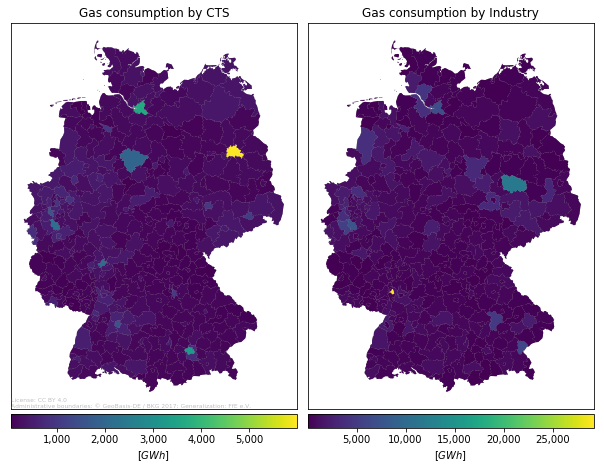

In [5]:
gc_combined = pd.concat([gc_CTS.sum()/1000, gc_industry.sum()/1000], keys=['CTS', 'Industry'], axis=1, join='inner')
fig, ax = plot.choropleth_map(gc_combined, relative=False, unit='GWh', axtitle='Gas consumption by', 
                              colorbar_each_subplot=True,  add_percentages=False)

Now save this figure e.g. as PDF file:

In [6]:
from disaggregator.config import data_out
fig.savefig(data_out('disagg_gas.pdf'), bbox_inches='tight')

### 2.3 Functions that work in the background

#### Function ``generate_specific_consumption_per_branch_and_district()``

The function `generate_specific_consumption_per_branch_and_district()` returns specific power and gas consumption per branch and district and requires at least two arguments:

1. ``iterations_power`` is the number of iterations for specific power consumption and must be a positiv integer (8 is recommended).  
2. ``iterations_gas`` is the number of iterations for specific gas consumption and must be a positiv integer (8 is recommended).


Additionally, you can choose to generate solely the specific electricity consumption obtained from the grid and the specific gas consumption without consumption for self-generation of electricity by setting ``no_self_gen=True``.

In [2]:
spec_ec_district, spec_gc_district = data.generate_specific_consumption_per_branch_and_district(8,8)

In [4]:
spec_ec_district.head()

1001        1002        1003        1004         1051        1053   \
1   21.431806   21.431806   21.431806   21.431806    21.431806   21.431806   
2    6.047879    6.047879    6.047879    6.047879     6.047879    6.047879   
3   47.561125   47.561125   47.561125   47.561125    47.561125   47.561125   
5  167.180743  238.494784  138.232790  144.713079  1001.644188  155.656725   
6   76.647782  109.343313   63.375940   66.346975   459.226368   71.364336   

        1054        1055        1056        1057   ...       16068  \
1   21.431806   21.431806   21.431806   21.431806  ...   21.431806   
2    6.047879    6.047879    6.047879    6.047879  ...    6.047879   
3   47.561125   47.561125   47.561125   47.561125  ...   47.561125   
5  400.074771  252.001533  235.649094  400.074771  ...  400.074771   
6  183.423302  115.535786  108.038642  183.423302  ...  183.423302   

        16069       16070       16071       16072       16073       16074  \
1   21.431806   21.431806   21.431806   21.431806   21.431806   21.431806   
2    6.047879    6.047879    6.047879    6.047879    6.047879    6.047879   
3   47.561125   47.561125   47.561125   47.561125   47.561125   47.561125   
5  299.714927  400.074771  400.074771  400.074771  898.696747  225.113494   
6  137.411068  183.423302  183.423302  183.423302  412.027792  103.208358   

        16075       16076       16077  
1   21.431806   21.431806   21.431806  
2    6.047879    6.047879    6.047879  
3   47.561125   47.561125   47.561125  
5  458.380276  223.771238  400.074771  
6  210.154776  102.592971  183.423302  

[5 rows x 401 columns]

#### Function ``generate_specific_consumption_per_branch()``
This function is the basis for ``generate_specific_consumption_per_branch_and_district()`` and doesn't take any arguments. It returns multiple dataframes which you can see in the demonstation below.

The values are based on the publication [Umweltökonomische Gesamtrechnung, 2017](https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Umwelt/Publikationen/Umweltnutzung-Wirtschaft/umweltnutzung-und-wirtschaft-energie-pdf-5850014.html) for 2015, which is also available from the DemandRegio database (table_id = 71, with some industry branches (WZ) being grouped together and with ET = 12 for gas and ET = 18 for electricity)

In [9]:
[df_spez_ec, df_spez_gc, df_abs_consumption, df_emp, 
 df_f_sv_no_self_gen, df_f_gv_no_self_gen] = data.generate_specific_consumption_per_branch()

In [13]:
## specific electricity consumption for every branch
df_spez_ec.head()

spez. SV
1   21.431806
2    6.047879
3   47.561125
5  362.567391
6  194.389774

In [14]:
## absolute consumption as in "Umweltökonomischer Gesamtrechnung" for the year 2015, in Database dimension='spatial', table_id=71,
df_abs_consumption.head()

value  WZ  ET
idx                      
5    4.912033e+07  20  18
13   2.965345e+06  21  12
16   4.305735e+05  21  18
26   6.722733e+06  22  12
29   1.524831e+07  22  18

In [15]:
## employees by branch and district
df_emp.head()

ags  1001       1002       1003   1004         1051        1053        1054   \
WZ                                                                             
1     13.0  58.000000  90.000000  171.0  1470.000000  653.795456  1189.00000   
2      0.0   8.238066   9.000000    0.0     3.091415  160.673202     1.33352   
3      0.0   0.000000  22.747843    0.0    55.000000    2.197390    97.00000   
5      0.0   0.000000   0.000000    0.0     0.000000    0.000000     0.00000   
6      0.0   0.000000   0.000000    0.0   139.427145    0.000000     0.00000   

ags  1055         1056   1057   ...        16068       16069       16070  \
WZ                              ...                                        
1    875.0  1985.000000  688.0  ...  1122.000000  660.308590  463.568957   
2     14.0    11.222433   72.0  ...     3.299752   48.023294   45.618046   
3     22.0     7.492031   15.0  ...     0.000000    0.770763    1.974607   
5      0.0     0.000000    0.0  ...     0.000000    0.000000  101.920112   
6      0.0     0.000000    0.0  ...     0.000000    0.000000    0.000000   

ags       16071       16072      16073        16074   16075       16076  16077  
WZ                                                                              
1    862.000000  181.000000  699.00000  1301.000000  1373.0  938.190264  741.0  
2     17.734525  209.133881   38.00000     4.085042    88.0   33.045953    0.0  
3      0.000000    0.000000    9.27825     3.099355     7.0    0.000000    0.0  
5      0.000000    0.000000    0.00000     0.000000     0.0    0.000000    0.0  
6      0.000000    0.000000    0.00000     0.000000     0.0    0.000000    0.0  

[5 rows x 401 columns]

In [17]:
# dataframes contain factors for calculating specific electricity consumption solely obtained from the grid
# and specific gas consumption without consumption for self-generation of electricity (this is needed when no_self_gen = True)
df_f_sv_no_self_gen.head()

1    1.000000
2    1.000000
3    1.000000
5    0.853051
6    0.803576
Name: Strom Netzbezug, dtype: float64

In [18]:
df_f_gv_no_self_gen.head()

1    1.000000
2    1.000000
3    1.000000
5    0.160950
6    0.955144
Name: f_GV_WZ_no_self_gen, dtype: float64

## 3. Temporal Functions

The temporal functions perform the task to calculate energy demand time series per district and branch. Therefore, the output from the `spatial` functions is needed. 

Furthermore, normalized load time series are generated for every branch and district. The CTS load time series for power and gas are standard load profiles, the industry time series represent typical working shifts in the respective branch, with a low load level for non-working hours and a high load level for working hours. 9 different load profiles have been defined for industry representing 1-, 2- and 3-shift operation on 5, 6 and 7 days per week. Important functions, that fulfill the tasks in the background are `shift_load_profile_generator()`, `CTS_power_slp_generator()` as well as `t_allo()`, `h_value()`, `gas_slp_weekday_params` and `disagg_daily_gas_slp`.

The results of these functions are brought together in 3 functions:
- `disagg_temporal_power_CTS()` for the results on CTS for power
- `disagg_temporal_gas_CTS()` for the results on CTS for gas
- `disagg_temporal_industry()` for the results on industry for gas and power

Each of these 3 function has a boolean argument `detailed` which is set on `False` by default. If `detailed` is put on `True` the function will return a multi-index-DataFrame() which contains a time series per branch AND district. If set on `False` it will only contain aggregated time series per district.

### 3.1 CTS electricity consumption [MWh/15min]
#### 3.1.1 Disaggregate using **standard load profiles**: Function ``disagg_temporal_power_CTS()``
- Disagreggate spatial data of CTS' **power** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- takes two optional arguments:
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions `disagg_CTS('power')` , `CTS_power_slp_generator` and information from `config.py`

In [2]:
df_CTS = temporal.disagg_temporal_power_CTS(detailed=False, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [3]:
df_CTS.head()

DEF01     DEF02     DEF03     DEF04     DEF05  \
2015-01-01 00:00:00  3.115564  8.379840  6.026278  2.727286  3.642590   
2015-01-01 00:15:00  3.272524  8.954310  6.343744  2.895361  3.784762   
2015-01-01 00:30:00  3.185879  8.686477  6.161881  2.814476  3.678429   
2015-01-01 00:45:00  3.109915  8.458016  6.000229  2.743821  3.586475   
2015-01-01 01:00:00  3.053411  8.291141  5.875231  2.690501  3.515937   

                        DEF06     DEF07     DEF08     DEF09     DEF0A  ...  \
2015-01-01 00:00:00  3.686675  5.439147  5.122272  6.617861  2.154296  ...   
2015-01-01 00:15:00  3.837316  5.734542  5.401852  6.876733  2.259250  ...   
2015-01-01 00:30:00  3.743681  5.513620  5.203116  6.684633  2.182117  ...   
2015-01-01 00:45:00  3.662532  5.309586  5.017806  6.517762  2.113354  ...   
2015-01-01 01:00:00  3.602490  5.136775  4.859782  6.390216  2.057655  ...   

                        DEG0D     DEG0E     DEG0F     DEG0G     DEG0H  \
2015-01-01 00:00:00  1.834572  1.247310  2.339211  1.945665  1.869235   
2015-01-01 00:15:00  1.873499  1.275523  2.423719  1.999271  1.934031   
2015-01-01 00:30:00  1.829904  1.242645  2.365671  1.948543  1.907598   
2015-01-01 00:45:00  1.794044  1.214799  2.316215  1.905113  1.886801   
2015-01-01 01:00:00  1.768597  1.194038  2.280938  1.872580  1.875832   

                        DEG0I     DEG0J     DEG0K     DEG0L     DEG0M  
2015-01-01 00:00:00  2.747839  2.046323  2.031765  2.400117  2.177006  
2015-01-01 00:15:00  2.857229  2.091217  2.073656  2.464980  2.240333  
2015-01-01 00:30:00  2.791247  2.037906  2.015934  2.411546  2.193227  
2015-01-01 00:45:00  2.735422  1.993336  1.967264  2.367216  2.154155  
2015-01-01 01:00:00  2.695362  1.960433  1.930250  2.336541  2.127334  

[5 rows x 401 columns]

In [6]:
# export your data using
df_CTS.to_csv(data_out('CTS_Power_2015_MWh.csv'))

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F6B848BA8>]],
       dtype=object))

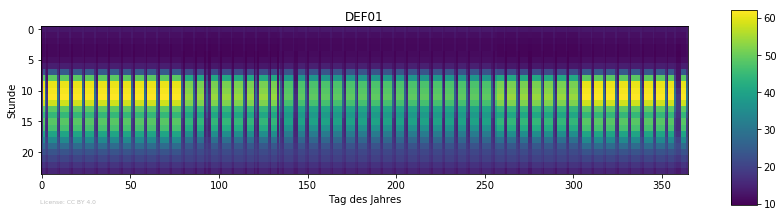

In [7]:
# or plot your data using
plot.heatmap_timeseries(df_CTS['DEF01'].resample('H').sum(), unit = 'MWh')

#### or use detailed version of the function

In [7]:
df_CTS_detail = temporal.disagg_temporal_power_CTS(detailed=True, use_nuts3code=True)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [8]:
# filter your results using multiindex
df_lk_DEF01 = df_CTS_detail.loc[:, 'DEF01']
df_lk_DEF01.head()

WZ                         1    2         81   3    36        37        38  \
2015-01-01 00:00:00  0.005035  0.0  0.011680  0.0  0.0  0.279572  0.003571   
2015-01-01 00:15:00  0.004757  0.0  0.011033  0.0  0.0  0.285756  0.003650   
2015-01-01 00:30:00  0.004597  0.0  0.010662  0.0  0.0  0.287383  0.003671   
2015-01-01 00:45:00  0.004478  0.0  0.010387  0.0  0.0  0.289661  0.003700   
2015-01-01 01:00:00  0.004388  0.0  0.010177  0.0  0.0  0.293241  0.003746   

WZ                    39        49            50  ...        91        55  \
2015-01-01 00:00:00  0.0  0.343933  7.841506e-07  ...  0.004717  0.038908   
2015-01-01 00:15:00  0.0  0.351541  8.014951e-07  ...  0.005062  0.042482   
2015-01-01 00:30:00  0.0  0.353543  8.060594e-07  ...  0.004885  0.039600   
2015-01-01 00:45:00  0.0  0.356345  8.124494e-07  ...  0.004717  0.036660   
2015-01-01 01:00:00  0.0  0.360750  8.224909e-07  ...  0.004565  0.033836   

WZ                         56        87        92        93        88  \
2015-01-01 00:00:00  0.221993  0.084544  0.011768  0.027650  0.141953   
2015-01-01 00:15:00  0.242383  0.092309  0.012849  0.030189  0.169684   
2015-01-01 00:30:00  0.225939  0.086047  0.011977  0.028141  0.157273   
2015-01-01 00:45:00  0.209166  0.079659  0.011088  0.026052  0.145443   
2015-01-01 01:00:00  0.193051  0.073522  0.010234  0.024045  0.134002   

WZ                         97   98        94  
2015-01-01 00:00:00  0.004224  0.0  0.066772  
2015-01-01 00:15:00  0.005050  0.0  0.098344  
2015-01-01 00:30:00  0.004680  0.0  0.089323  
2015-01-01 00:45:00  0.004328  0.0  0.081774  
2015-01-01 01:00:00  0.003988  0.0  0.075891  

[5 rows x 58 columns]

In [9]:
# use DataFrame.reorder_levels to filter for CTS branches
df_wz_81 = df_CTS_detail.reorder_levels([1,0], axis=1).loc[:,81]
df_wz_81.head()

LK                      DEF01     DEF02     DEF03     DEF04     DEF05  \
2015-01-01 00:00:00  0.011680  0.048792  0.056588  0.006384  0.007781   
2015-01-01 00:15:00  0.011033  0.046093  0.053458  0.006031  0.007351   
2015-01-01 00:30:00  0.010662  0.044541  0.051657  0.005828  0.007103   
2015-01-01 00:45:00  0.010387  0.043393  0.050327  0.005678  0.006920   
2015-01-01 01:00:00  0.010177  0.042516  0.049309  0.005563  0.006781   

LK                      DEF06     DEF07     DEF08     DEF09     DEF0A  ...  \
2015-01-01 00:00:00  0.012692  0.016063  0.018931  0.037863  0.010812  ...   
2015-01-01 00:15:00  0.011990  0.015174  0.017884  0.035768  0.010213  ...   
2015-01-01 00:30:00  0.011586  0.014663  0.017282  0.034564  0.009870  ...   
2015-01-01 00:45:00  0.011288  0.014286  0.016837  0.033673  0.009615  ...   
2015-01-01 01:00:00  0.011060  0.013997  0.016496  0.032993  0.009421  ...   

LK                      DEG0D     DEG0E     DEG0F     DEG0G     DEG0H  \
2015-01-01 00:00:00  0.004207  0.007543  0.007303  0.010061  0.002015   
2015-01-01 00:15:00  0.003974  0.007126  0.006899  0.009505  0.001904   
2015-01-01 00:30:00  0.003840  0.006886  0.006667  0.009185  0.001840   
2015-01-01 00:45:00  0.003741  0.006709  0.006495  0.008948  0.001792   
2015-01-01 01:00:00  0.003666  0.006573  0.006364  0.008767  0.001756   

LK                      DEG0I     DEG0J     DEG0K     DEG0L     DEG0M  
2015-01-01 00:00:00  0.009326  0.007311  0.006664  0.006658  0.006163  
2015-01-01 00:15:00  0.008810  0.006906  0.006295  0.006289  0.005822  
2015-01-01 00:30:00  0.008513  0.006674  0.006083  0.006077  0.005626  
2015-01-01 00:45:00  0.008294  0.006502  0.005926  0.005921  0.005481  
2015-01-01 01:00:00  0.008126  0.006370  0.005806  0.005801  0.005371  

[5 rows x 401 columns]

#### 3.1.2 Disaggregation of electricity consumption using **branch load profiles**: Function ``disagg_temporal_power_CTS_blp()``
- works similar as disaggregation with standard load profiles (SLP), however uses industry specific branch load profiles (BLP), which have been created using measured data
- covers 39 industries from CTS sector and 12 from industrial sector
- industries where no BLP is available will be disaggregated using SLP
- the function can be called using the same arguments as ``disagg_temporal_power_CTS()`` 

In [4]:
df_CTS_blp = temporal.disagg_temporal_power_CTS_blp(year=2017, use_nuts3code=True)


disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

DEF01      DEF02     DEF03     DEF04     DEF05  \
2017-01-01 00:00:00  3.800213  10.482711  7.073365  2.998896  4.064003   
2017-01-01 00:15:00  3.831911  10.563830  7.135415  3.027080  4.080126   
2017-01-01 00:30:00  3.802691  10.502479  7.075830  3.002880  4.035507   
2017-01-01 00:45:00  3.773852  10.444069  7.018136  2.980183  3.997429   
2017-01-01 01:00:00  3.749071  10.396706  6.967936  2.961747  3.968435   

                        DEF06     DEF07     DEF08     DEF09     DEF0A  ...  \
2017-01-01 00:00:00  4.247980  6.401625  5.864854  7.306001  2.476614  ...   
2017-01-01 00:15:00  4.271770  6.462183  5.920724  7.339348  2.486122  ...   
2017-01-01 00:30:00  4.233381  6.358255  5.833662  7.262339  2.453226  ...   
2017-01-01 00:45:00  4.198337  6.258193  5.749872  7.193444  2.422938  ...   
2017-01-01 01:00:00  4.169310  6.167122  5.673649  7.138117  2.396130  ...   

                        DEG0D     DEG0E     DEG0F     DEG0G     DEG0H  \
2017-01-01 00:00:00  2.043913  1.364739  2.814136  2.224591  2.073852   
2017-01-01 00:15:00  2.036444  1.361525  2.828614  2.224506  2.099233   
2017-01-01 00:30:00  2.012524  1.345941  2.805092  2.196900  2.091344   
2017-01-01 00:45:00  1.992848  1.333039  2.783816  2.172548  2.086419   
2017-01-01 01:00:00  1.977709  1.323205  2.766815  2.152261  2.087257   

                        DEG0I     DEG0J     DEG0K     DEG0L     DEG0M  
2017-01-01 00:00:00  3.097030  2.209300  2.310941  2.655907  2.443931  
2017-01-01 00:15:00  3.114340  2.202448  2.299270  2.663873  2.451080  
2017-01-01 00:30:00  3.091345  2.170955  2.269202  2.641631  2.429442  
2017-01-01 00:45:00  3.072330  2.144049  2.244283  2.623960  2.411229  
2017-01-01 01:00:00  3.059965  2.122587  2.224864  2.613096  2.397899  

[5 rows x 401 columns]

In [7]:
df_CTS_blp.head()

DEF01      DEF02     DEF03     DEF04     DEF05  \
2017-01-01 00:00:00  3.800213  10.482711  7.073365  2.998896  4.064003   
2017-01-01 00:15:00  3.831911  10.563830  7.135415  3.027080  4.080126   
2017-01-01 00:30:00  3.802691  10.502479  7.075830  3.002880  4.035507   
2017-01-01 00:45:00  3.773852  10.444069  7.018136  2.980183  3.997429   
2017-01-01 01:00:00  3.749071  10.396706  6.967936  2.961747  3.968435   

                        DEF06     DEF07     DEF08     DEF09     DEF0A  ...  \
2017-01-01 00:00:00  4.247980  6.401625  5.864854  7.306001  2.476614  ...   
2017-01-01 00:15:00  4.271770  6.462183  5.920724  7.339348  2.486122  ...   
2017-01-01 00:30:00  4.233381  6.358255  5.833662  7.262339  2.453226  ...   
2017-01-01 00:45:00  4.198337  6.258193  5.749872  7.193444  2.422938  ...   
2017-01-01 01:00:00  4.169310  6.167122  5.673649  7.138117  2.396130  ...   

                        DEG0D     DEG0E     DEG0F     DEG0G     DEG0H  \
2017-01-01 00:00:00  2.043913  1.364739  2.814136  2.224591  2.073852   
2017-01-01 00:15:00  2.036444  1.361525  2.828614  2.224506  2.099233   
2017-01-01 00:30:00  2.012524  1.345941  2.805092  2.196900  2.091344   
2017-01-01 00:45:00  1.992848  1.333039  2.783816  2.172548  2.086419   
2017-01-01 01:00:00  1.977709  1.323205  2.766815  2.152261  2.087257   

                        DEG0I     DEG0J     DEG0K     DEG0L     DEG0M  
2017-01-01 00:00:00  3.097030  2.209300  2.310941  2.655907  2.443931  
2017-01-01 00:15:00  3.114340  2.202448  2.299270  2.663873  2.451080  
2017-01-01 00:30:00  3.091345  2.170955  2.269202  2.641631  2.429442  
2017-01-01 00:45:00  3.072330  2.144049  2.244283  2.623960  2.411229  
2017-01-01 01:00:00  3.059965  2.122587  2.224864  2.613096  2.397899  

[5 rows x 401 columns]

(<Figure size 864x216 with 2 Axes>,
 array([[<AxesSubplot:title={'center':'DEF01'}, xlabel='Tag des Jahres', ylabel='Stunde'>]],
       dtype=object))

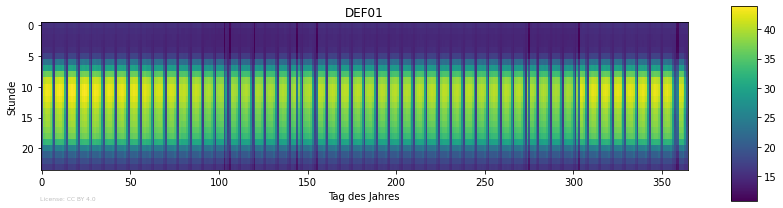

In [8]:
plot.heatmap_timeseries(df_CTS_blp['DEF01'].resample('H').sum(), unit = 'MWh')

In [ ]:
# function can also be called using detaild=True to provide an output per nuts3-region and industry via multicolumn
df_CTS_blp_detailed = temporal.disagg_temporal_power_CTS_blp(year=2016, detailed=True, use_nuts3code=True)


disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

### 3.2 CTS gas consumption [MWh/h]
#### Function disagg_temporal_gas_CTS()
- Disagreggate spatial data of CTS' **gas** demand temporally in **MWh**
- returns DataFrame with districts as columns and timesteps as rows 
- takes two optional arguments:
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions like `disagg_daily_gas_slp(state)` and information from `config.py` and `./data_in/Gas Load Profiles/`

In [ ]:
# run function
df_CTS_gas = temporal.disagg_temporal_gas_CTS(detailed=False, use_nuts3code=False)
df_CTS_gas.head()

In [11]:
# export your data using
df_CTS_gas.to_csv(data_out('CTS_Power_2015_MWh.csv'))

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002208BB8E2E8>]],
       dtype=object))

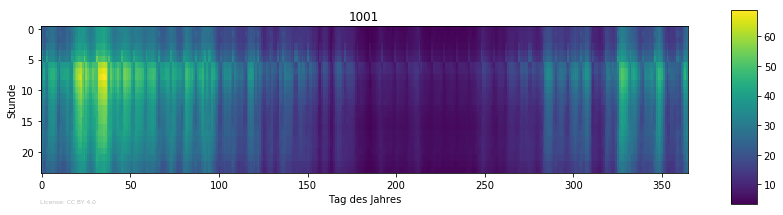

In [13]:
# or plot your data using
plot.heatmap_timeseries(df_CTS_gas['1001'], unit = 'MWh')

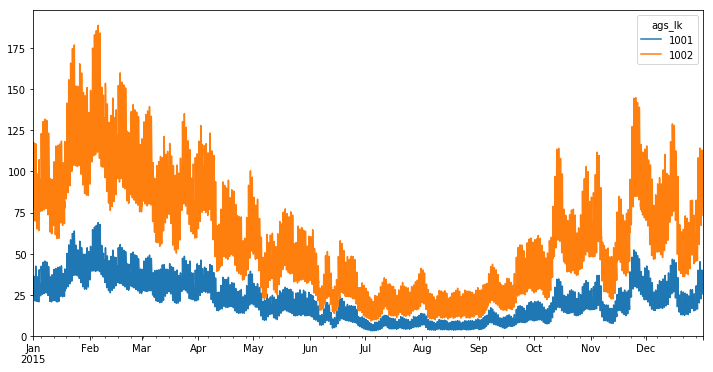

In [14]:
# plot your data
df_CTS_gas[["1001", "1002"]].plot(figsize=(12,6), ylim = 0)

### 3.3 Industry electricity consumption [MWh/15min]
#### 3.3.1 Disaggregation of electricity consumption using **shift load profiles**: Function ``disagg_temporal_industry()``
- Disagreggate spatial data of industry **power** and **gas** demand per quarter-hour for all districts in **MWh**
- returns DataFrame with districts as columns and timesteps as rows
- requires at least two arguments:
    - ``source`` which is the source of energy and must be one of ``['power','gas']``
    - ``low`` is the low load level for non-working hours and must be a float between ``[0,1]`` (default is 0.35, meaning that the lower level is 35% of the higher level)
- takes three optional arguments:
    - if ``no_self_gen = True`` then only electricity consumption obtained from the grid (for 'source' = 'power') and only gas consumption without gas consumption for self-generation of electricity (for 'source' = 'gas') will be disaggregated
    - if ``detailed = True``, returns DataFrame with multiindex in columns with ``level=0`` for districts and ``level=1`` for branches, timesteps as rows
    - if ``use_nuts3code=True``, uses NUTS-3 Codes instead of AGS
- Uses temporal and spatial functions like `shift_load_profile_generator()`, `disagg_CTS_industry()` and information from `config.py`


Let's start with industrial power consumption and compare consumption with and without self generation:

In [15]:
df_ec_industry_no_self_gen = temporal.disagg_temporal_industry(source='power', no_self_gen=True,
                                                               detailed=False, use_nuts3code=False)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [16]:
df_ec_industry_no_self_gen.head()

1001      1002      1003      1004      1051   \
2015-01-01 00:00:00  1.394185  3.056209  3.848114  2.356112  16.71226   
2015-01-01 00:15:00  1.394185  3.056209  3.848114  2.356112  16.71226   
2015-01-01 00:30:00  1.394185  3.056209  3.848114  2.356112  16.71226   
2015-01-01 00:45:00  1.394185  3.056209  3.848114  2.356112  16.71226   
2015-01-01 01:00:00  1.394185  3.056209  3.848114  2.356112  16.71226   

                        1053      1054     1055      1056      1057   ...  \
2015-01-01 00:00:00  2.195035  1.359229  1.87823  5.863123  1.160922  ...   
2015-01-01 00:15:00  2.195035  1.359229  1.87823  5.863123  1.160922  ...   
2015-01-01 00:30:00  2.195035  1.359229  1.87823  5.863123  1.160922  ...   
2015-01-01 00:45:00  2.195035  1.359229  1.87823  5.863123  1.160922  ...   
2015-01-01 01:00:00  2.195035  1.359229  1.87823  5.863123  1.160922  ...   

                        16068     16069     16070     16071     16072  \
2015-01-01 00:00:00  4.067236  3.640382  6.047988  2.895766  6.730523   
2015-01-01 00:15:00  4.067236  3.640382  6.047988  2.895766  6.730523   
2015-01-01 00:30:00  4.067236  3.640382  6.047988  2.895766  6.730523   
2015-01-01 00:45:00  4.067236  3.640382  6.047988  2.895766  6.730523   
2015-01-01 01:00:00  4.067236  3.640382  6.047988  2.895766  6.730523   

                         16073    16074     16075     16076     16077  
2015-01-01 00:00:00  12.689618  3.44743  8.795279  3.256991  3.279316  
2015-01-01 00:15:00  12.689618  3.44743  8.795279  3.256991  3.279316  
2015-01-01 00:30:00  12.689618  3.44743  8.795279  3.256991  3.279316  
2015-01-01 00:45:00  12.689618  3.44743  8.795279  3.256991  3.279316  
2015-01-01 01:00:00  12.689618  3.44743  8.795279  3.256991  3.279316  

[5 rows x 401 columns]

In [17]:
df_ec_industry = temporal.disagg_temporal_industry(source='power', no_self_gen=False, detailed=False, 
                                                   use_nuts3code=False, low=0.35)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [5]:
df_ec_industry.head()

1001     1002      1003      1004       1051   \
2015-01-01 00:00:00  2.254356  3.42689  4.665552  2.846043  24.307786   
2015-01-01 00:15:00  2.254356  3.42689  4.665552  2.846043  24.307786   
2015-01-01 00:30:00  2.254356  3.42689  4.665552  2.846043  24.307786   
2015-01-01 00:45:00  2.254356  3.42689  4.665552  2.846043  24.307786   
2015-01-01 01:00:00  2.254356  3.42689  4.665552  2.846043  24.307786   

                        1053      1054      1055      1056      1057   ...  \
2015-01-01 00:00:00  2.701095  1.529129  2.173698  7.969697  1.277809  ...   
2015-01-01 00:15:00  2.701095  1.529129  2.173698  7.969697  1.277809  ...   
2015-01-01 00:30:00  2.701095  1.529129  2.173698  7.969697  1.277809  ...   
2015-01-01 00:45:00  2.701095  1.529129  2.173698  7.969697  1.277809  ...   
2015-01-01 01:00:00  2.701095  1.529129  2.173698  7.969697  1.277809  ...   

                        16068     16069     16070     16071     16072  \
2015-01-01 00:00:00  4.937541  4.339693  7.213222  3.513629  7.573363   
2015-01-01 00:15:00  4.937541  4.339693  7.213222  3.513629  7.573363   
2015-01-01 00:30:00  4.937541  4.339693  7.213222  3.513629  7.573363   
2015-01-01 00:45:00  4.937541  4.339693  7.213222  3.513629  7.573363   
2015-01-01 01:00:00  4.937541  4.339693  7.213222  3.513629  7.573363   

                         16073     16074      16075     16076    16077  
2015-01-01 00:00:00  17.332591  4.094384  10.792797  3.937732  3.86812  
2015-01-01 00:15:00  17.332591  4.094384  10.792797  3.937732  3.86812  
2015-01-01 00:30:00  17.332591  4.094384  10.792797  3.937732  3.86812  
2015-01-01 00:45:00  17.332591  4.094384  10.792797  3.937732  3.86812  
2015-01-01 01:00:00  17.332591  4.094384  10.792797  3.937732  3.86812  

[5 rows x 401 columns]

In [6]:
ec_industry_combined = pd.concat([df_ec_industry.sum(axis=1), df_ec_industry_no_self_gen.sum(axis=1)], 
                                 keys=['industry', 'industry without self-generation'], 
                                 axis=1, join='inner')
ec_industry_combined.head()

industry  industry without self-generation
2015-01-01 00:00:00  5444.975448                       4248.745249
2015-01-01 00:15:00  5444.975448                       4248.745249
2015-01-01 00:30:00  5444.975448                       4248.745249
2015-01-01 00:45:00  5444.975448                       4248.745249
2015-01-01 01:00:00  5444.975448                       4248.745249

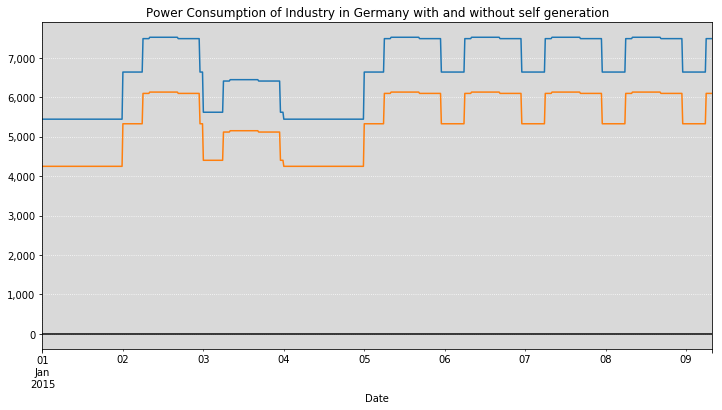

In [21]:
fig, ax = plt.subplots(figsize = [12,6])
ec_industry_combined['industry'].head(800).plot(ax=ax)
ec_industry_combined['industry without self-generation'].head(800).plot(ax=ax)
plot.set_ax_format(ax=ax, ylabel='[MWh]', xlabel='Date',
                   axtitle='Power Consumption of Industry in Germany with and without self generation')

#### 3.1.2 Disaggregation of electricity consumption using **branch load profiles**: Function ``disagg_temporal_power_industry_blp()``
- works similar as disaggregation with shift load profiles, however uses industry specific branch load profiles (BLP), which have been created using measured data
- can only be applied to the electricity consumtion, so ``source = 'power'`` has to be set 
- covers 39 industries from CTS sector and 12 from industrial sector
- industries where no BLP is available will be disaggregated using SLP
- the function can be called using the same arguments as ``disagg_temporal_power_CTS()``

In [2]:
df_industry_blp_detailed = temporal.disagg_temporal_industry_blp(year=2016, detailed=True, use_nuts3code=True)


disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [3]:
df_industry_blp_detailed.head()

LK                  DEF01 DEF02 DEF03 DEF04 DEF05 DEF06 DEF07 DEF08 DEF09  \
WZ                     5     5     5     5     5     5     5     5     5    
2016-01-01 00:00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2016-01-01 00:15:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2016-01-01 00:30:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2016-01-01 00:45:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2016-01-01 01:00:00   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

LK                  DEF0A  ...     DEG0D     DEG0E     DEG0F     DEG0G  \
WZ                     5   ...        32        32        32        32   
2016-01-01 00:00:00   0.0  ...  0.009544  0.005872  0.037014  0.001975   
2016-01-01 00:15:00   0.0  ...  0.009555  0.005870  0.037029  0.001978   
2016-01-01 00:30:00   0.0  ...  0.009408  0.005769  0.036423  0.001949   
2016-01-01 00:45:00   0.0  ...  0.009257  0.005665  0.035818  0.001919   
2016-01-01 01:00:00   0.0  ...  0.009099  0.005562  0.035227  0.001889   

LK                      DEG0H     DEG0I     DEG0J     DEG0K     DEG0L  \
WZ                         32        32        32        32        32   
2016-01-01 00:00:00  0.028776  0.067234  0.016498  0.012918  0.038857   
2016-01-01 00:15:00  0.028821  0.067234  0.016530  0.012943  0.038918   
2016-01-01 00:30:00  0.028390  0.066114  0.016291  0.012753  0.038338   
2016-01-01 00:45:00  0.027948  0.064994  0.016052  0.012563  0.037758   
2016-01-01 01:00:00  0.027494  0.063821  0.015793  0.012353  0.037147   

LK                      DEG0M  
WZ                         32  
2016-01-01 00:00:00  0.018617  
2016-01-01 00:15:00  0.018639  
2016-01-01 00:30:00  0.018353  
2016-01-01 00:45:00  0.018067  
2016-01-01 01:00:00  0.017781  

[5 rows x 11629 columns]

### 3.2 Industry gas consumption
- uses the same function ``disagg_temporal_industry()`` but with argument ``source='gas'``
- works similar as temporal disaggregation for electricity
- uses **shift load profiles**, branch load profiles are not available for gas consumption
- example shows disaggregation with argument ``low=0.2``

In [30]:
df_gas_industry_no_self_gen = temporal.disagg_temporal_industry(source='gas', no_self_gen=True, 
                                                                detailed=False, use_nuts3code=False, low=0.2)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [31]:
df_gas_industry_no_self_gen.head()

1001      1002      1003     1004       1051   \
2015-01-01 00:00:00  4.043184  2.629271  3.811686  2.94521  46.407238   
2015-01-01 00:15:00  4.043184  2.629271  3.811686  2.94521  46.407238   
2015-01-01 00:30:00  4.043184  2.629271  3.811686  2.94521  46.407238   
2015-01-01 00:45:00  4.043184  2.629271  3.811686  2.94521  46.407238   
2015-01-01 01:00:00  4.043184  2.629271  3.811686  2.94521  46.407238   

                        1053      1054      1055       1056      1057   ...  \
2015-01-01 00:00:00  1.417371  1.259123  2.723307  15.411155  1.088325  ...   
2015-01-01 00:15:00  1.417371  1.259123  2.723307  15.411155  1.088325  ...   
2015-01-01 00:30:00  1.417371  1.259123  2.723307  15.411155  1.088325  ...   
2015-01-01 00:45:00  1.417371  1.259123  2.723307  15.411155  1.088325  ...   
2015-01-01 01:00:00  1.417371  1.259123  2.723307  15.411155  1.088325  ...   

                        16068     16069     16070    16071      16072  \
2015-01-01 00:00:00  2.356463  2.700519  6.249007  1.60296  15.248808   
2015-01-01 00:15:00  2.356463  2.700519  6.249007  1.60296  15.248808   
2015-01-01 00:30:00  2.356463  2.700519  6.249007  1.60296  15.248808   
2015-01-01 00:45:00  2.356463  2.700519  6.249007  1.60296  15.248808   
2015-01-01 01:00:00  2.356463  2.700519  6.249007  1.60296  15.248808   

                        16073     16074     16075     16076     16077  
2015-01-01 00:00:00  9.994858  4.610591  5.489474  3.728261  1.846144  
2015-01-01 00:15:00  9.994858  4.610591  5.489474  3.728261  1.846144  
2015-01-01 00:30:00  9.994858  4.610591  5.489474  3.728261  1.846144  
2015-01-01 00:45:00  9.994858  4.610591  5.489474  3.728261  1.846144  
2015-01-01 01:00:00  9.994858  4.610591  5.489474  3.728261  1.846144  

[5 rows x 401 columns]

In [32]:
df_gas_industry = temporal.disagg_temporal_industry(source='gas', detailed=False, use_nuts3code=False, low=0.2)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles to WZs
disaggrega

In [33]:
df_gas_industry.head()

1001      1002      1003      1004       1051   \
2015-01-01 00:00:00  4.977301  2.801578  4.417031  3.456985  54.395224   
2015-01-01 00:15:00  4.977301  2.801578  4.417031  3.456985  54.395224   
2015-01-01 00:30:00  4.977301  2.801578  4.417031  3.456985  54.395224   
2015-01-01 00:45:00  4.977301  2.801578  4.417031  3.456985  54.395224   
2015-01-01 01:00:00  4.977301  2.801578  4.417031  3.456985  54.395224   

                        1053      1054      1055       1056      1057   ...  \
2015-01-01 00:00:00  1.581741  1.387479  3.062978  18.531616  1.160091  ...   
2015-01-01 00:15:00  1.581741  1.387479  3.062978  18.531616  1.160091  ...   
2015-01-01 00:30:00  1.581741  1.387479  3.062978  18.531616  1.160091  ...   
2015-01-01 00:45:00  1.581741  1.387479  3.062978  18.531616  1.160091  ...   
2015-01-01 01:00:00  1.581741  1.387479  3.062978  18.531616  1.160091  ...   

                        16068     16069     16070     16071      16072  \
2015-01-01 00:00:00  2.835136  3.126634  7.018164  1.808697  16.640491   
2015-01-01 00:15:00  2.835136  3.126634  7.018164  1.808697  16.640491   
2015-01-01 00:30:00  2.835136  3.126634  7.018164  1.808697  16.640491   
2015-01-01 00:45:00  2.835136  3.126634  7.018164  1.808697  16.640491   
2015-01-01 01:00:00  2.835136  3.126634  7.018164  1.808697  16.640491   

                         16073     16074    16075     16076     16077  
2015-01-01 00:00:00  11.634421  5.344466  6.47785  4.175993  2.125346  
2015-01-01 00:15:00  11.634421  5.344466  6.47785  4.175993  2.125346  
2015-01-01 00:30:00  11.634421  5.344466  6.47785  4.175993  2.125346  
2015-01-01 00:45:00  11.634421  5.344466  6.47785  4.175993  2.125346  
2015-01-01 01:00:00  11.634421  5.344466  6.47785  4.175993  2.125346  

[5 rows x 401 columns]

In [34]:
gc_industry_combined = pd.concat([df_gas_industry.sum(axis=1), df_gas_industry_no_self_gen.sum(axis=1)], 
                                 keys=['industry', 'industry without self-generation'], 
                                 axis=1, join='inner')
gc_industry_combined.head()

industry  industry without self-generation
2015-01-01 00:00:00  7313.367798                       6220.145895
2015-01-01 00:15:00  7313.367798                       6220.145895
2015-01-01 00:30:00  7313.367798                       6220.145895
2015-01-01 00:45:00  7313.367798                       6220.145895
2015-01-01 01:00:00  7313.367798                       6220.145895

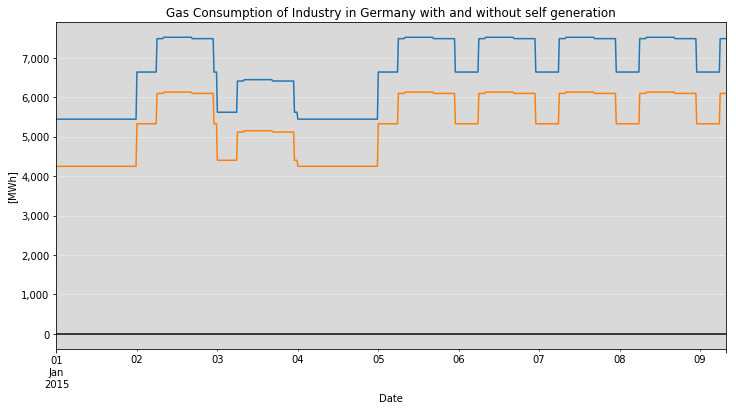

In [35]:
fig, ax = plt.subplots(figsize = [12,6])
ec_industry_combined['industry'].head(800).plot(ax=ax)
ec_industry_combined['industry without self-generation'].head(800).plot(ax=ax)
plot.set_ax_format(ax=ax, ylabel='[MWh]', xlabel='Date',
                   axtitle='Gas Consumption of Industry in Germany with and without self generation')

In [48]:
# export your data using
# df_gas_industry.to_csv(data_out('Industry_Gas_2015_MWh.csv'))

(<Figure size 864x216 with 2 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001954B4FDFD0>]],
       dtype=object))

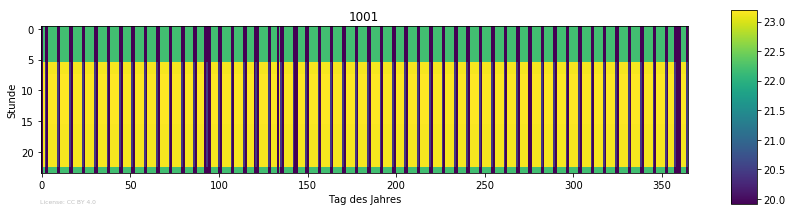

In [36]:
plot.heatmap_timeseries(df_gas_industry[1001].resample('H').sum(), unit = 'MWh')

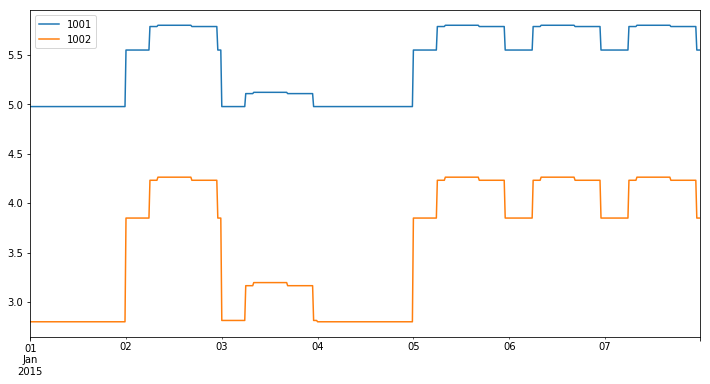

In [37]:
df_gas_industry.loc[:,[1001, 1002]].head(672).plot(figsize=(12,6))